In [1]:
experiment_mapping = {
    "01": 4,
    "02": 4,
    "08": 6,
    "09": 6,
    "12": 7,
    "13": 7,
    "29": 3,
    "30": 3
}

### All Experiment 7 All Images, Centroids of Connected Components, Min-Max Intensity, Mean Intensity, Intensity/Area:

In [2]:
#prefixes = [f"{chr(65 + i)}{j}-" for i in range(8) for j in range(1, 13)]
#for prefix in prefixes:
#    print(prefix)

In [3]:
import cv2
import matplotlib.pyplot as plt
import os

from PIL import Image
import numpy as np
import imageio


In [4]:
import pickle
# Directory containing images
directory = r'E:\Aytekin\Data\AnalyzedBestModelGreen1'

# Get a list of all files in the directory
image_files = os.listdir(directory)


all_image_info = {}


prefixes = [f"{chr(65 + i)}{j}-" for i in range(8) for j in range(1, 13)]

for prefix in prefixes:
    image_info = {}
    # Process images that meet the specified criteria
    for image_name in image_files:
        if (image_name.startswith('R_12') or image_name.startswith('R_13')) and (prefix in image_name) and (any(num in image_name for num in ['929', '926', '927', '928'])):
            image_path = os.path.join(directory, image_name)

            # Read the image
            image = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)

            # Normalize the image data to the range 0-255
            normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
            normalized_image = np.uint8(normalized_image) 

            # Threshold the normalized image
            _, thresh = cv2.threshold(normalized_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
            
            # Print information about thresh
            #print(f"Thresholded Image Information: Type - {type(thresh)}, Dtype - {thresh.dtype}, Shape - {thresh.shape}")

            # Find connected components
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

            # Create a copy of the original image to draw rectangles on
            image_with_rectangles = cv2.cvtColor(normalized_image, cv2.COLOR_GRAY2BGR)

            # Create a dictionary to store component information
            component_info = {}

            # Iterate through connected components
            for i in range(1, num_labels):
                # Extract area and intensity for each component
                component_area = stats[i, cv2.CC_STAT_AREA]
                component_intensity = normalized_image[labels == i].mean()

                # Calculate min, max, and mean intensity
                component_min_intensity = normalized_image[labels == i].min()
                component_max_intensity = normalized_image[labels == i].max()

                # Get bounding box coordinates
                x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]

                # Calculate centroid coordinates
                centroid_x, centroid_y = centroids[i]


                # Draw a red rectangle around the component on the copied image
                cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 0, 255), 2)

                component_ioa = component_intensity/component_area

                # Store component information in the dictionary
                component_info[i] = {
                    'centroid': (centroid_x, centroid_y),
                    'bounding_box': (x, y, w, h),
                    'area': component_area,
                    'min_intensity': component_min_intensity,
                    'max_intensity': component_max_intensity,
                    'mean_intensity': component_intensity,
                    'intensity_area_ratio': component_ioa,
                    'total_components': num_labels - 1
                }



                # Print area and intensity for each component
                #print(f"Component {i}: Area - {component_area}, Intensity - {component_intensity:.3f}, Intensity/Area - {component_ioa:.3f}")


            # Save the image name as key and the component dictionary as value
            image_info[image_name] = component_info
            # Plot the image with rectangles around components
            #plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
            #plt.title(f'Experiment_4: Connected Components for {image_name}: Total Connected Component Number: {num_labels-1}')
            #plt.axis('off')
            #plt.show()
            #print(image_info)
            # Plot the image with rectangles around components
            #plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
            #plt.title(f'Experiment_4: Connected Components for {image_name}: Total Connected Component Number: {num_labels-1}')
            #plt.axis('off')
            #plt.show()
        all_image_info[prefix] = image_info
                
            
            
            
#print(all_image_info['A1-'])
            

In [5]:
print(len(all_image_info))

96


In [6]:
#print(all_image_info['A1-']['R_01_1107_939_A1-1-green_analyzed.tif'])

In [7]:

# Save the dictionary using pickle
with open('image_info_exp7_all_results.pickle', 'wb') as pickle_file:
    pickle.dump(all_image_info, pickle_file)


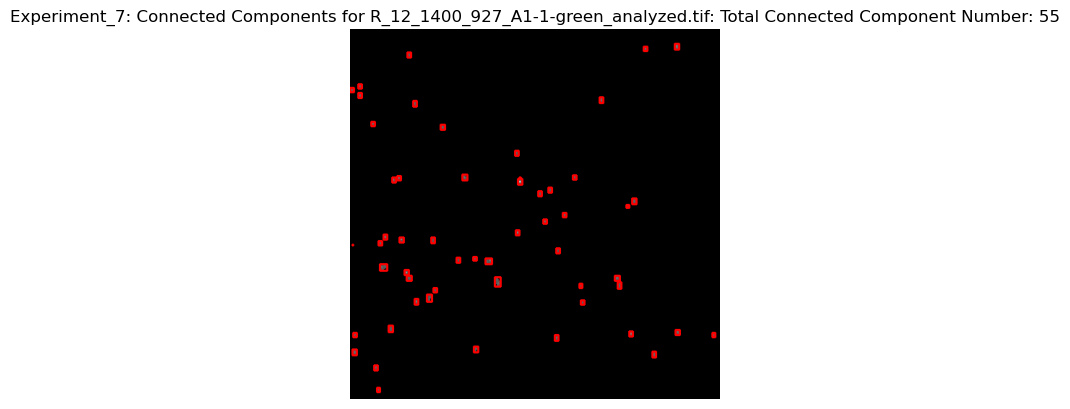

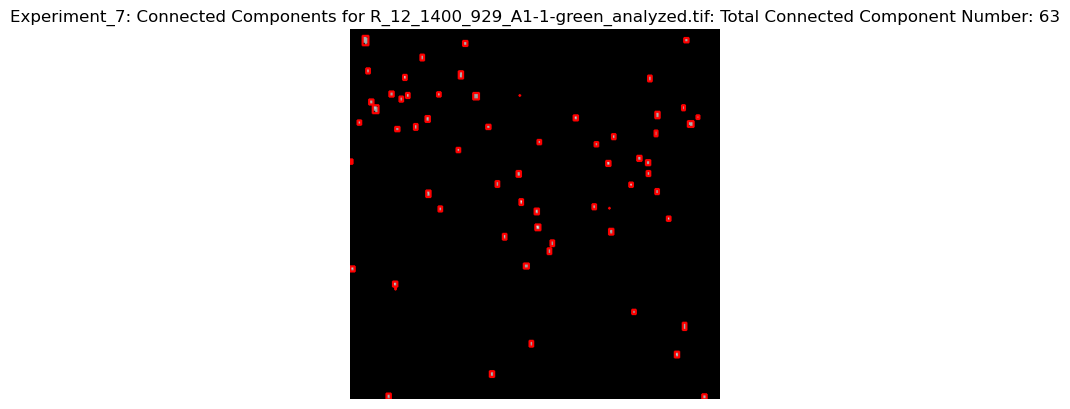

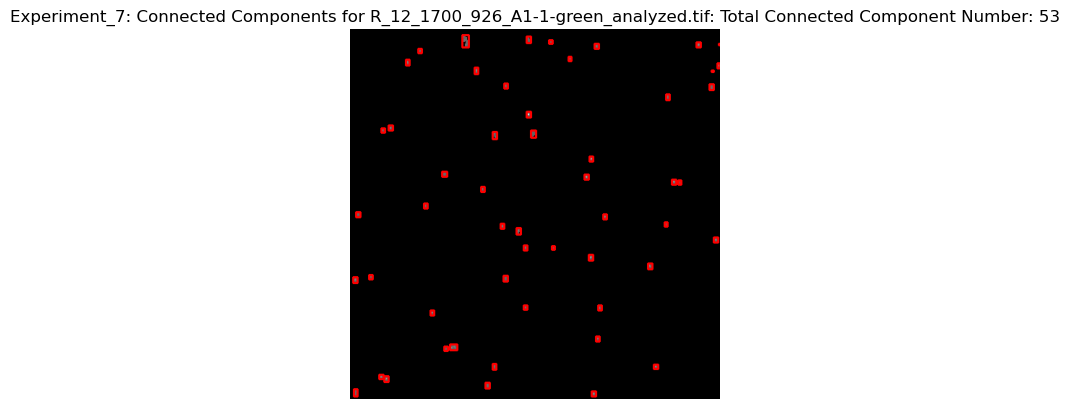

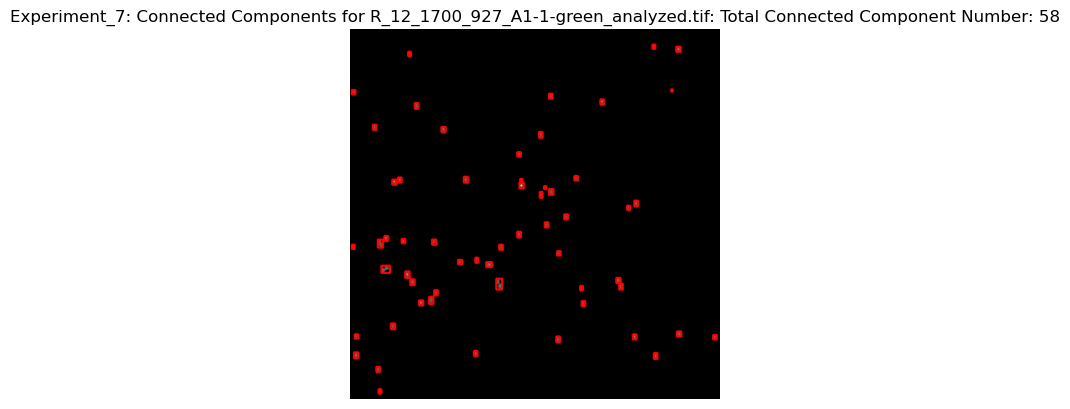

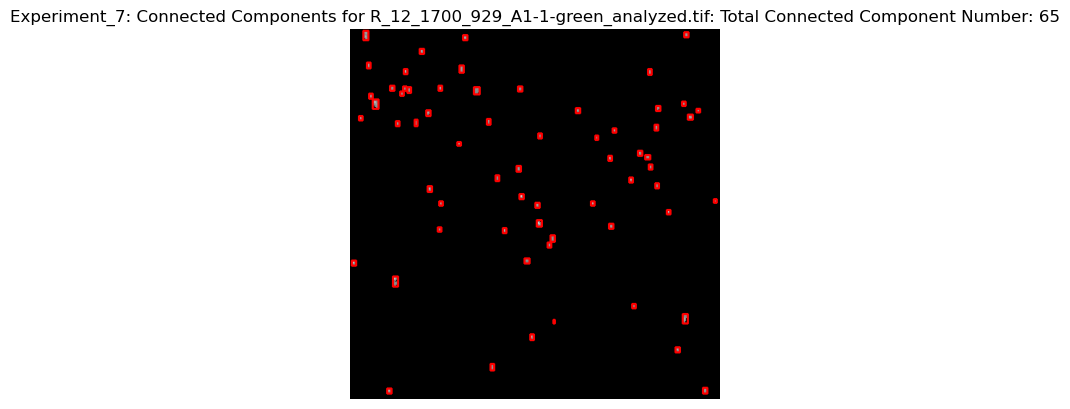

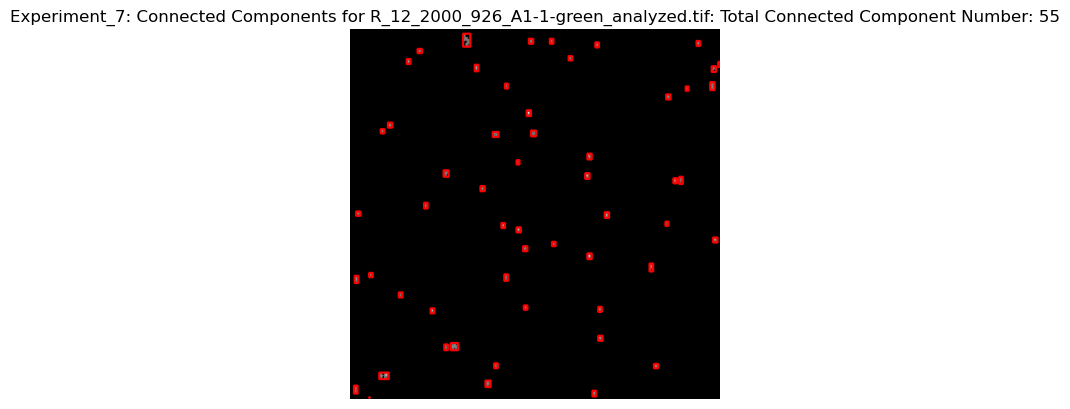

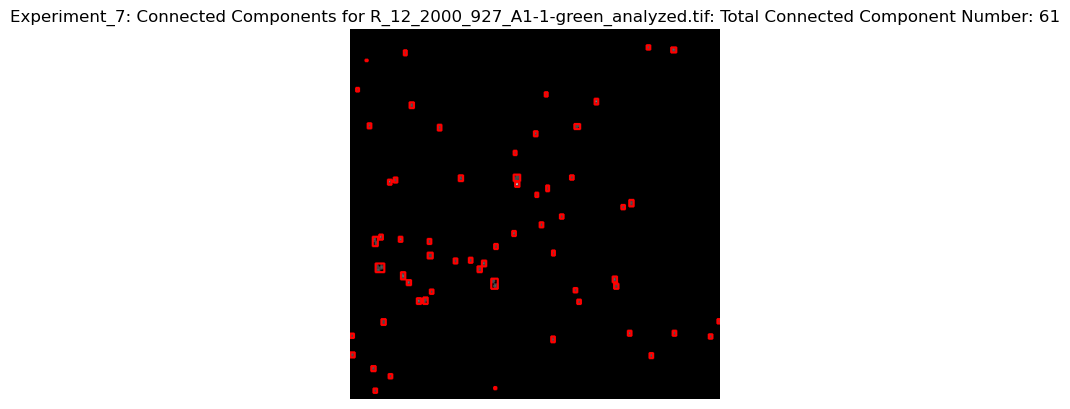

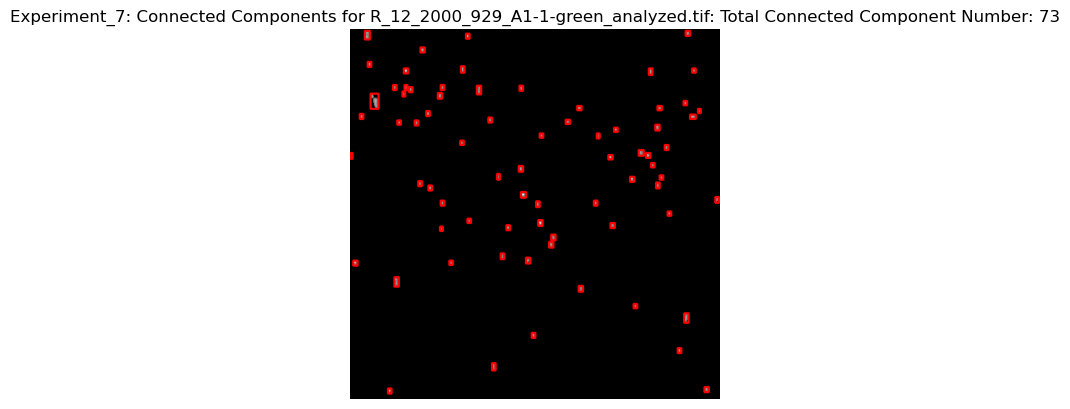

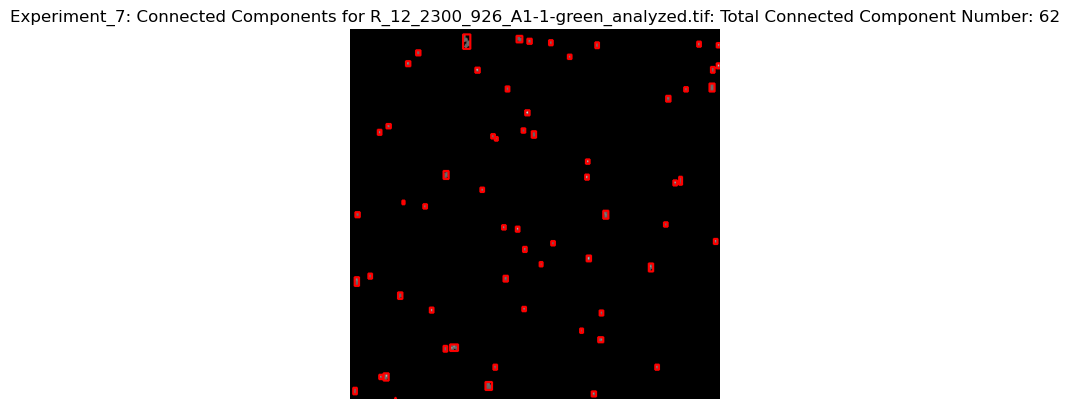

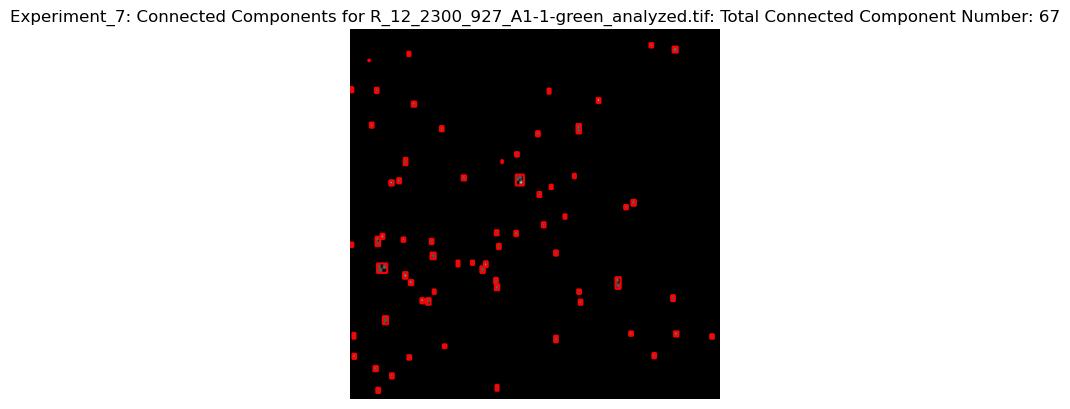

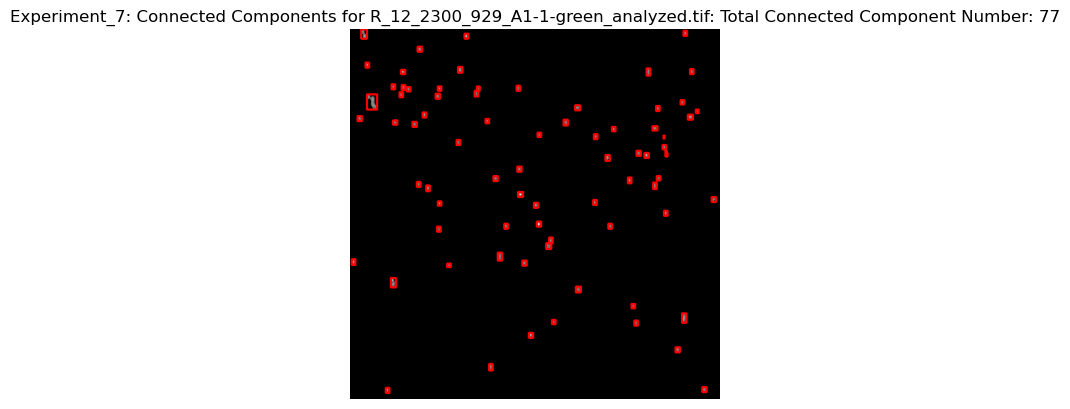

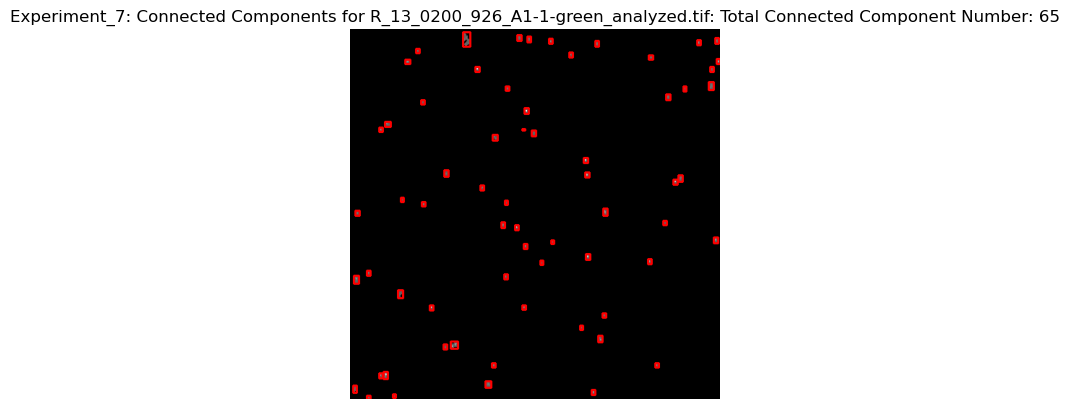

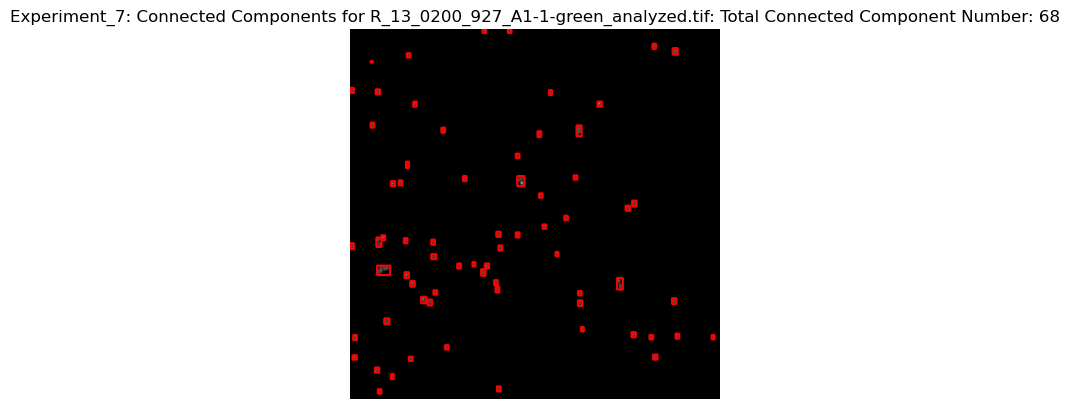

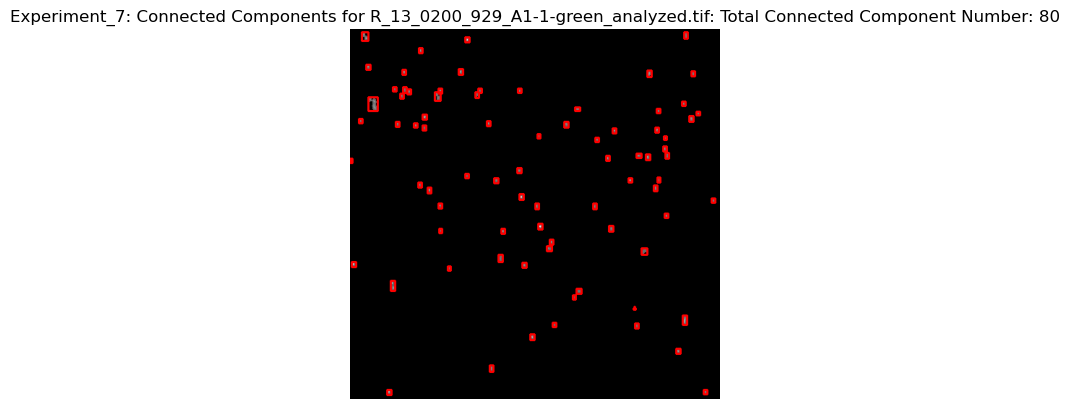

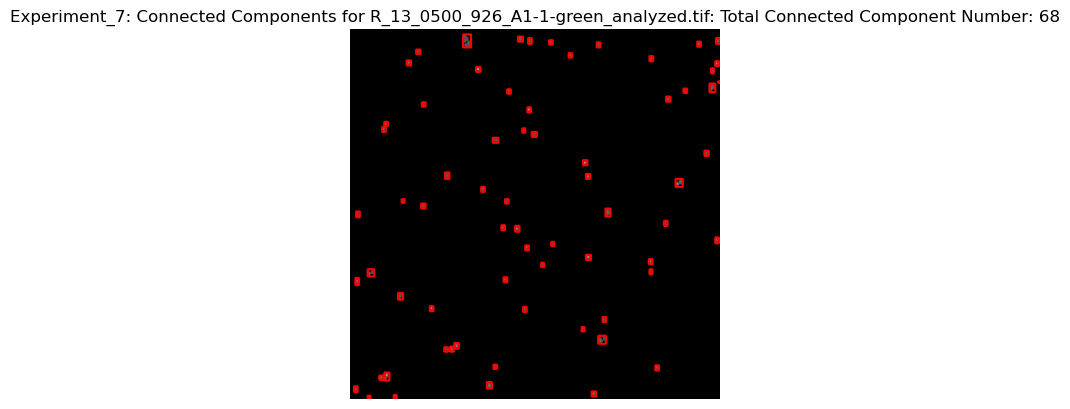

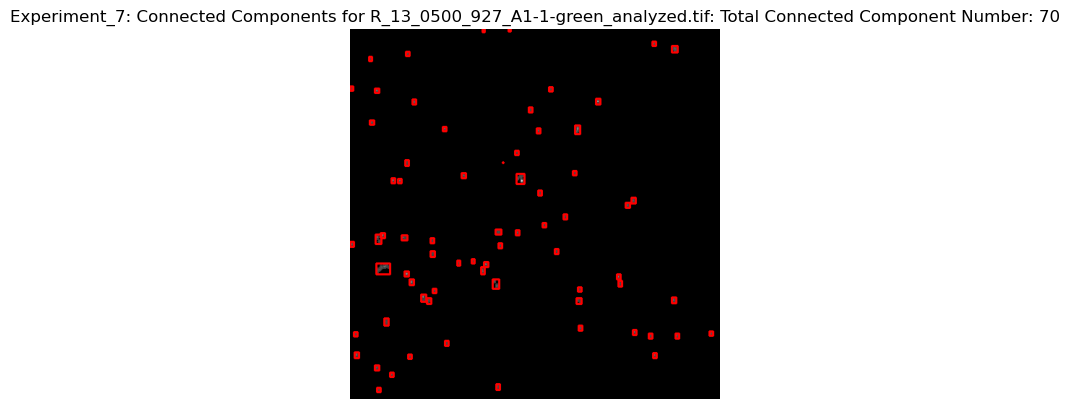

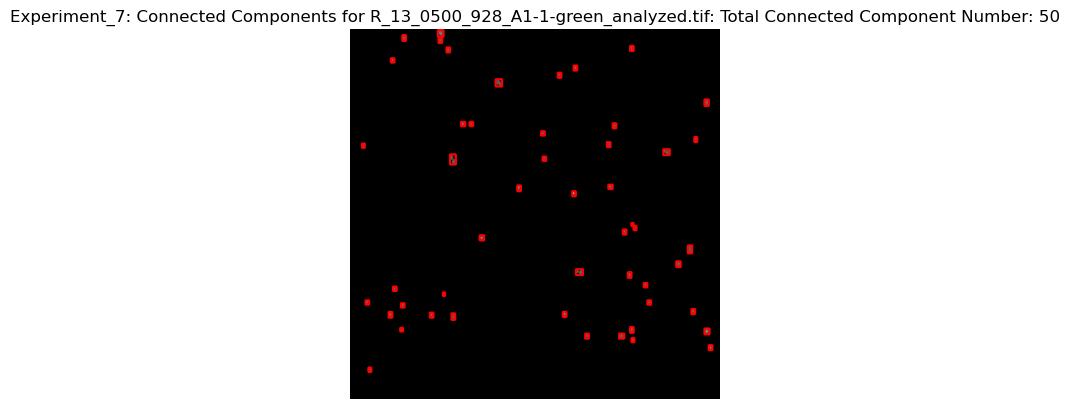

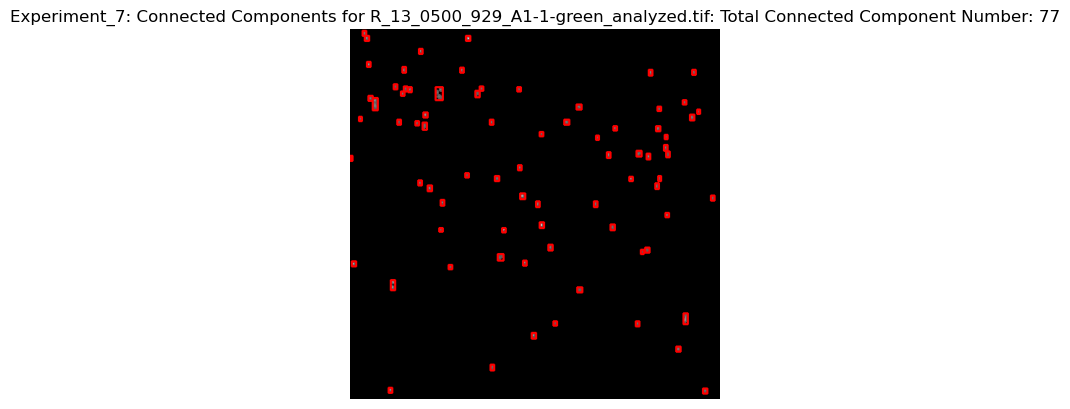

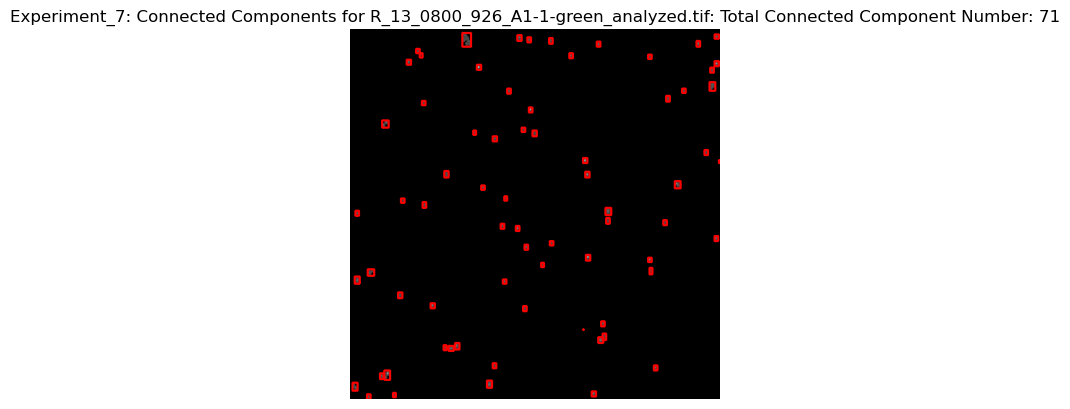

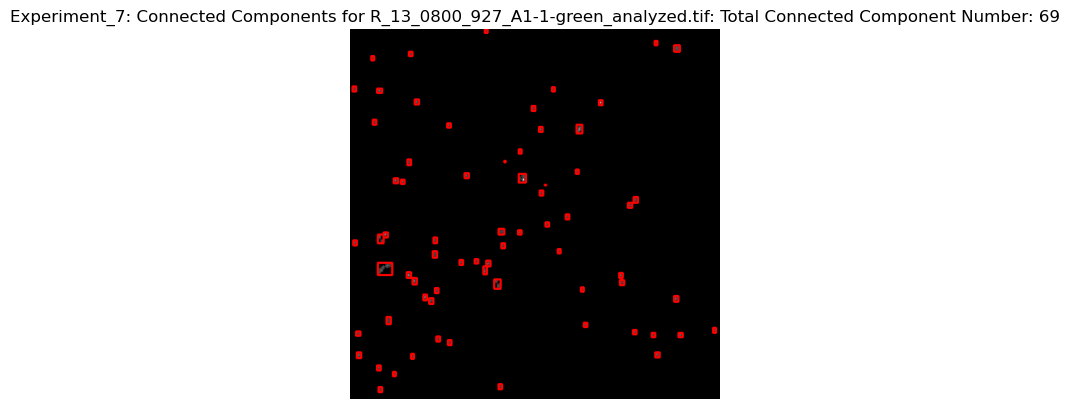

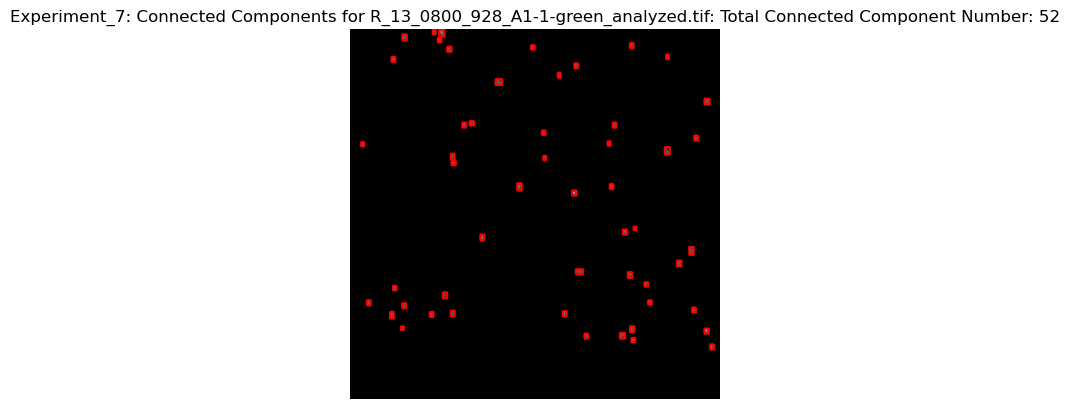

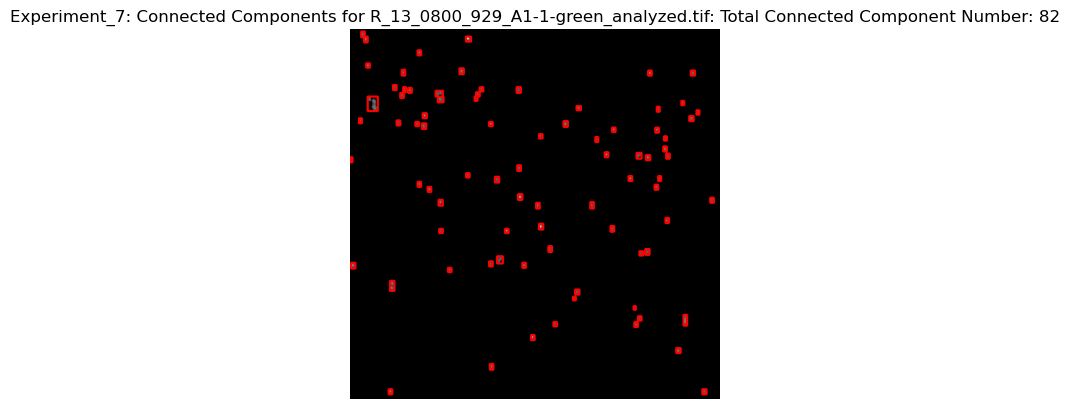

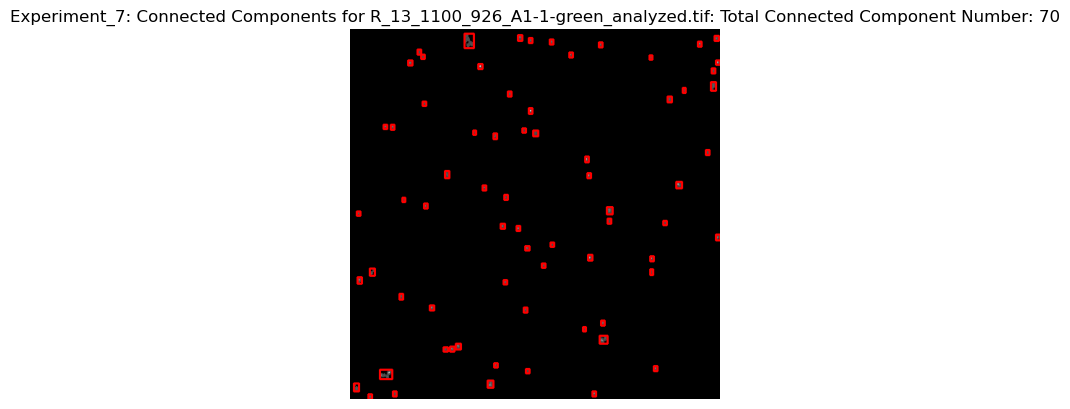

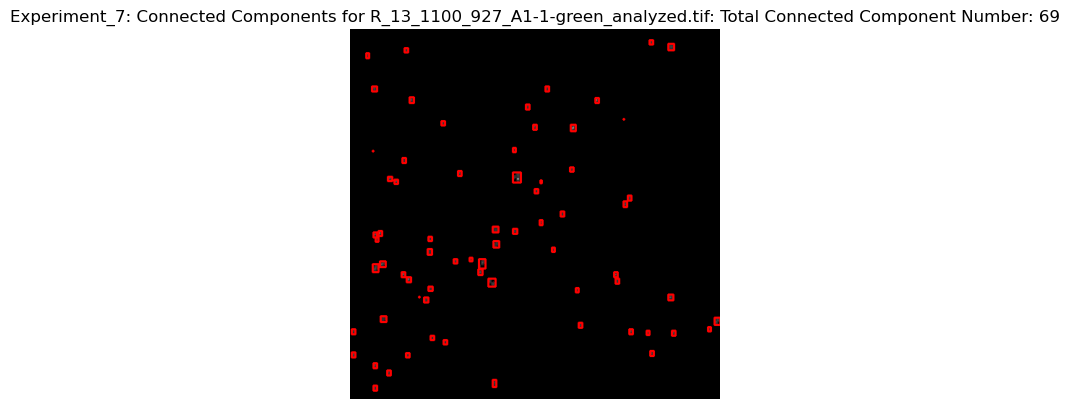

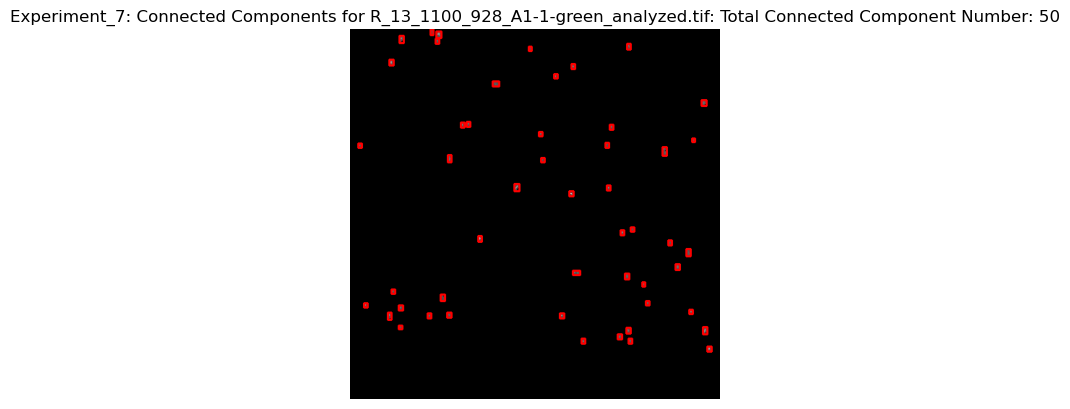

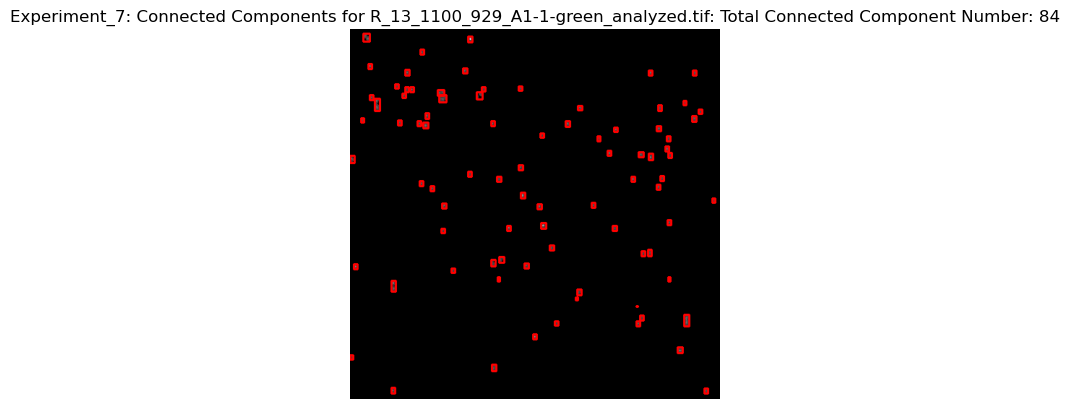

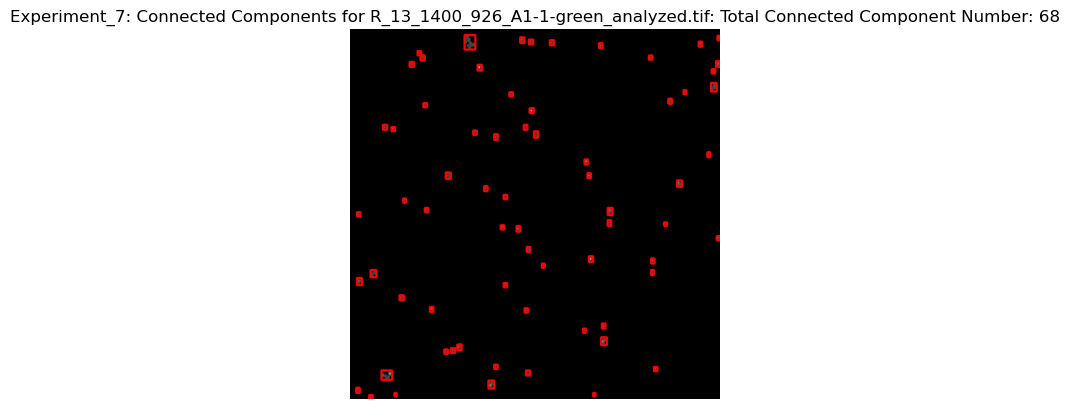

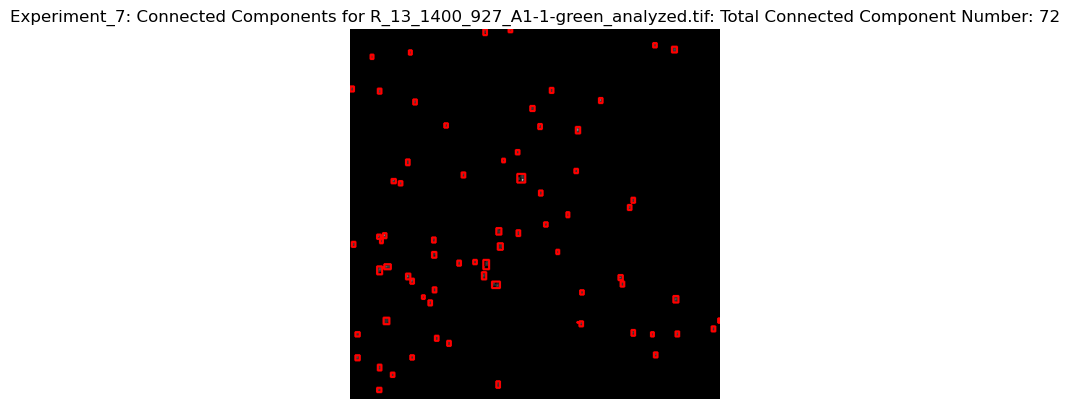

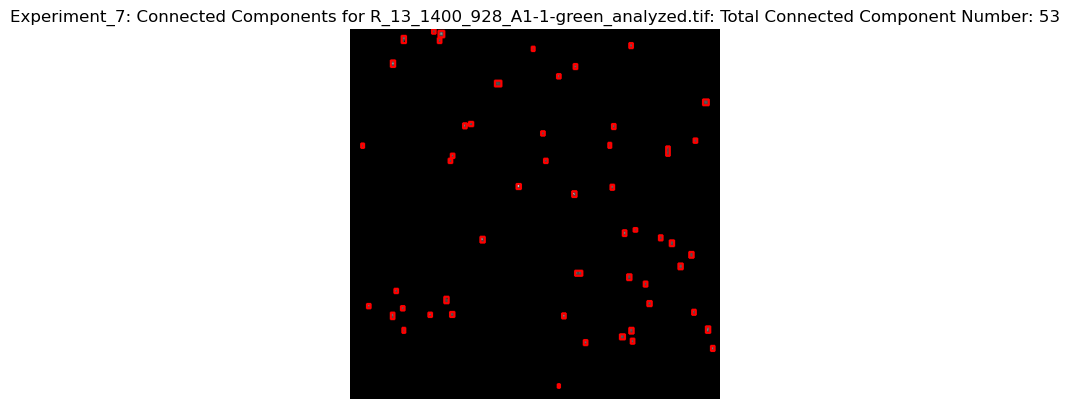

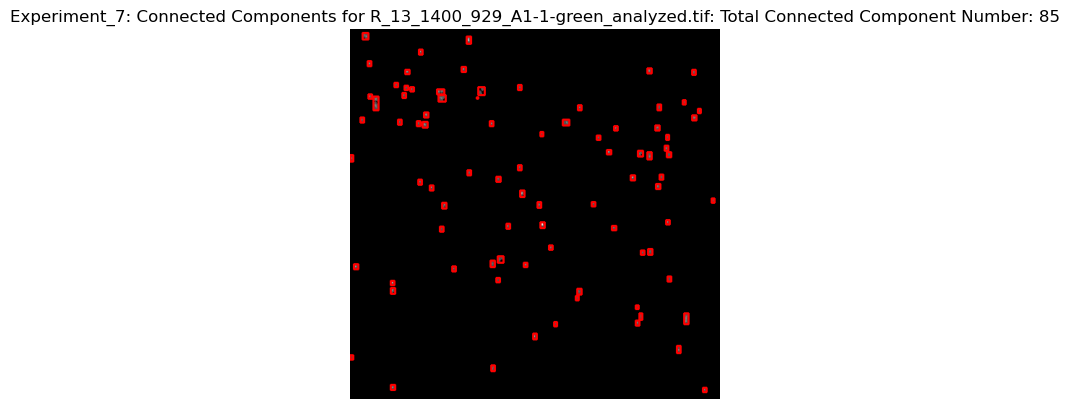

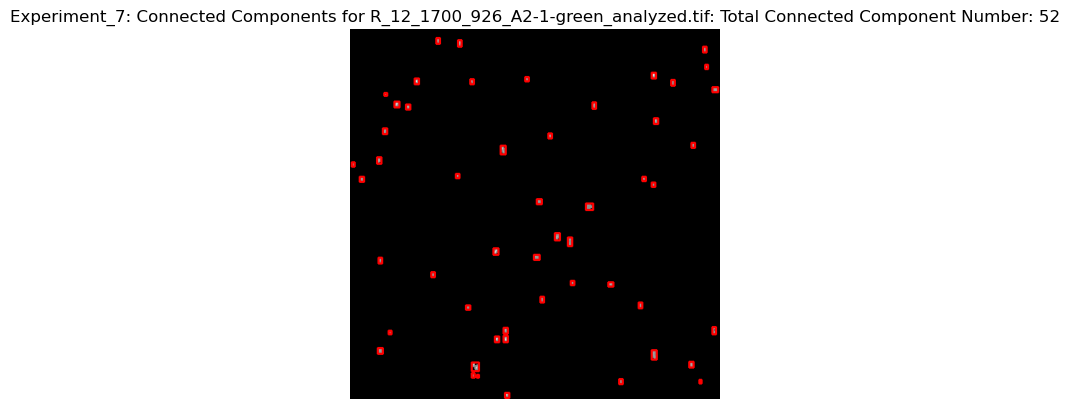

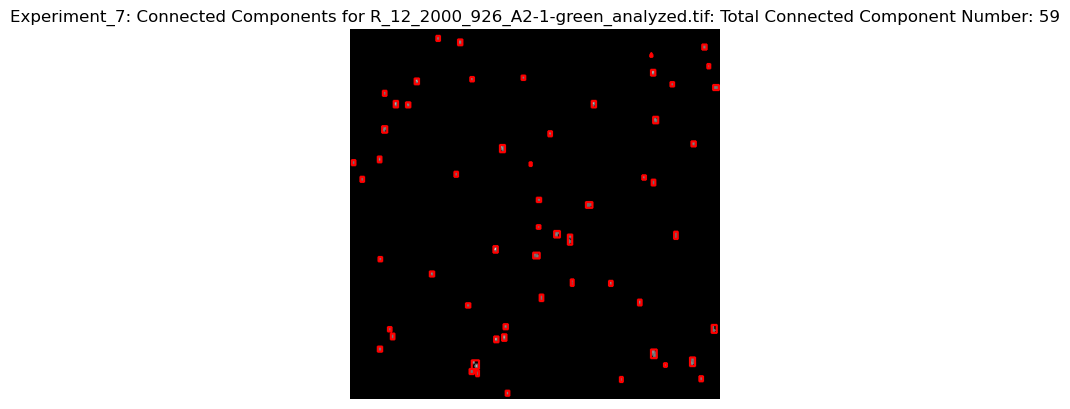

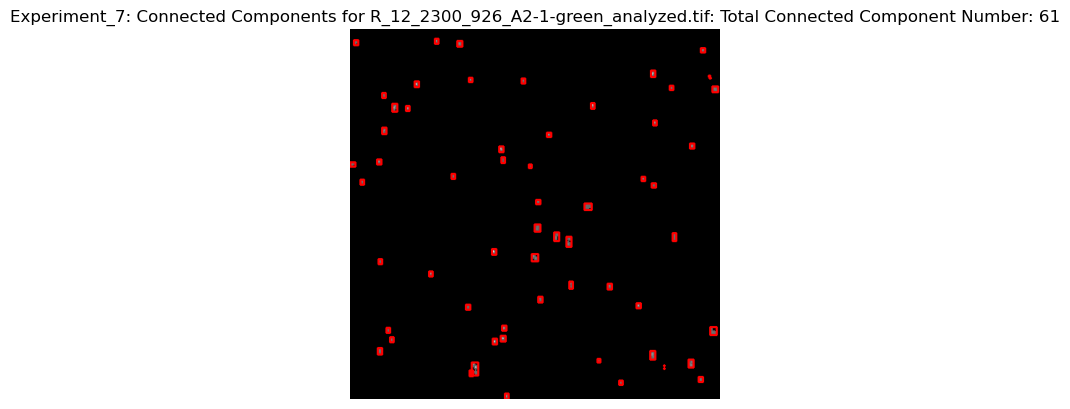

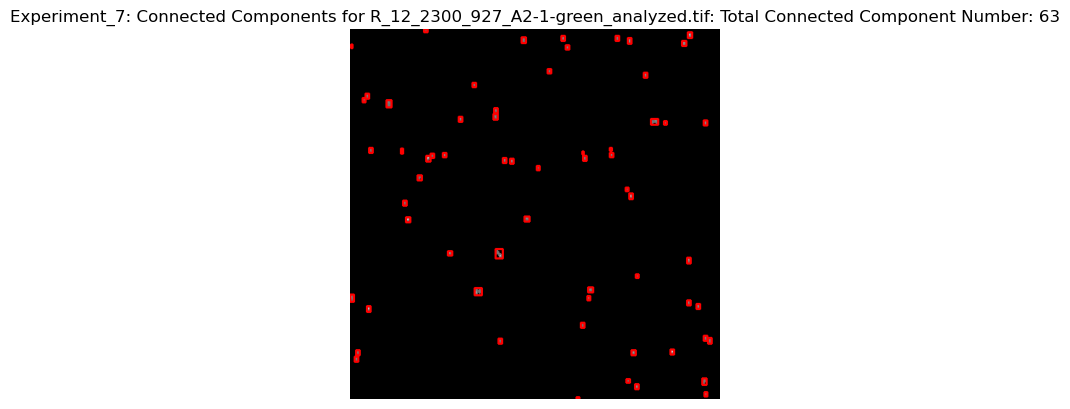

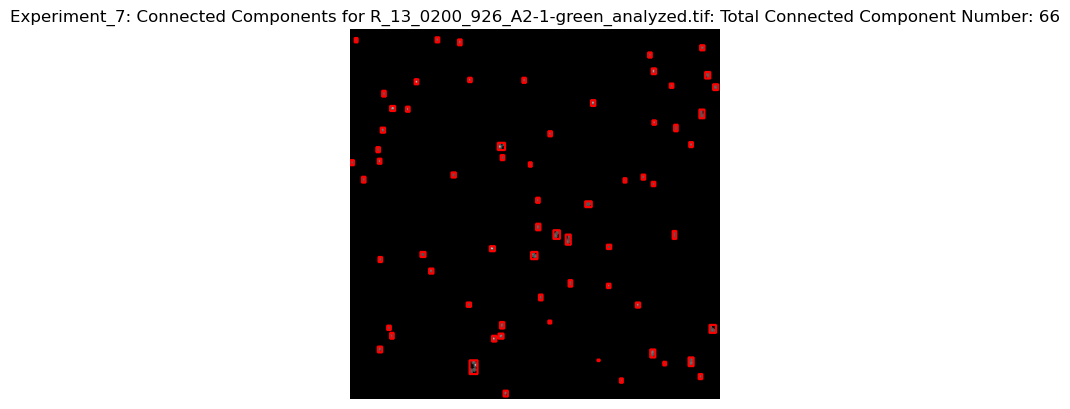

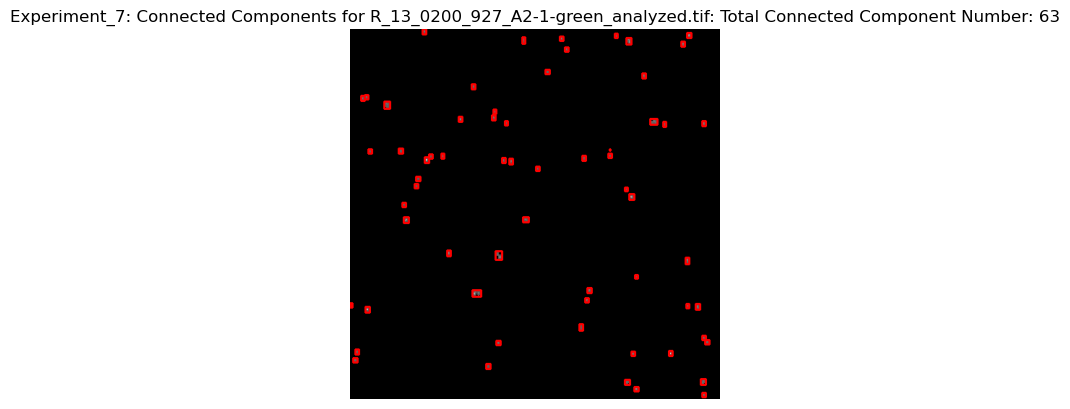

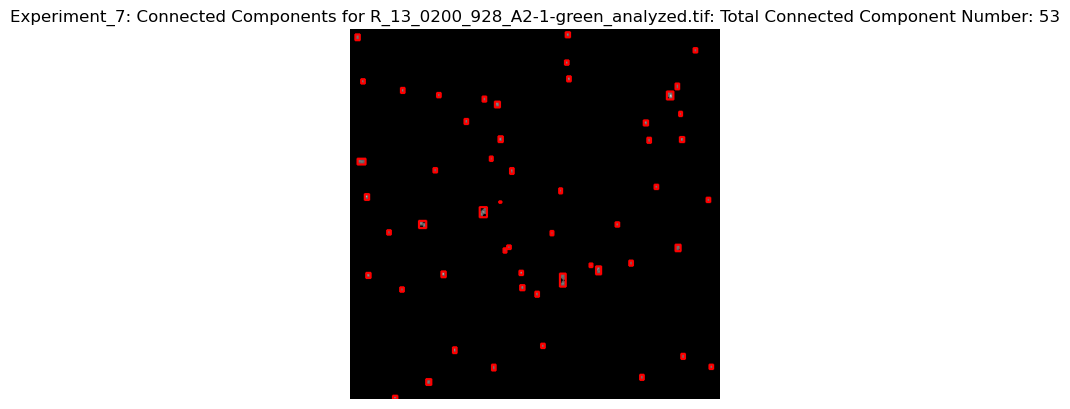

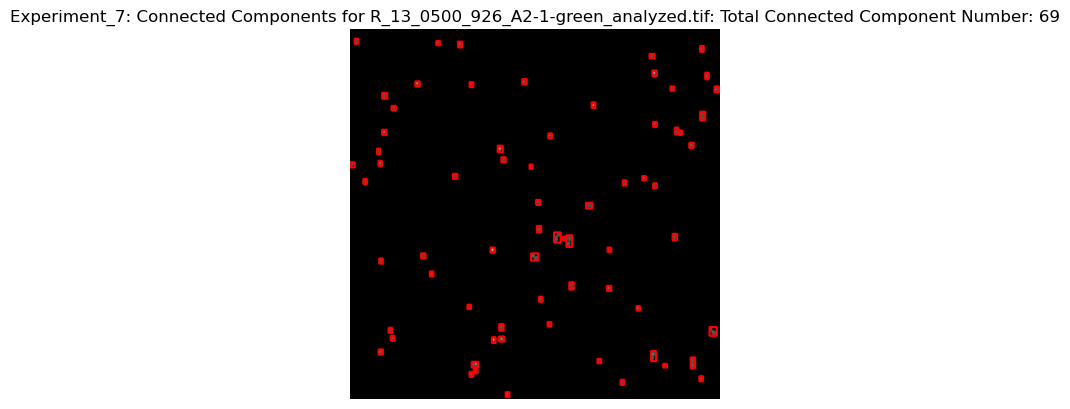

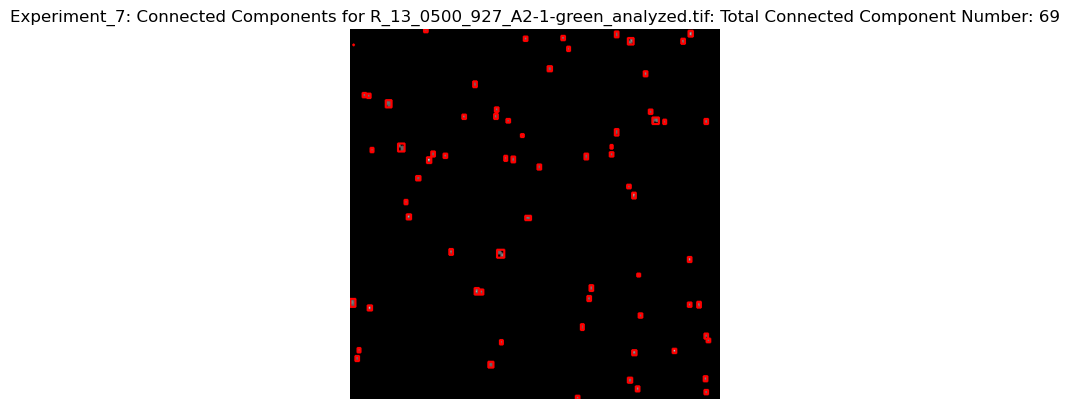

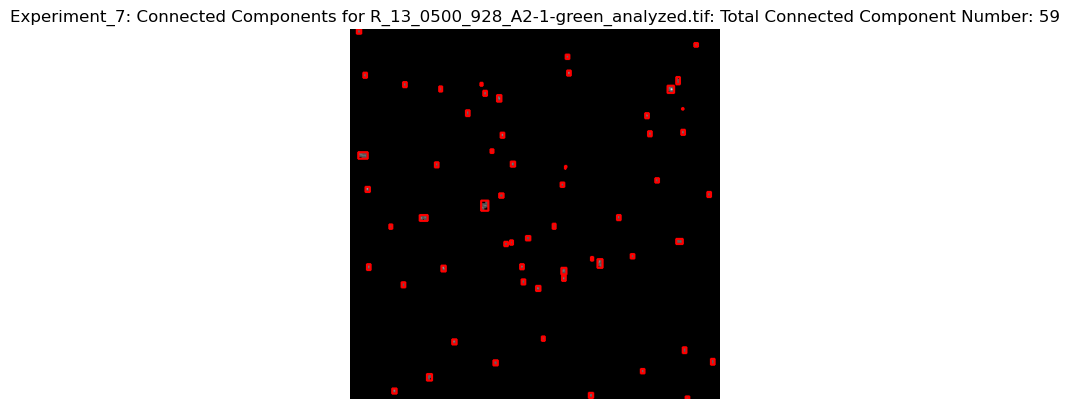

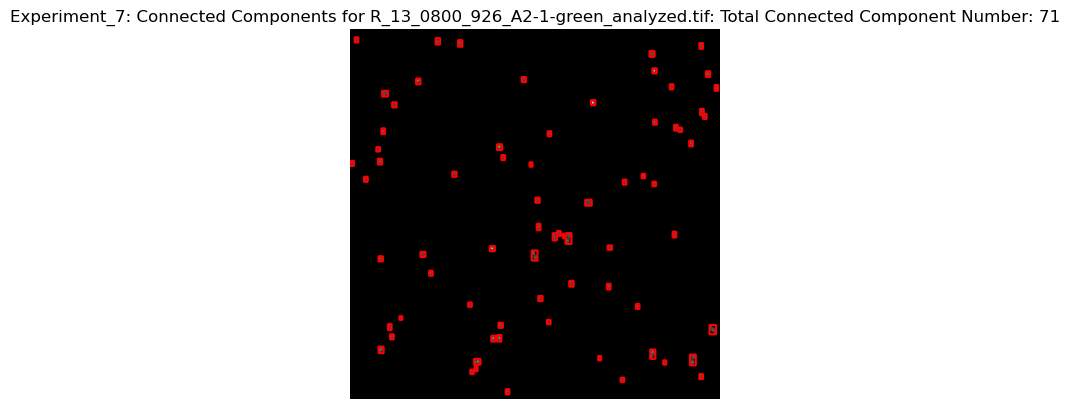

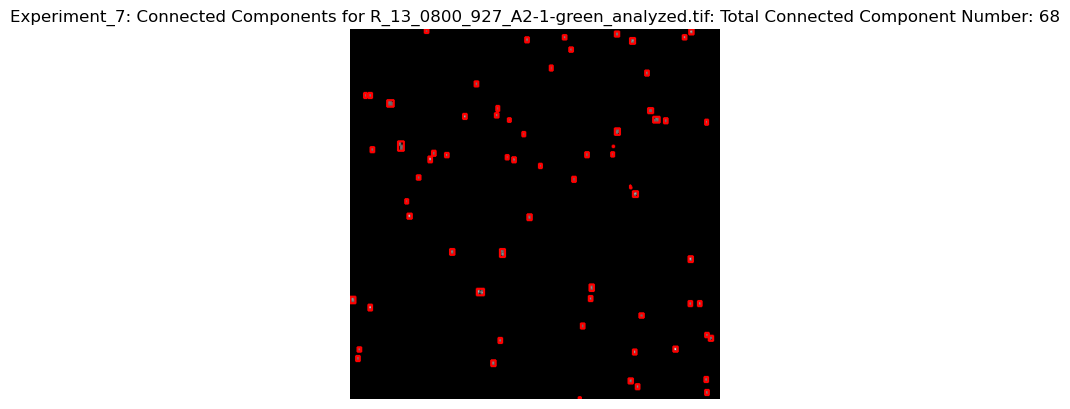

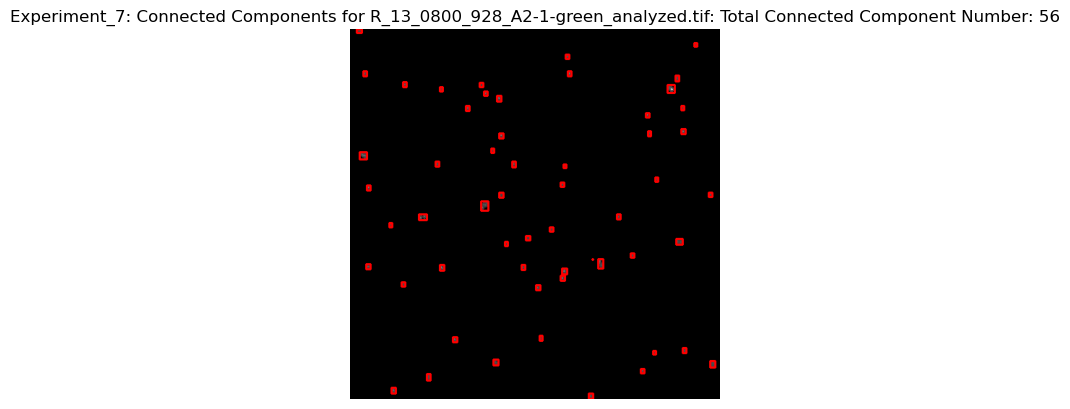

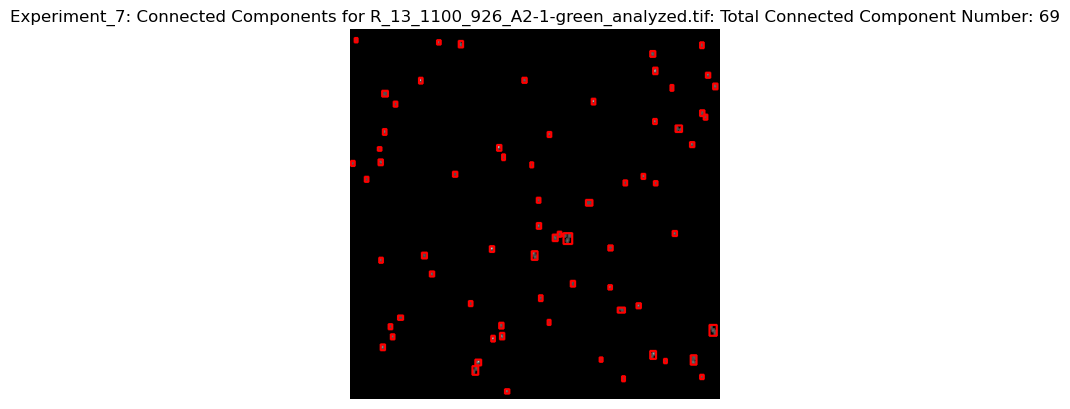

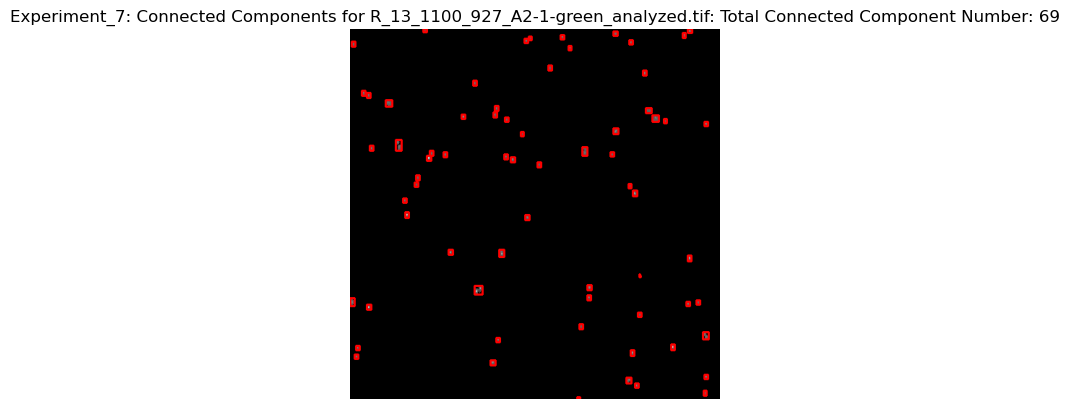

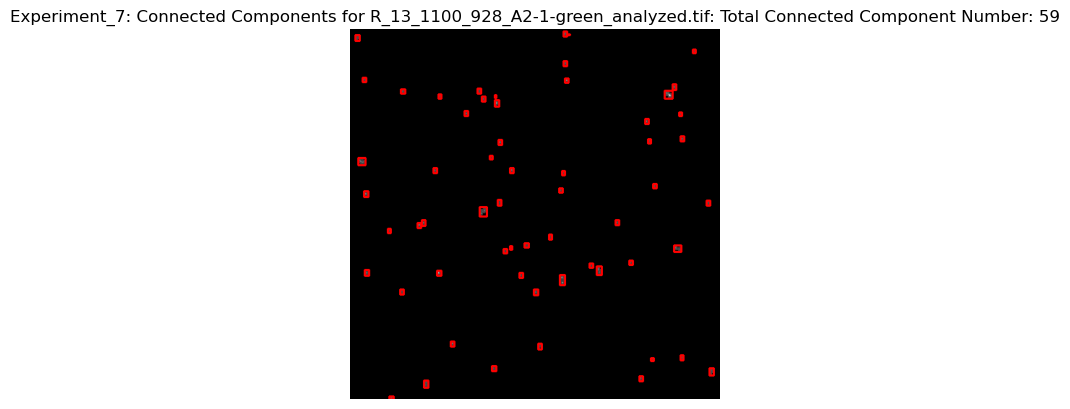

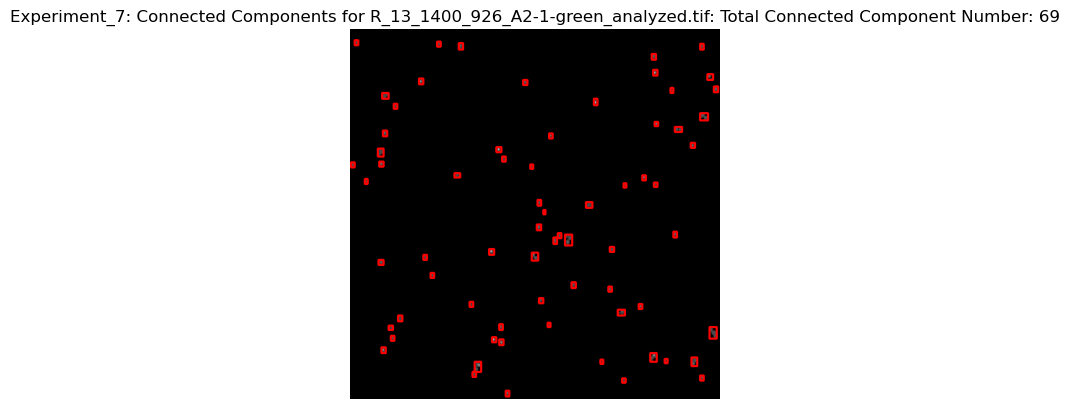

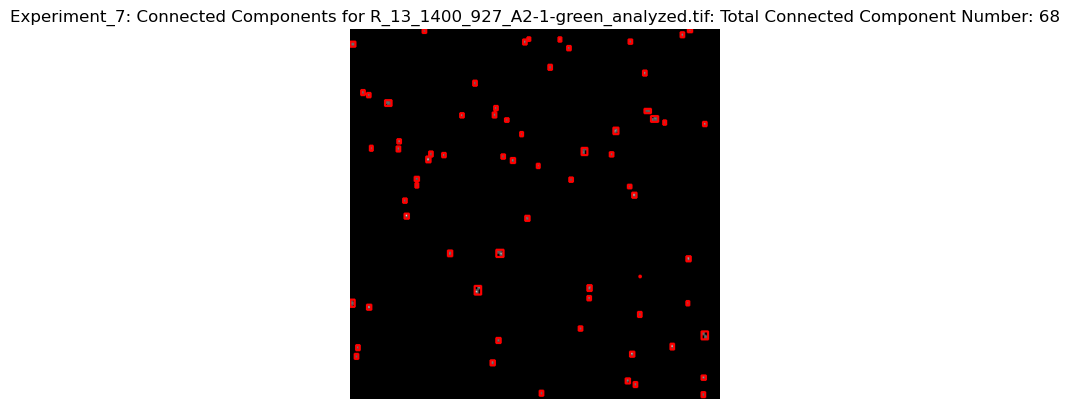

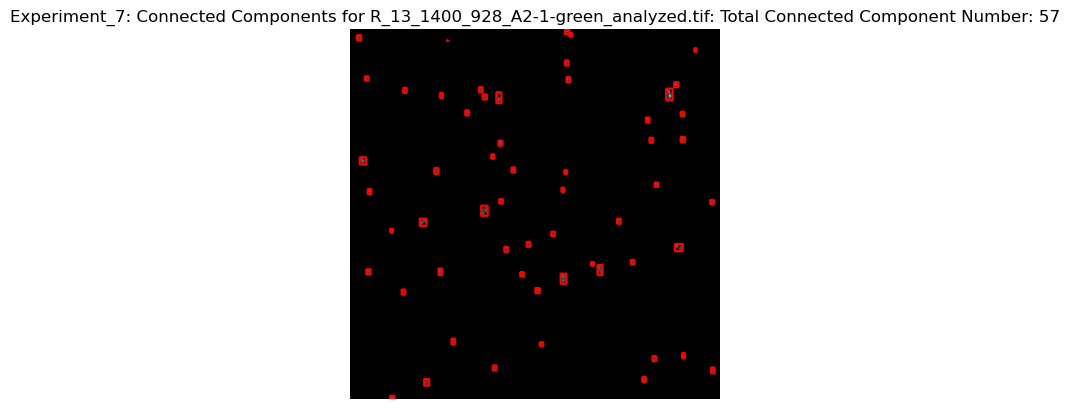

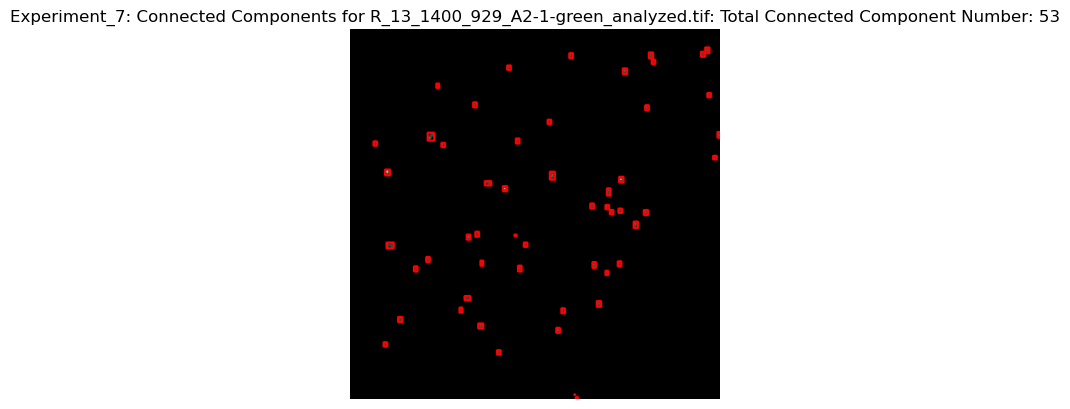

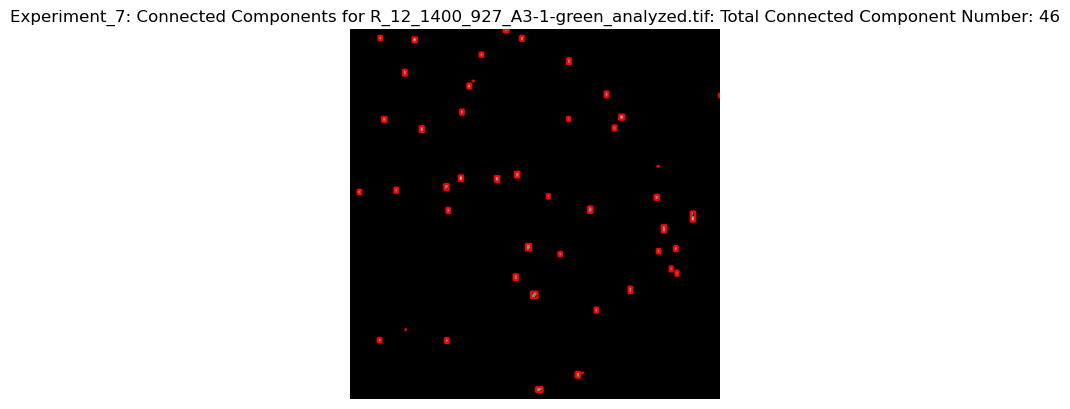

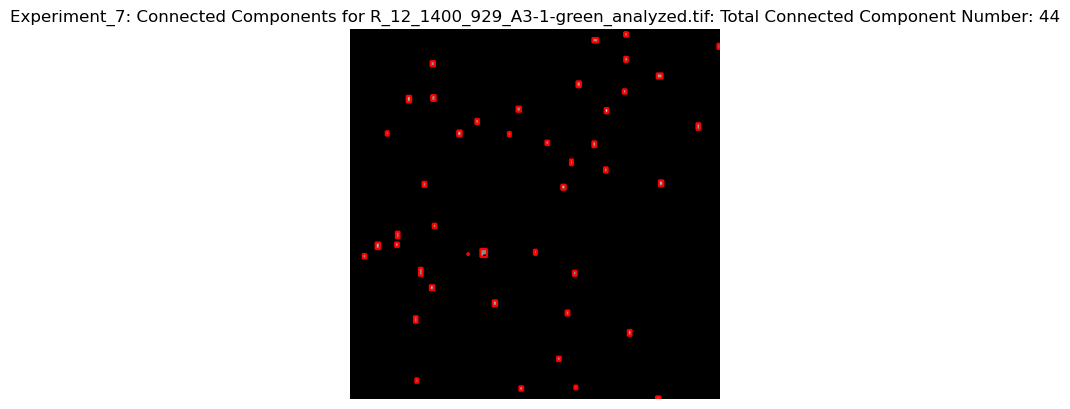

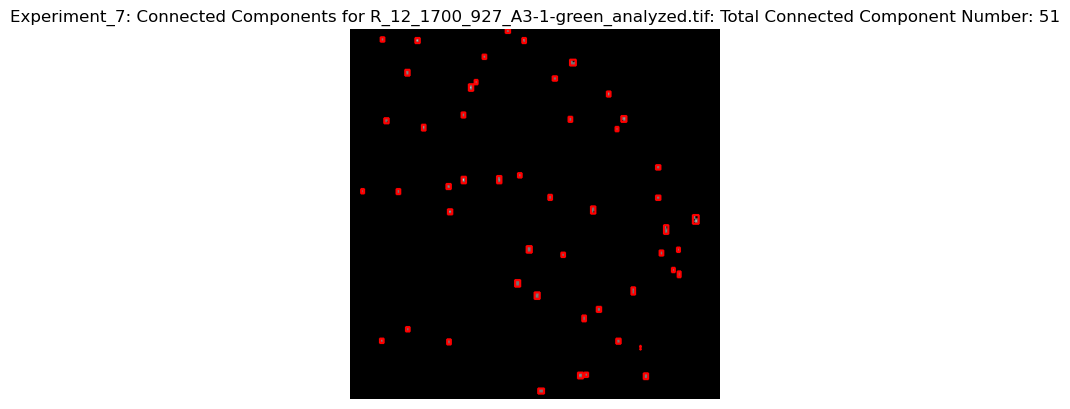

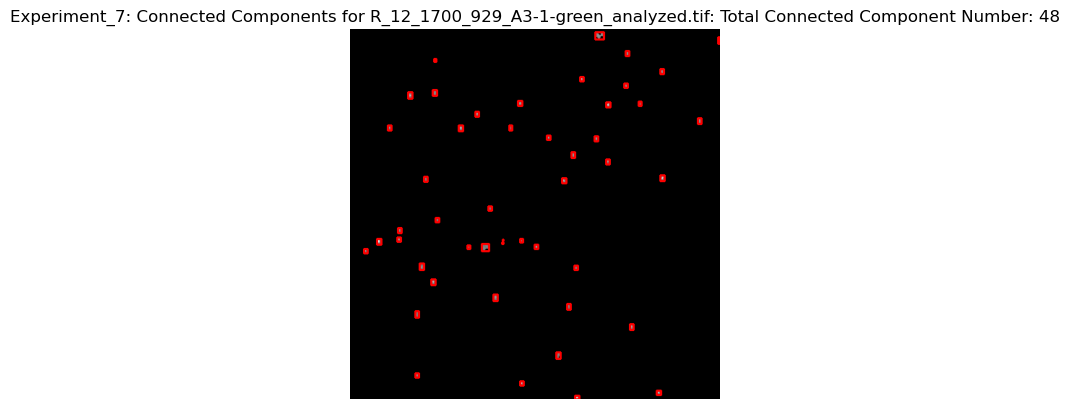

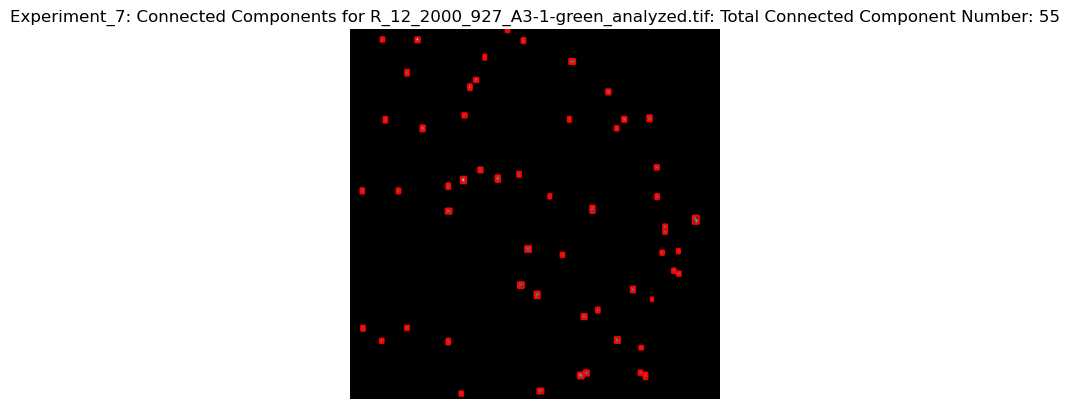

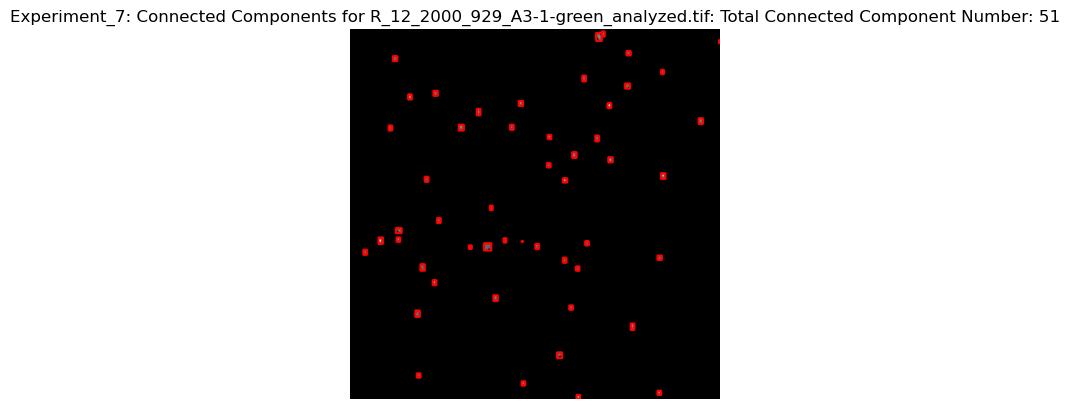

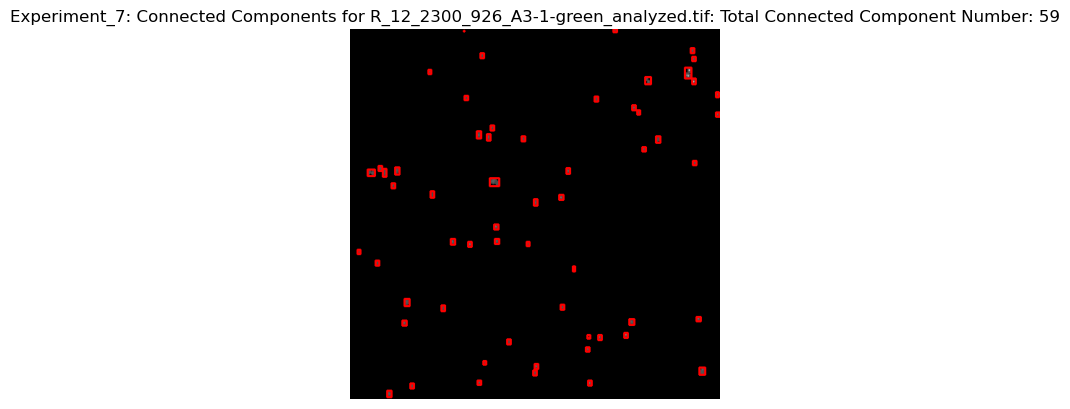

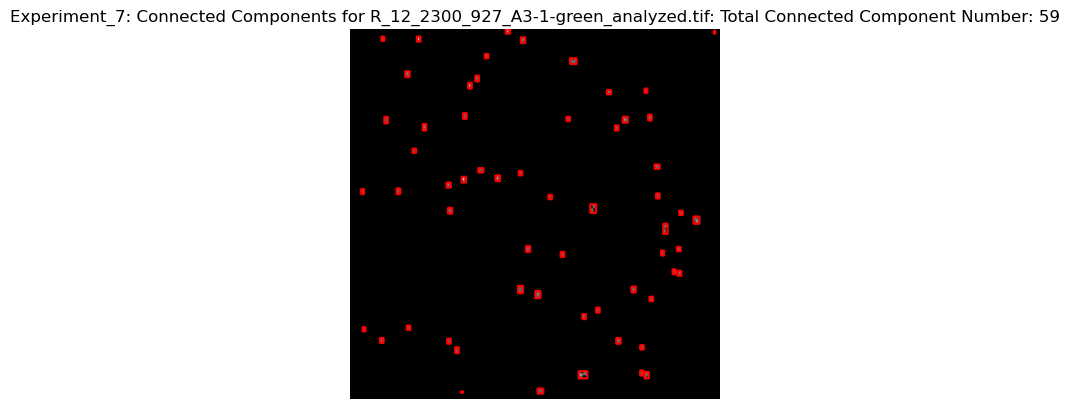

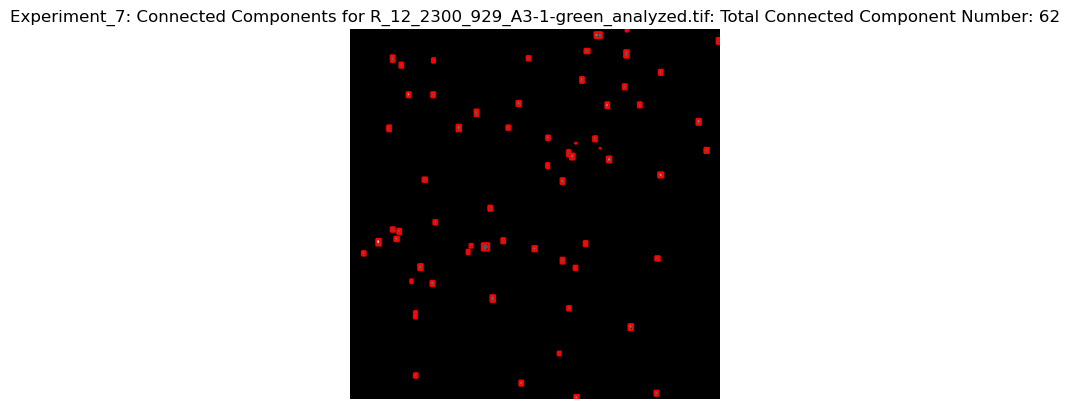

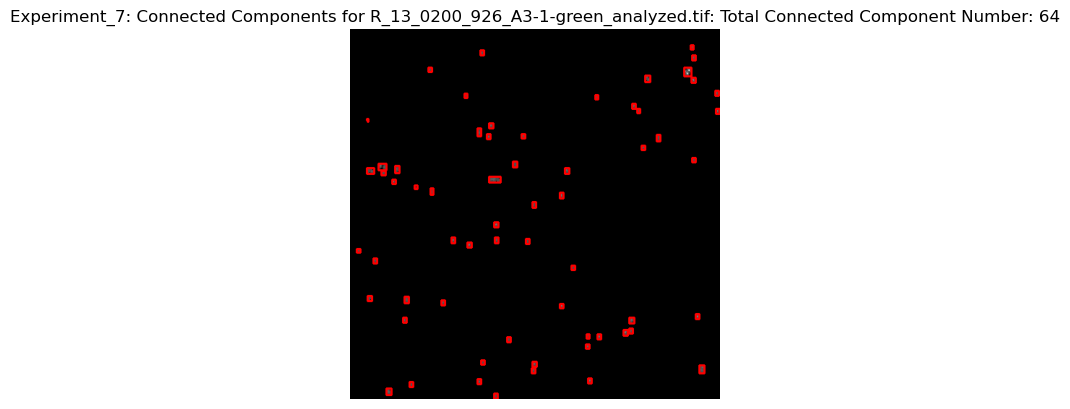

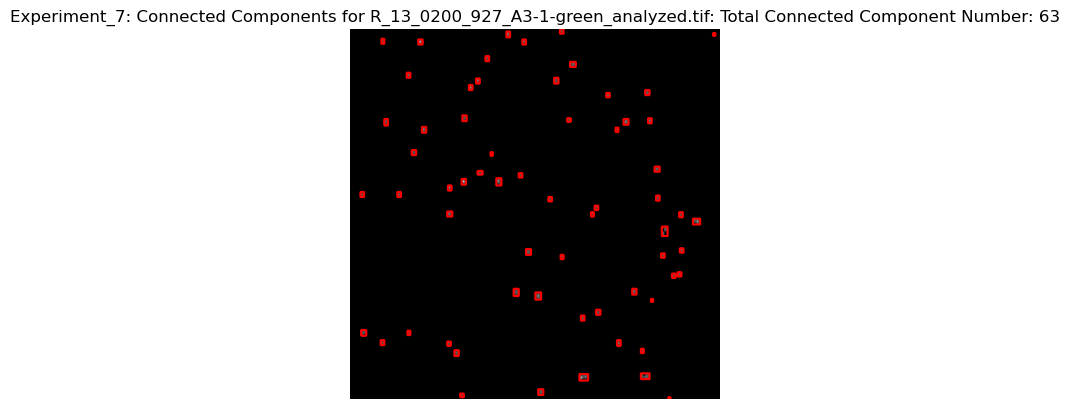

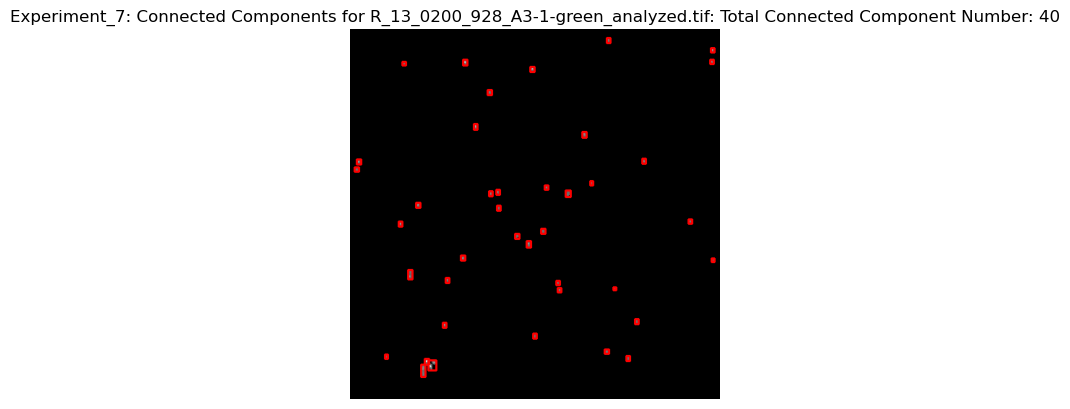

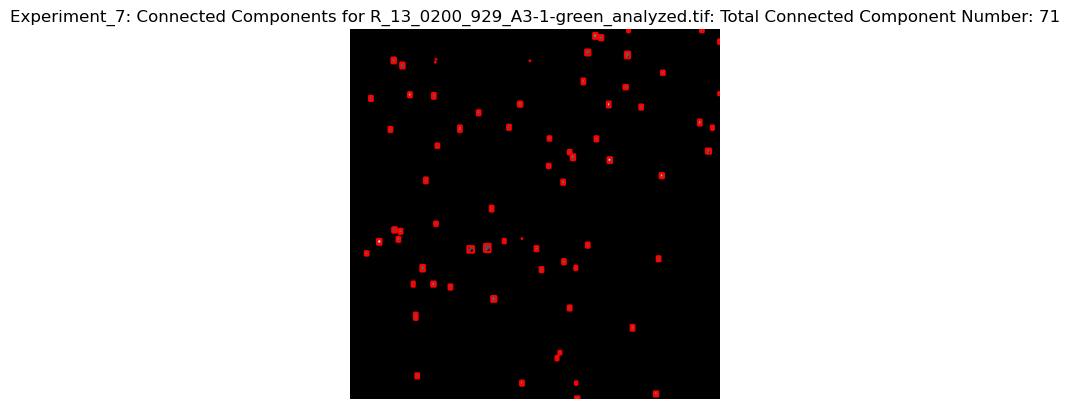

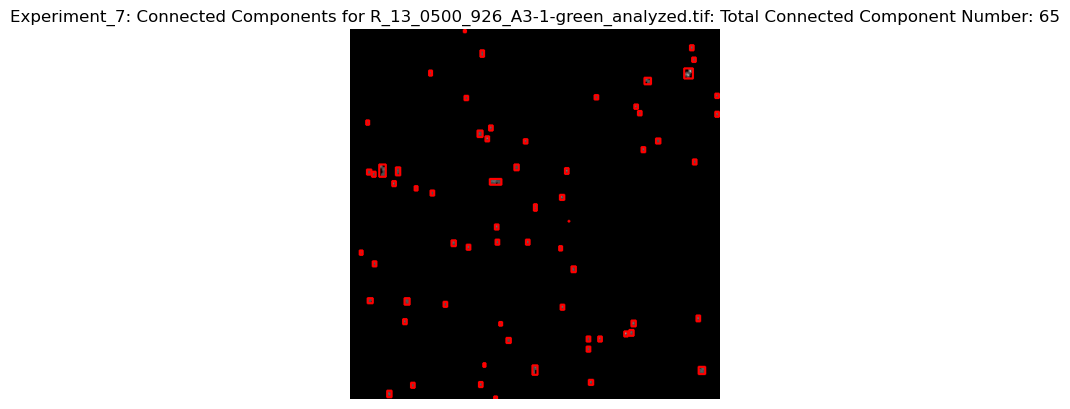

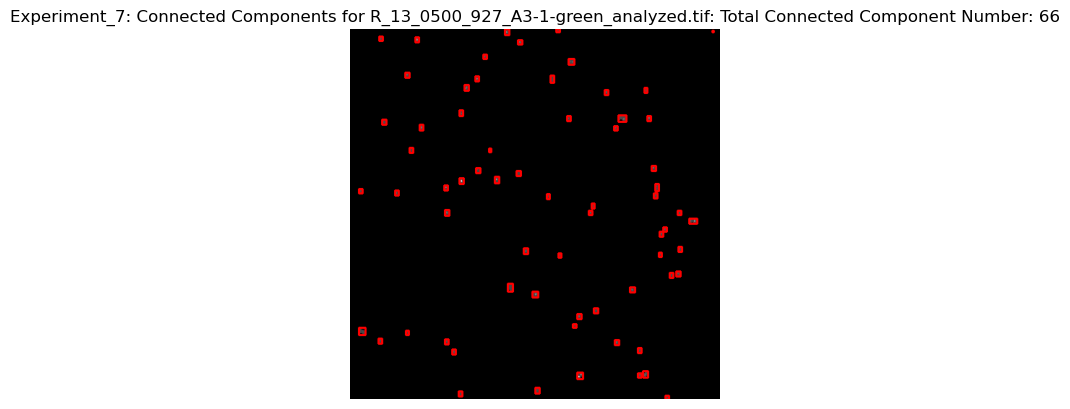

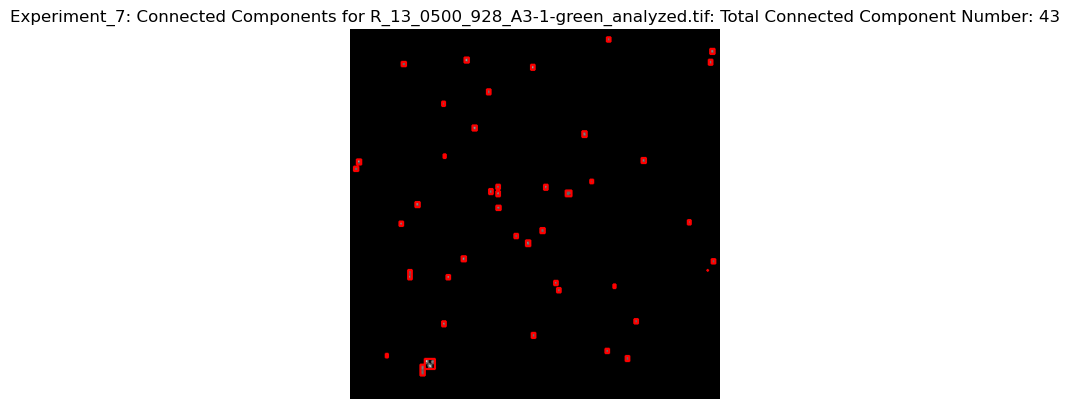

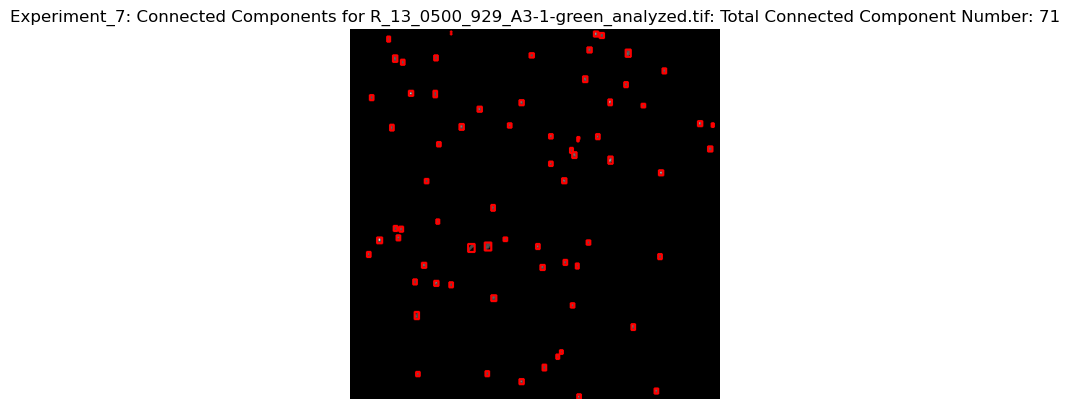

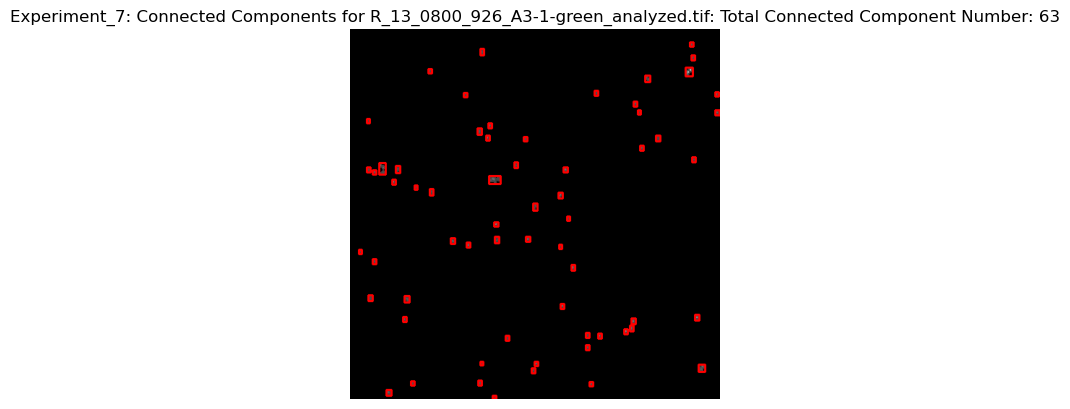

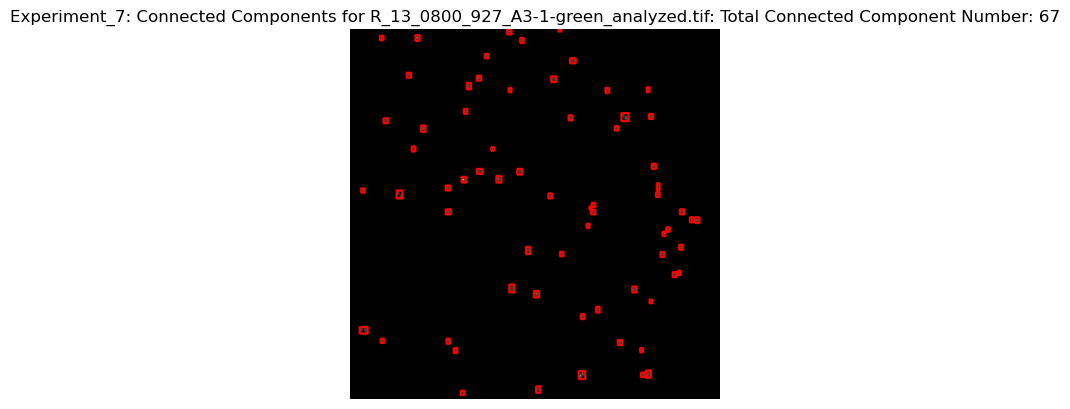

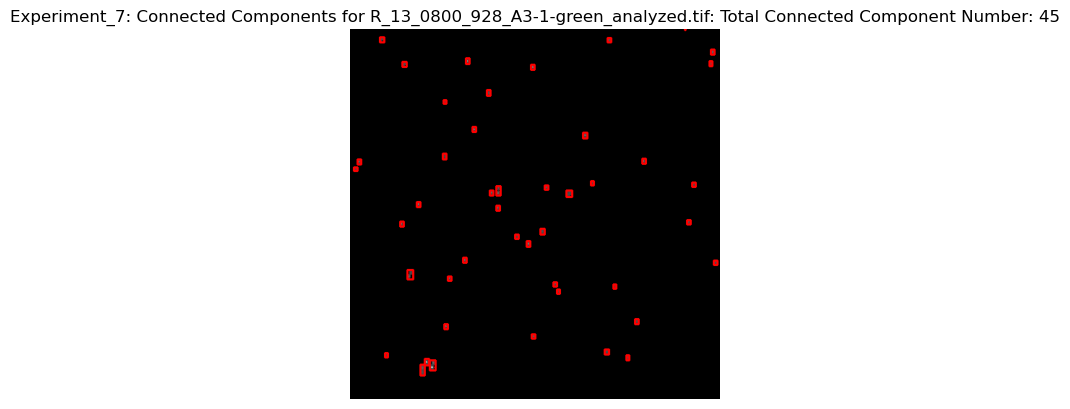

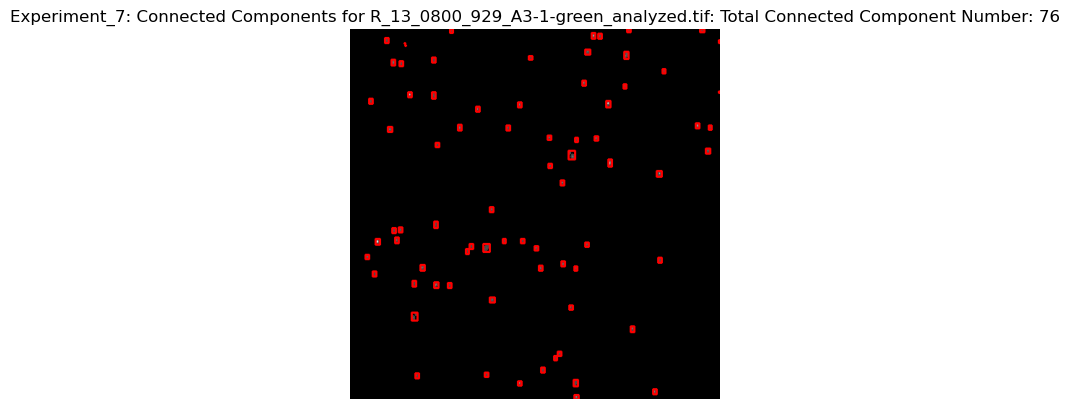

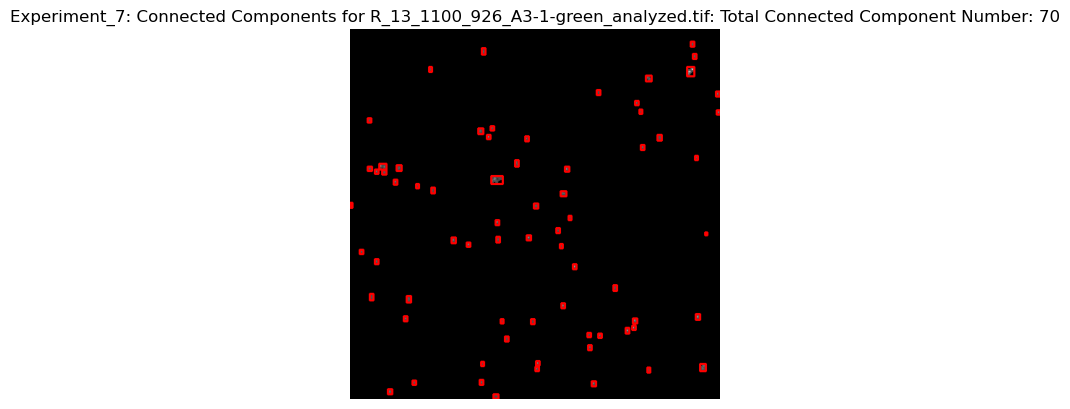

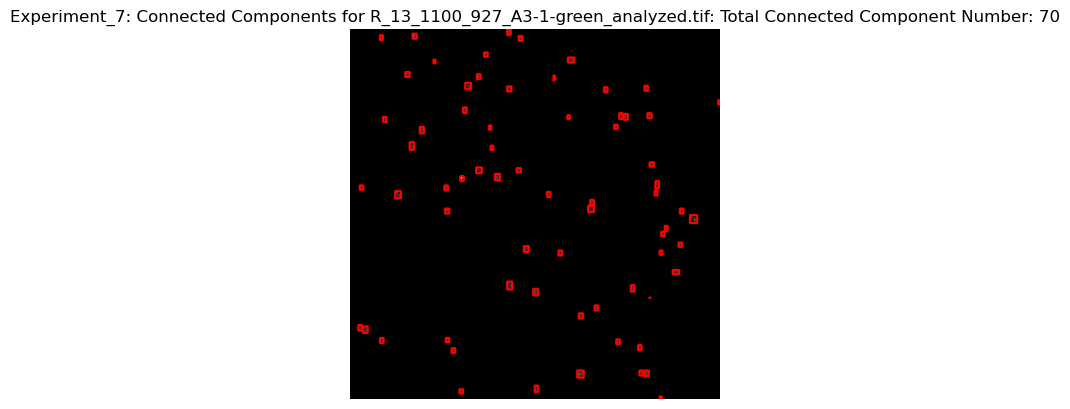

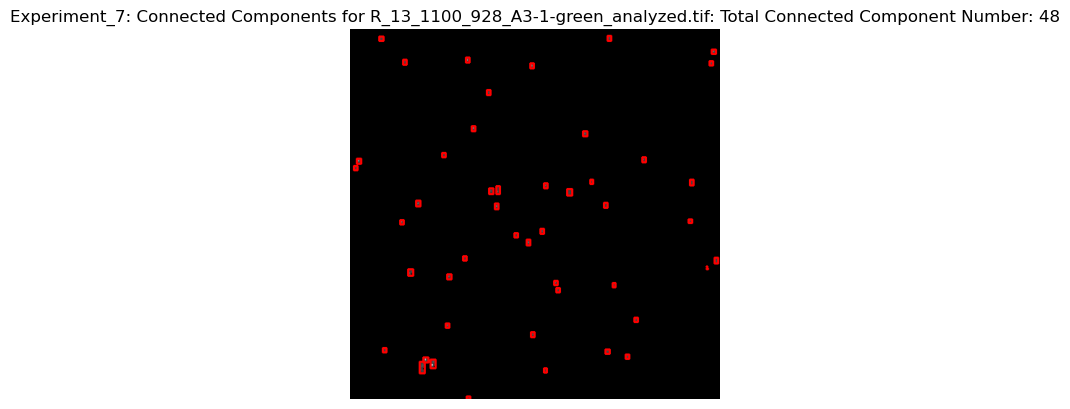

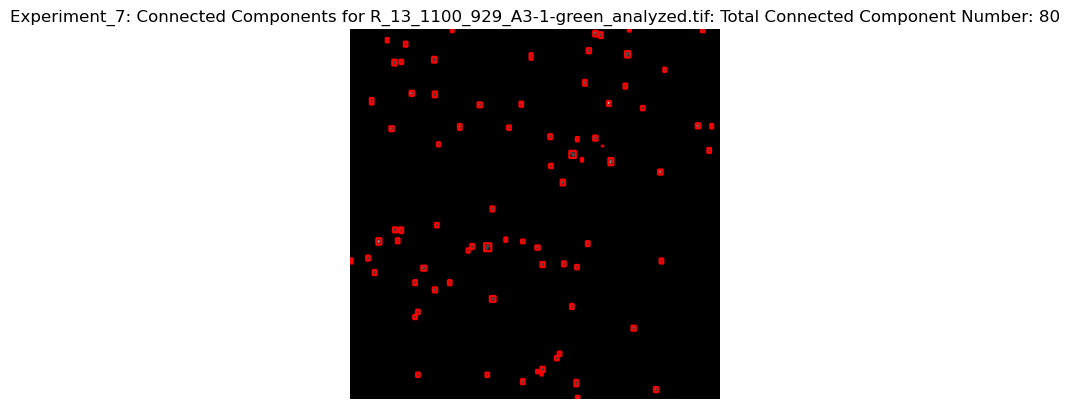

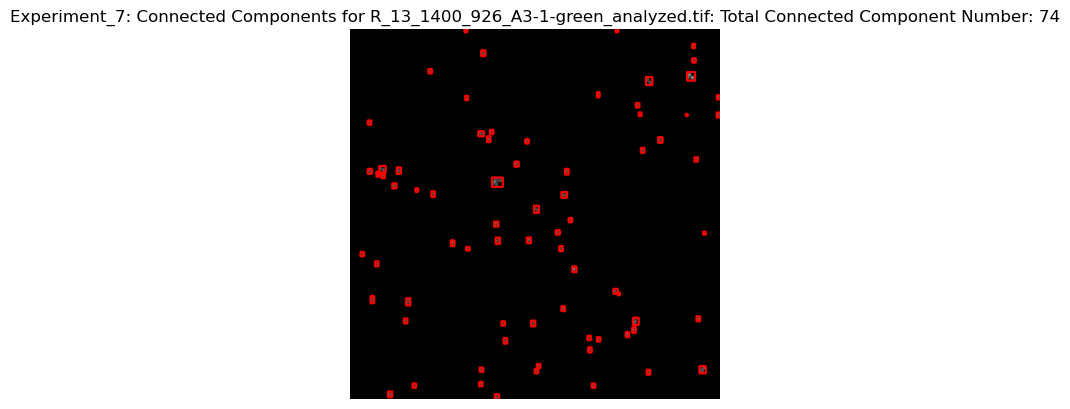

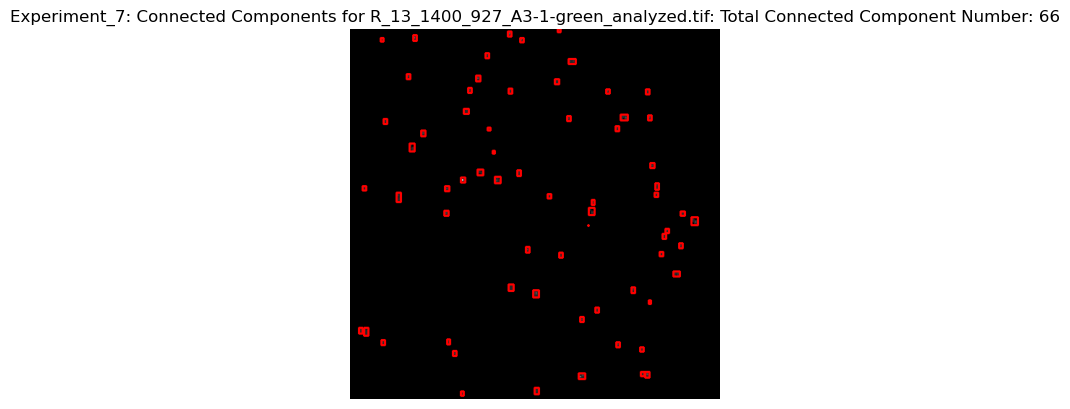

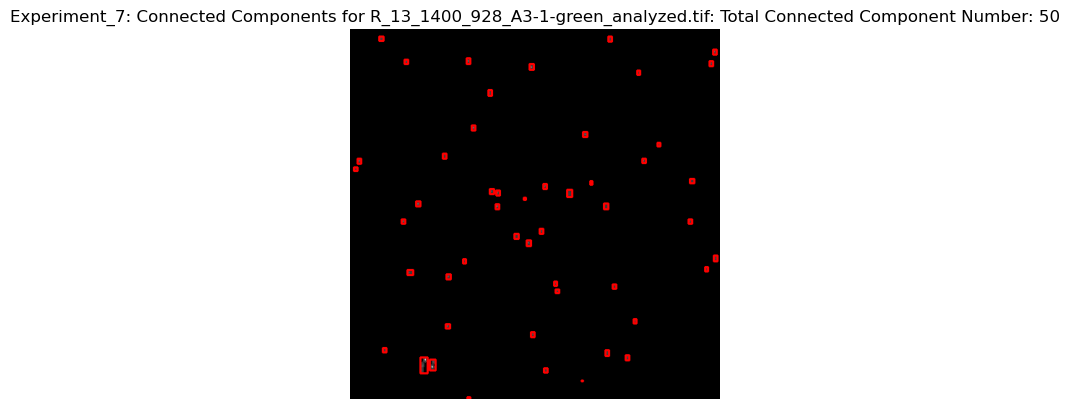

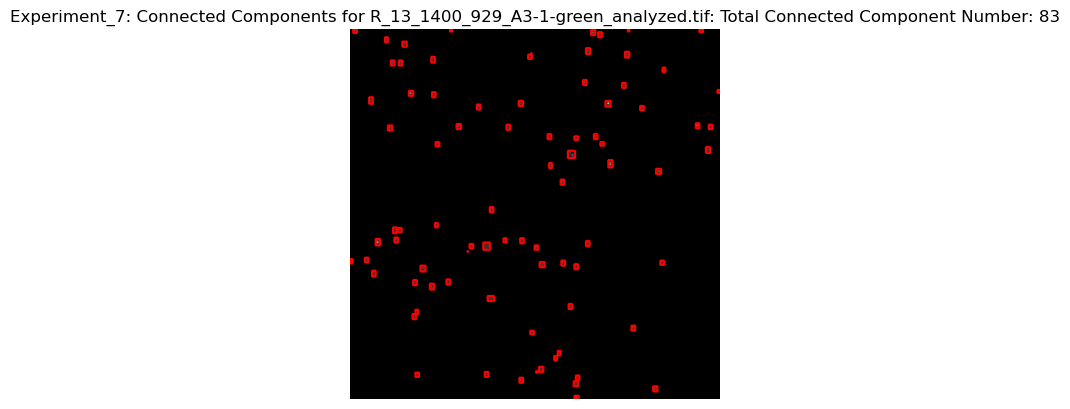

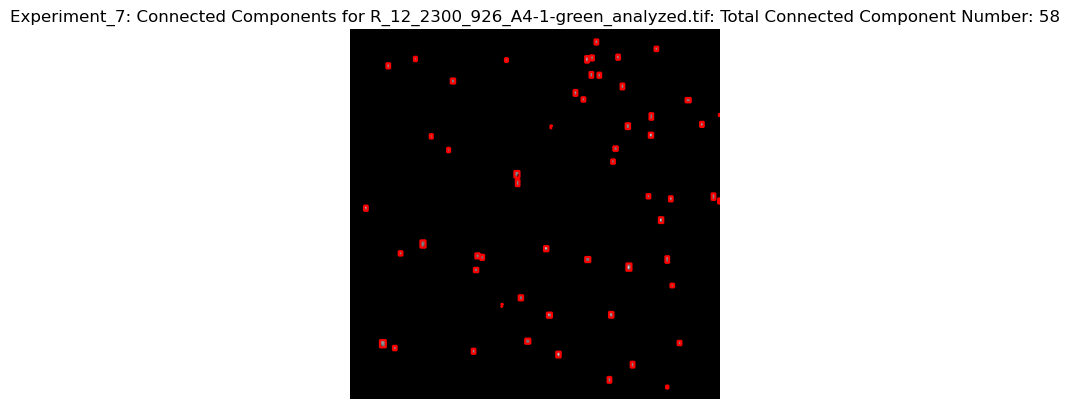

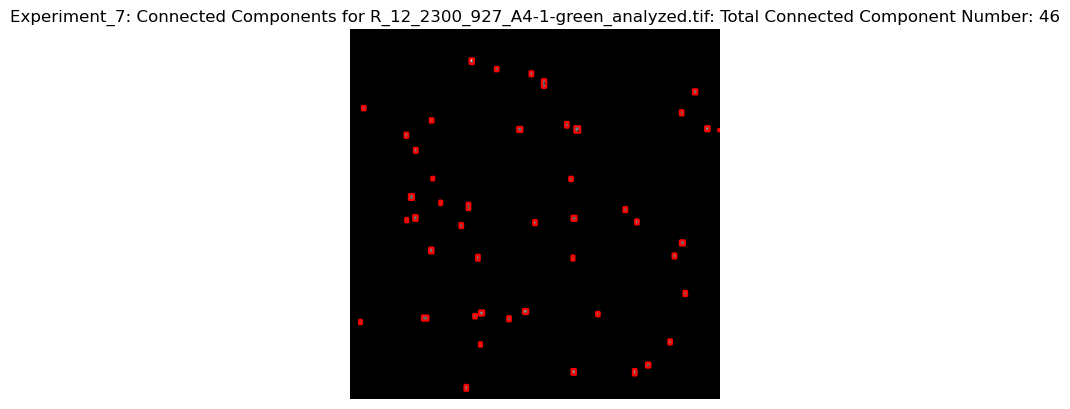

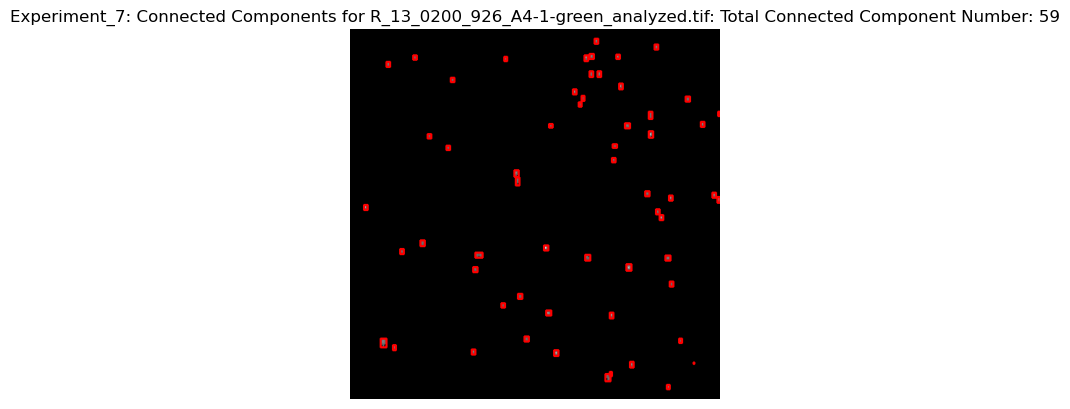

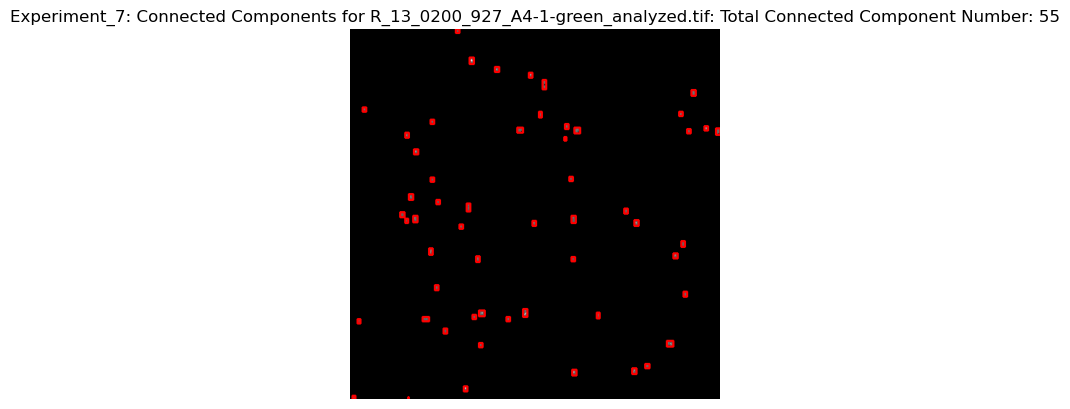

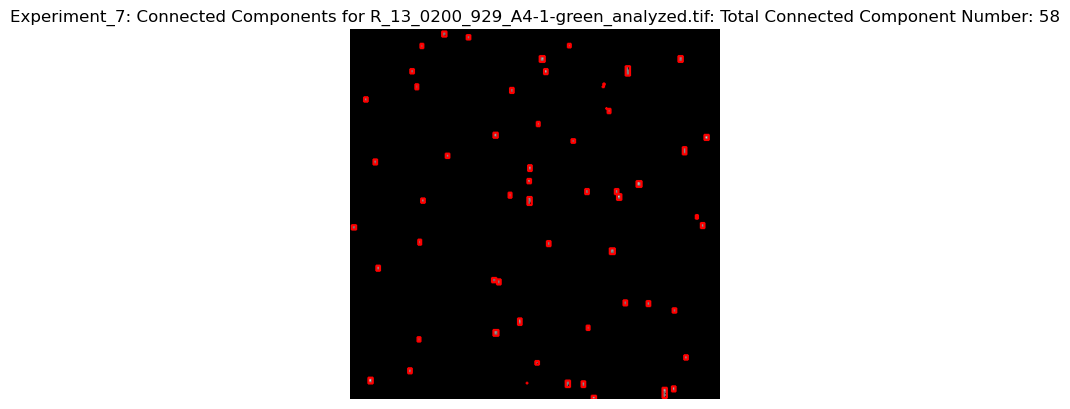

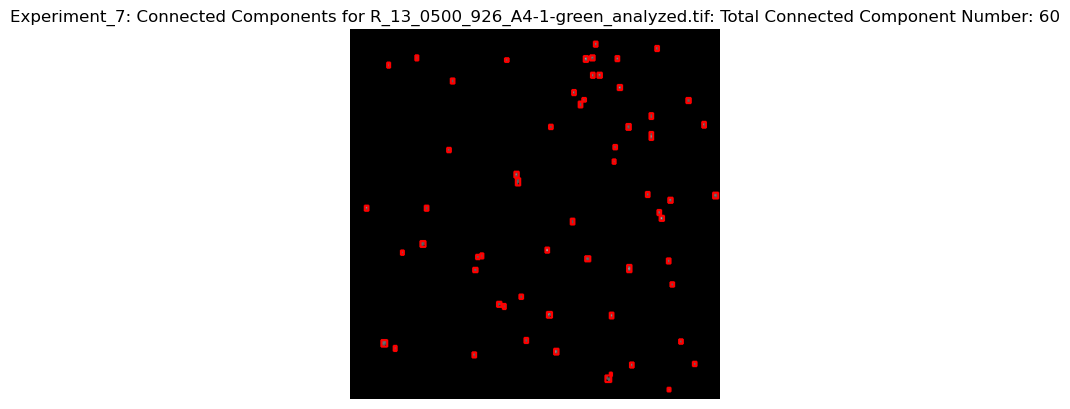

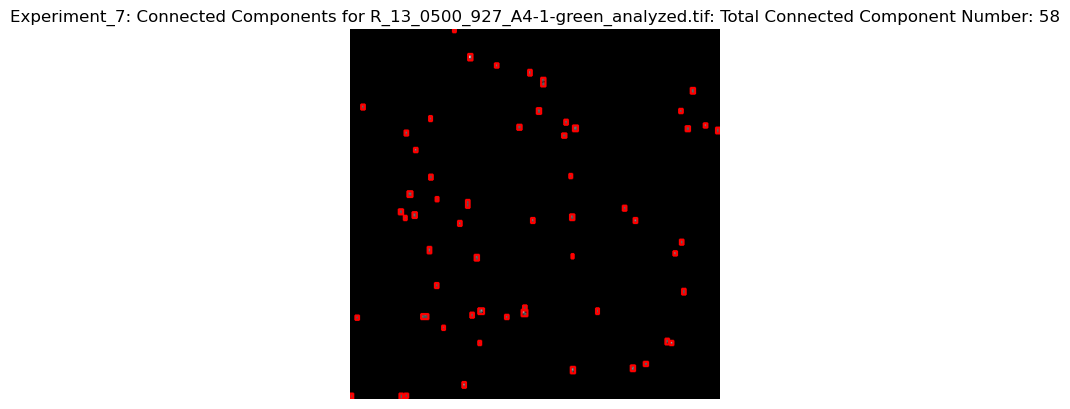

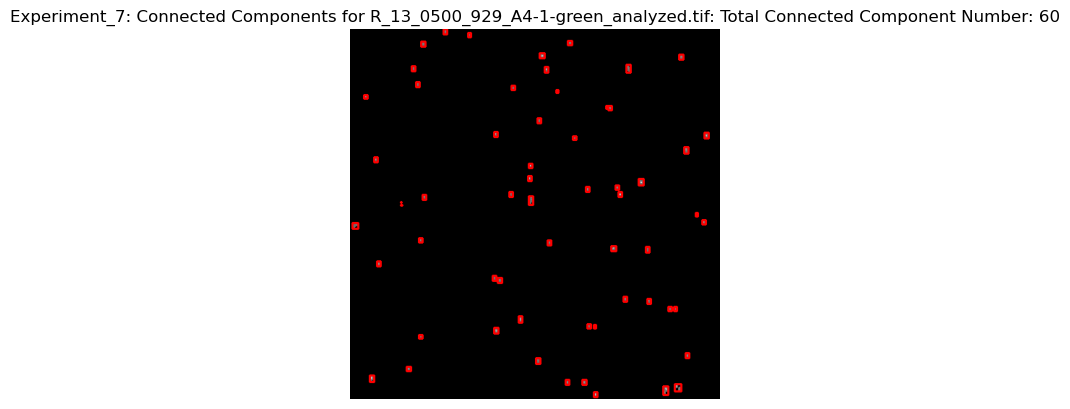

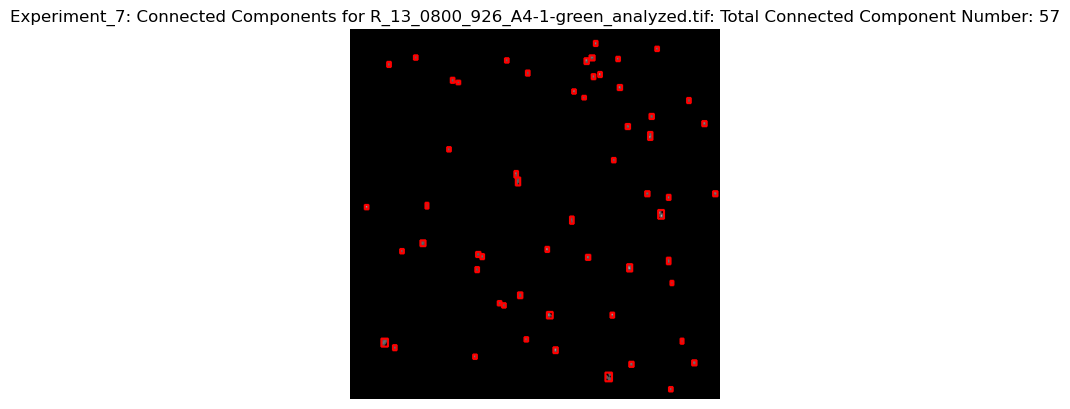

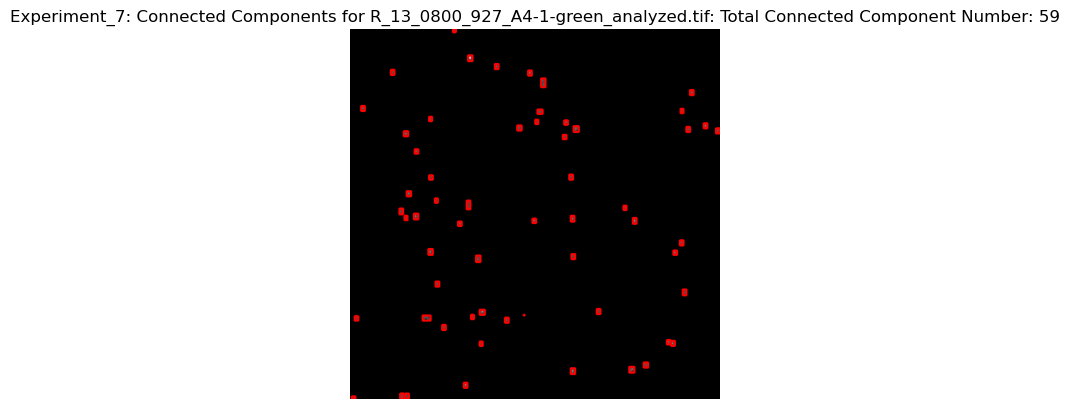

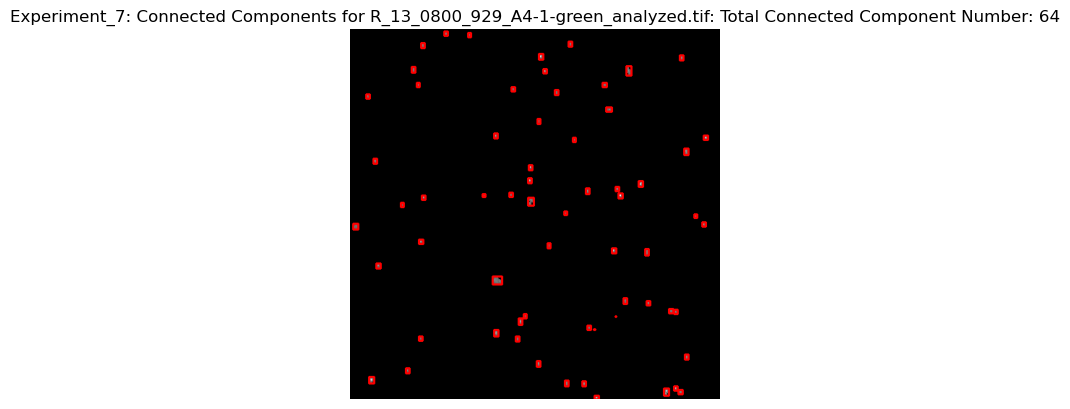

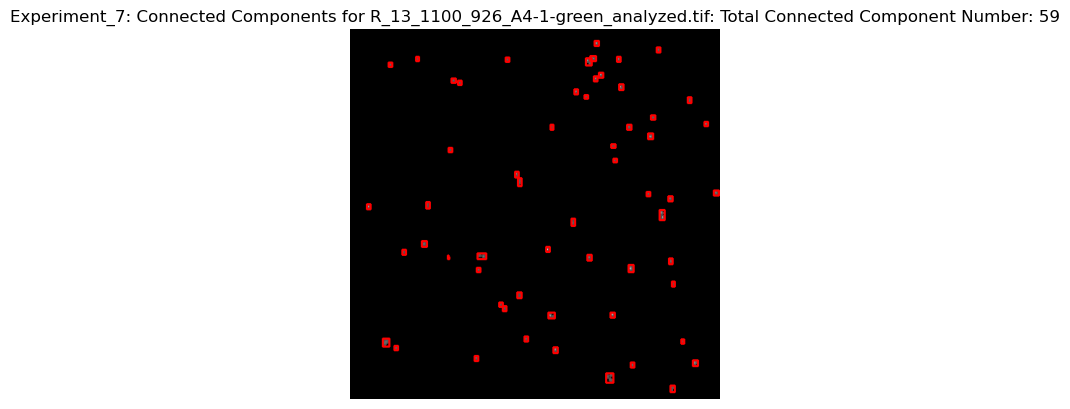

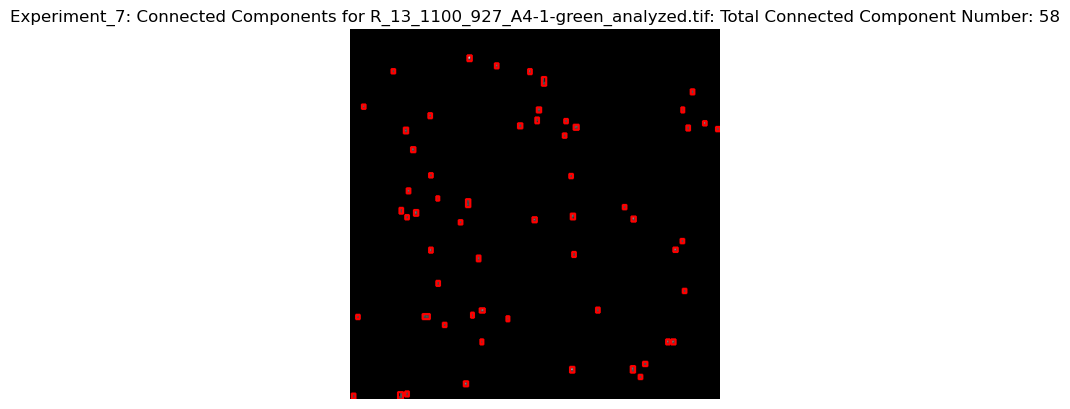

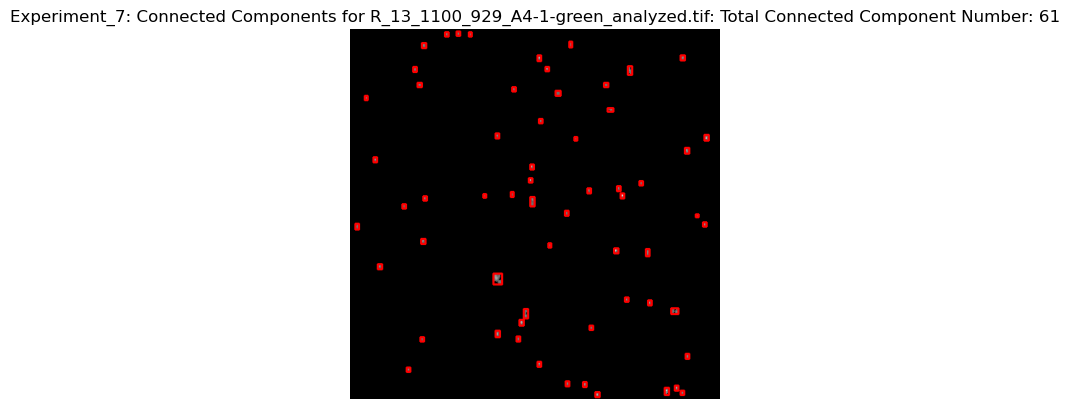

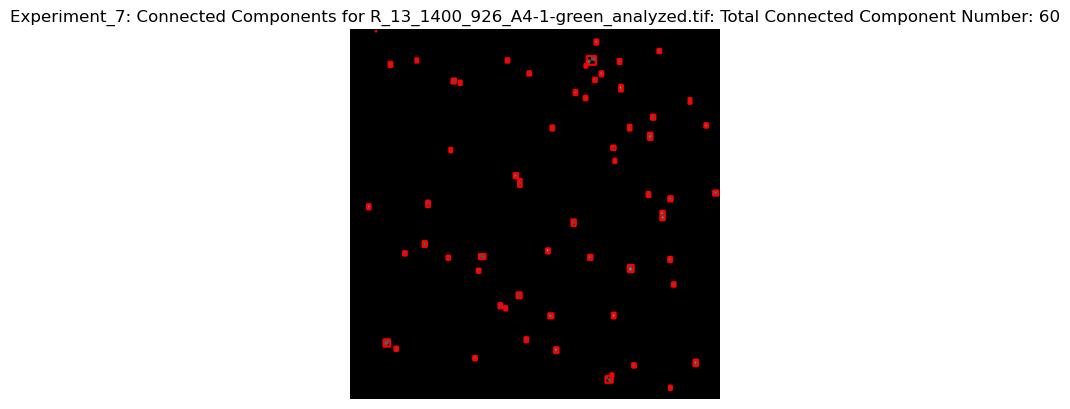

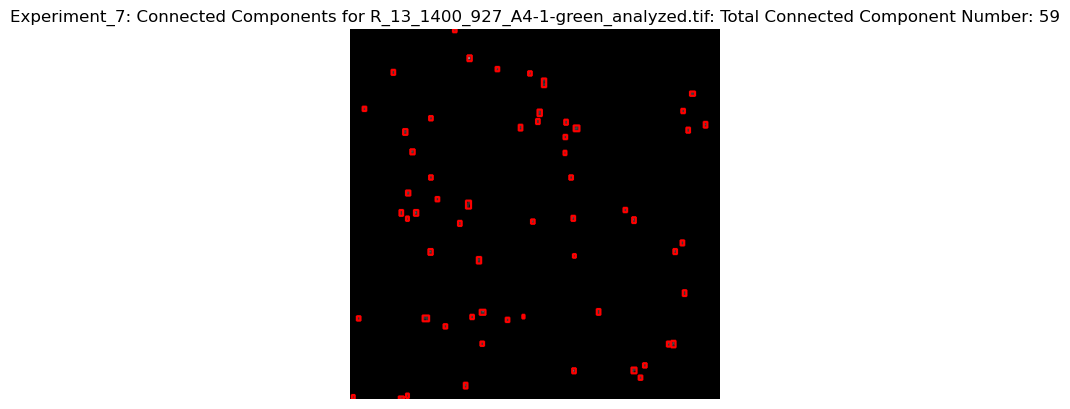

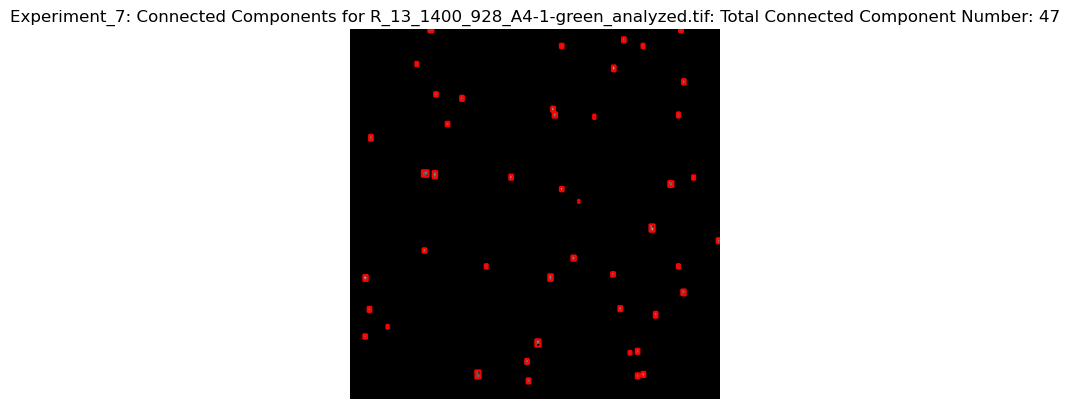

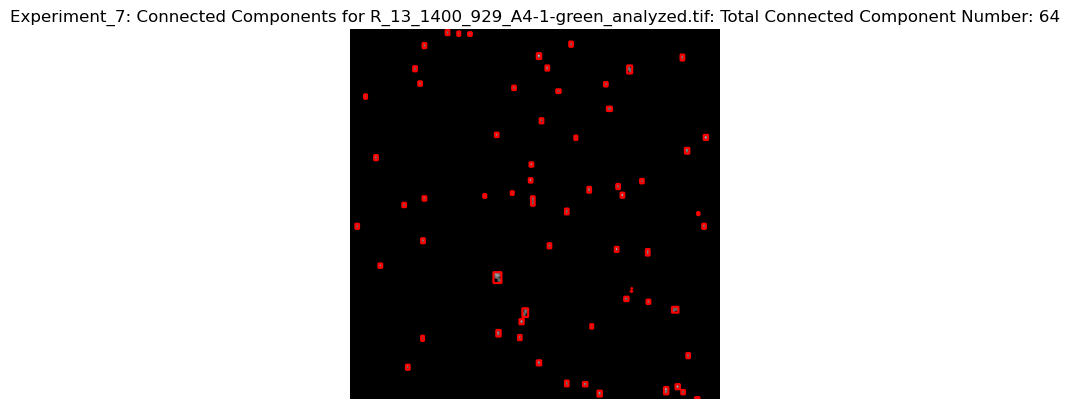

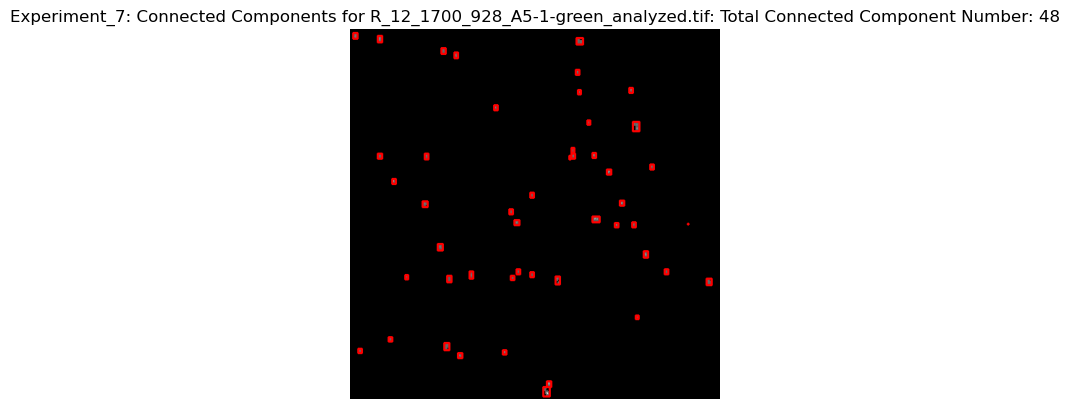

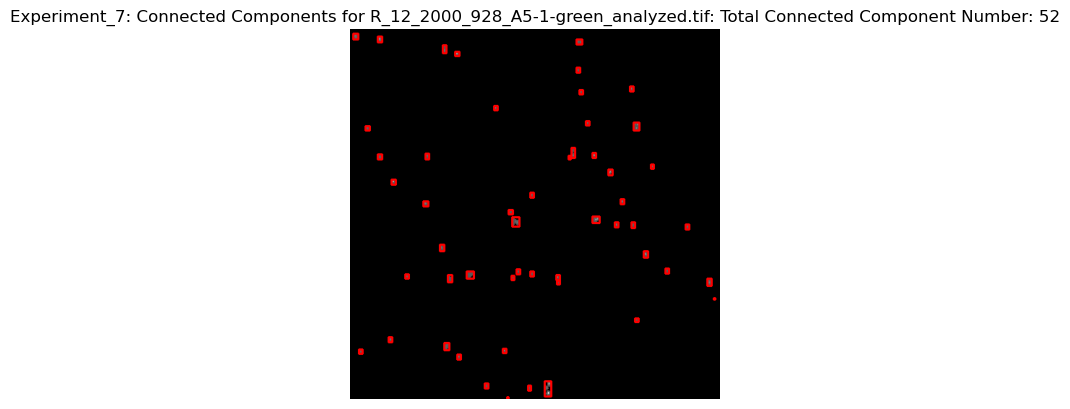

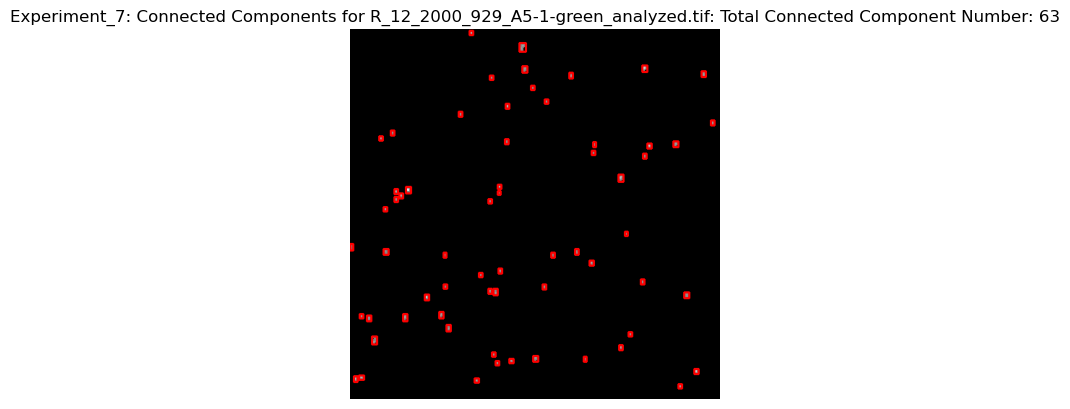

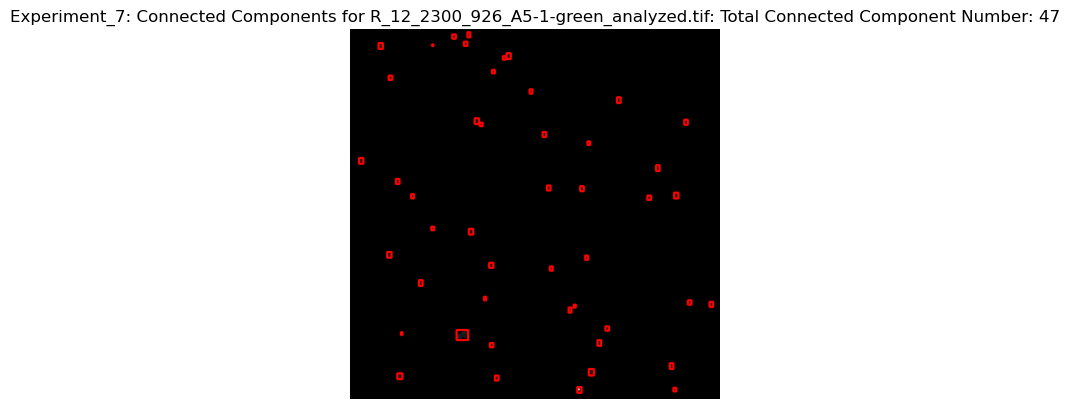

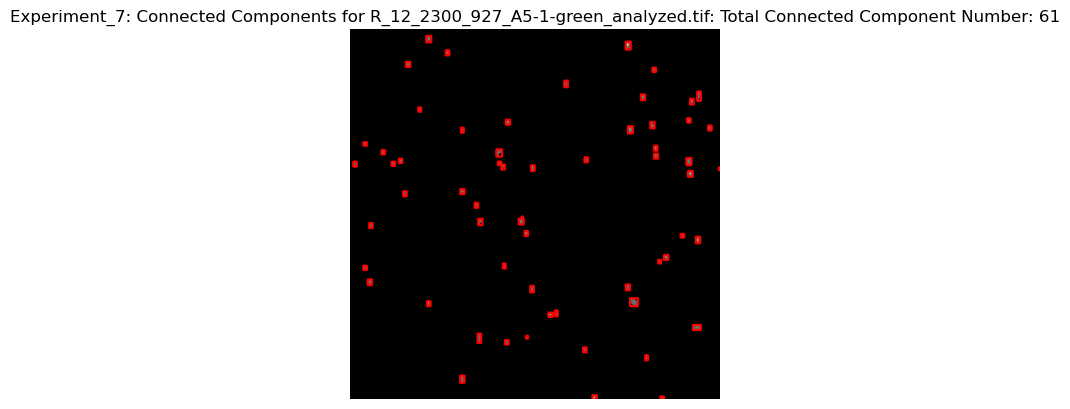

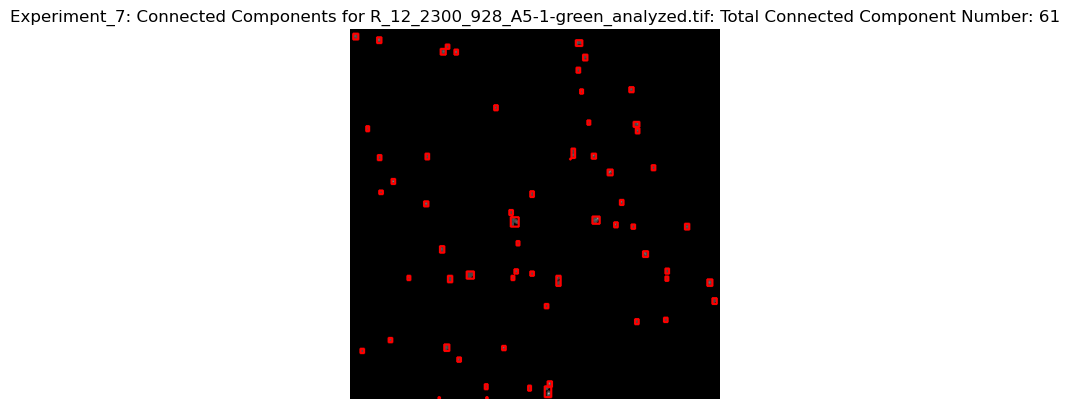

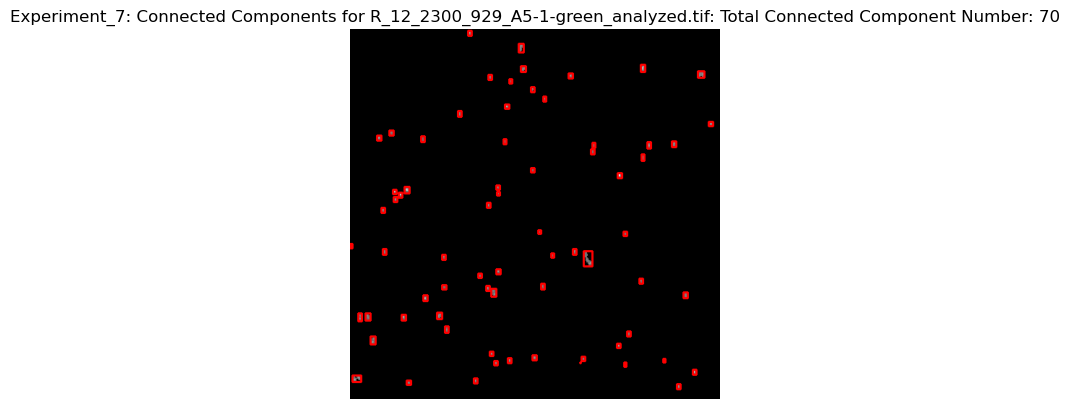

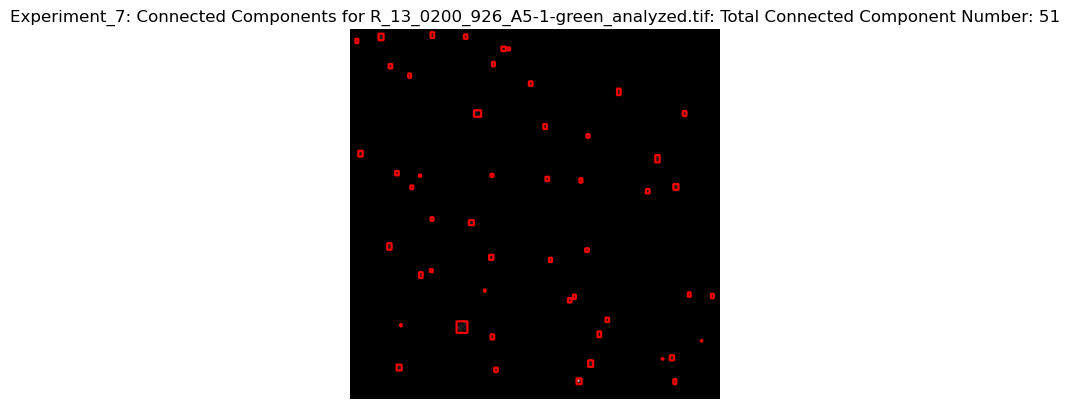

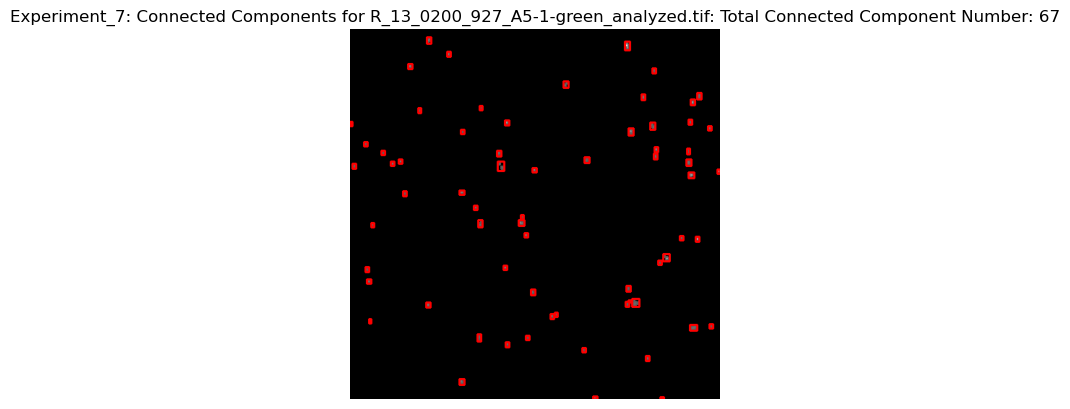

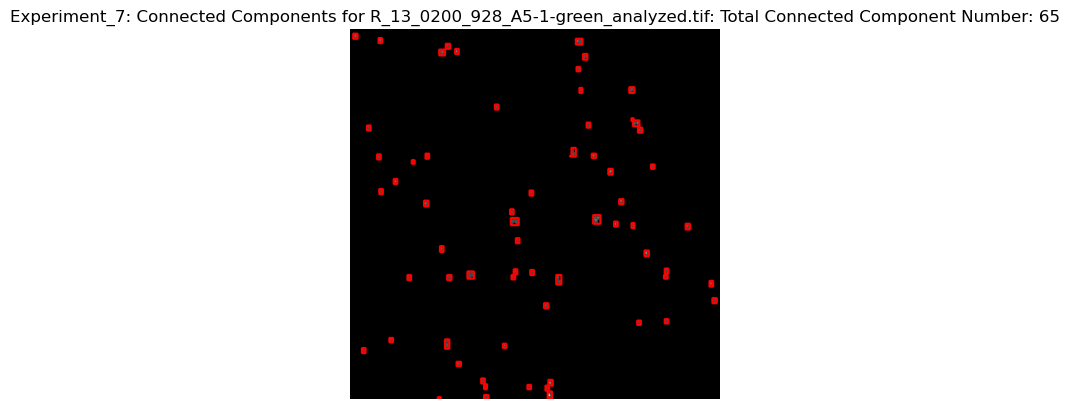

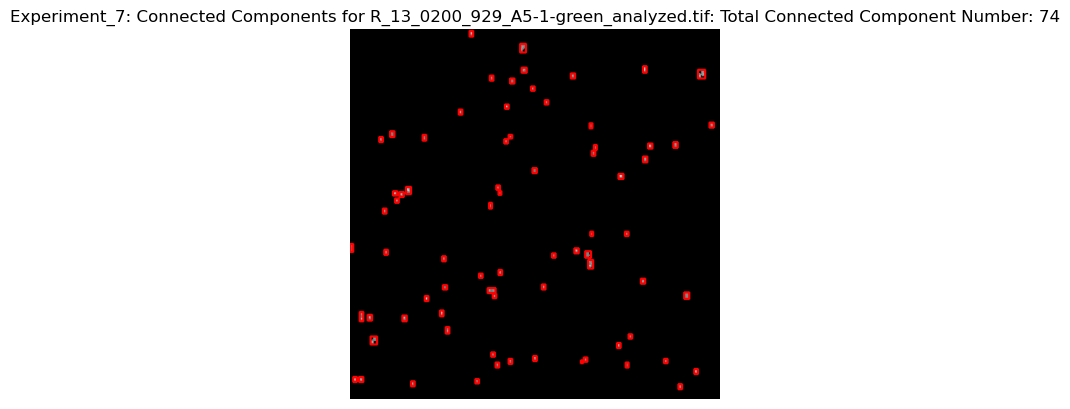

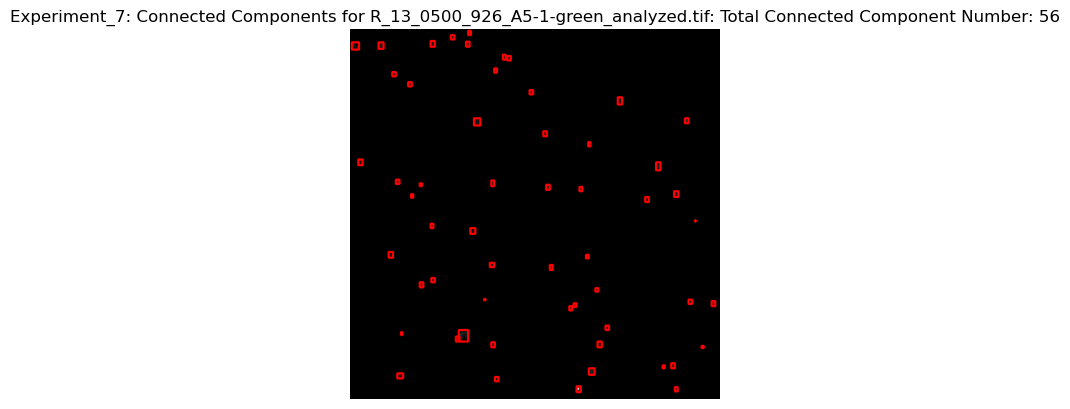

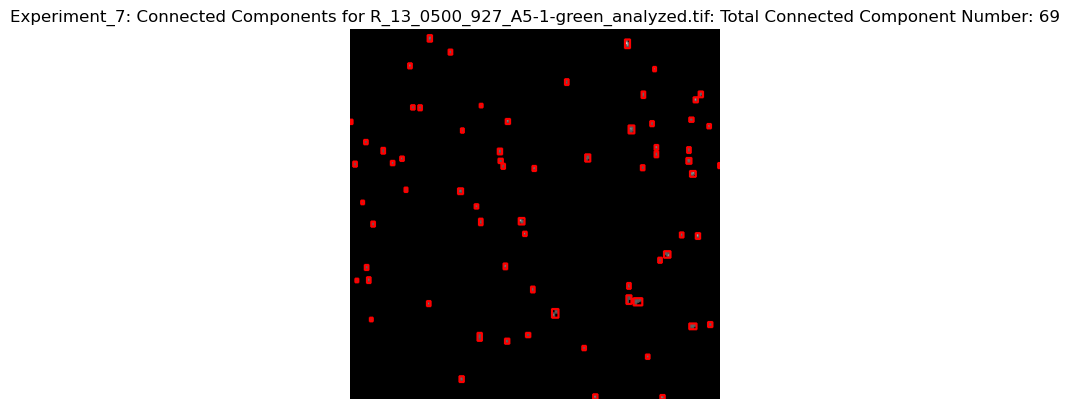

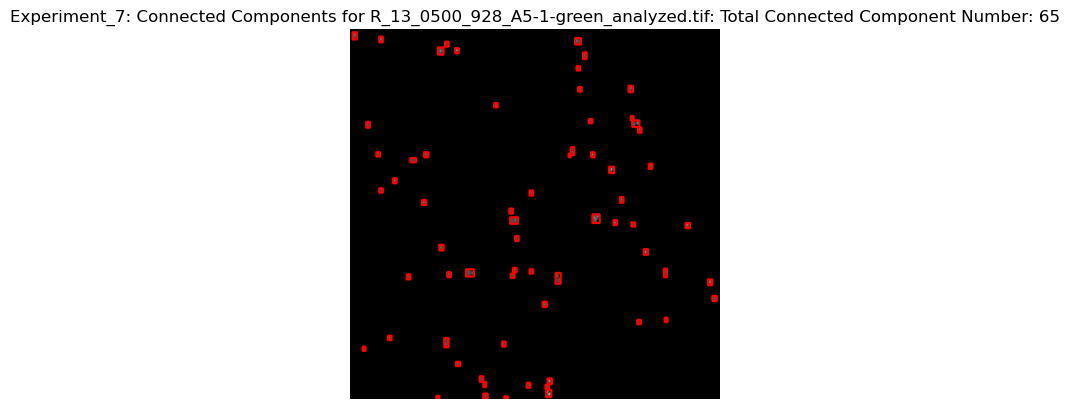

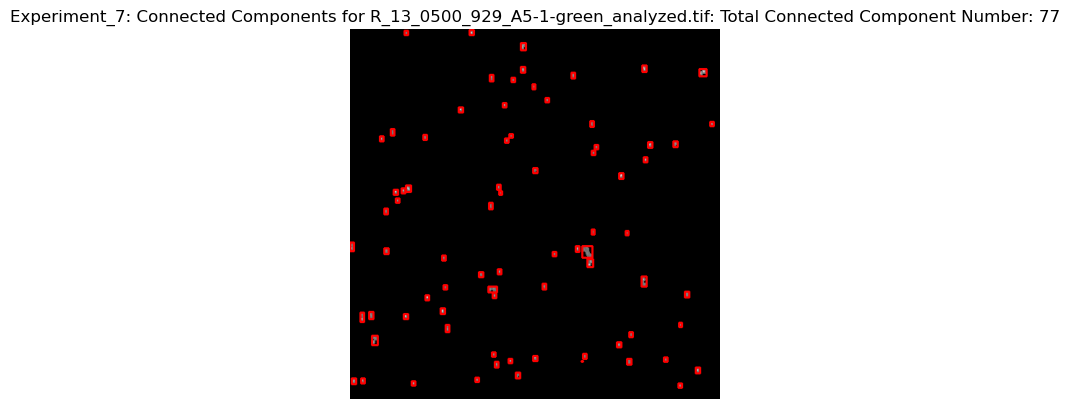

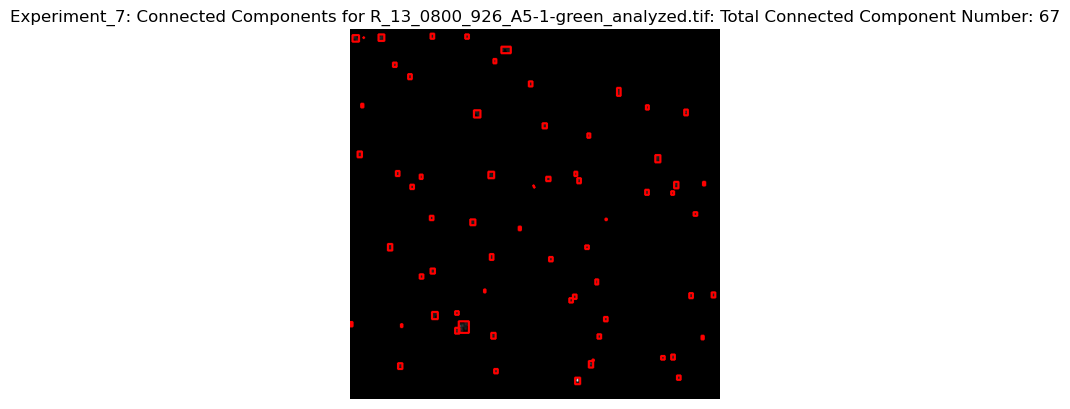

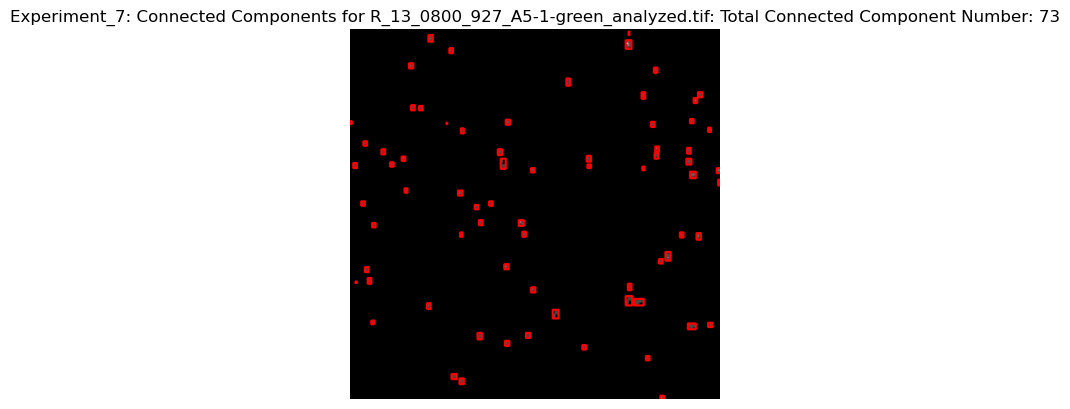

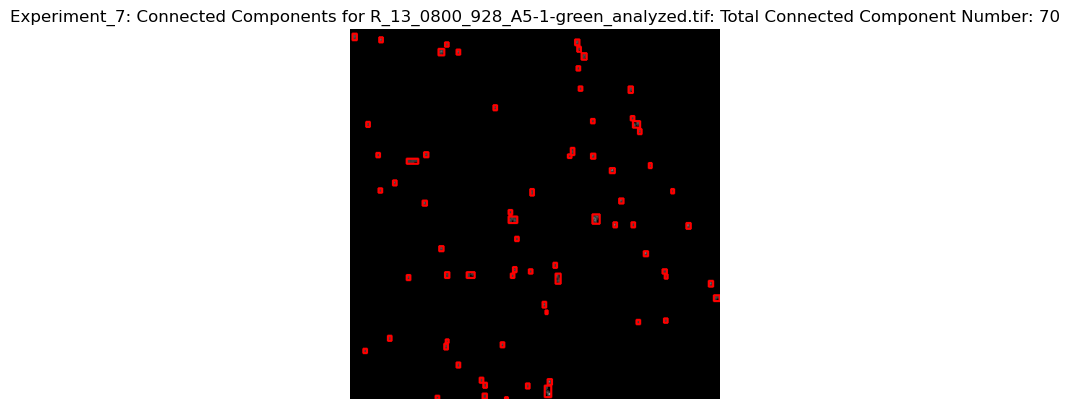

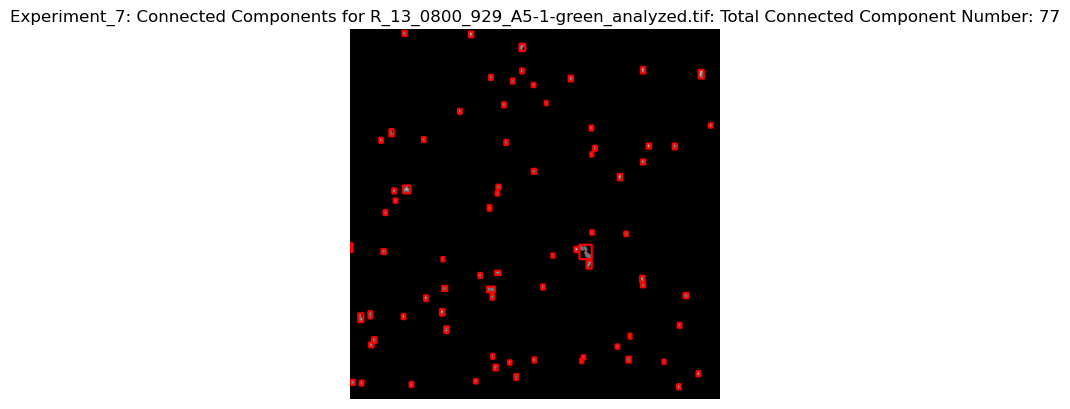

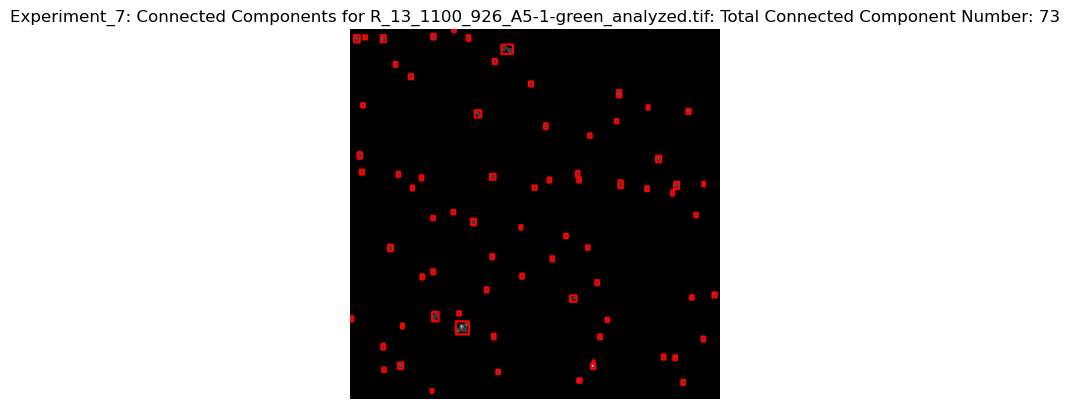

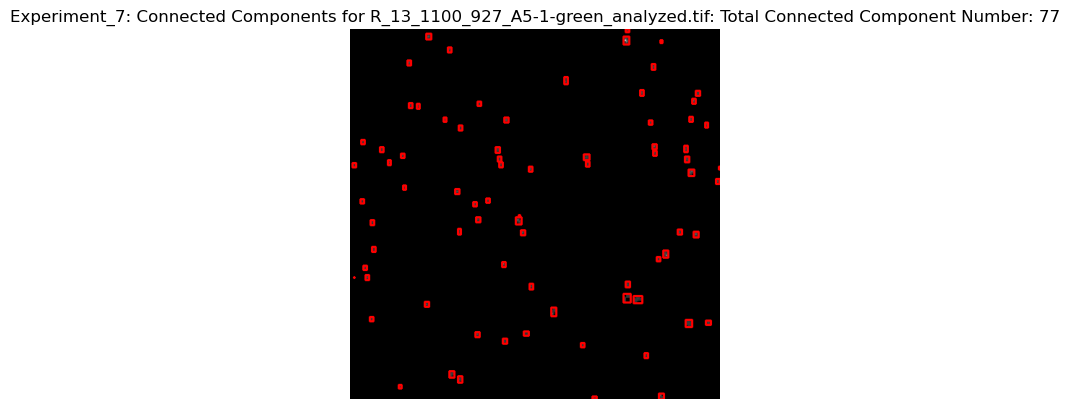

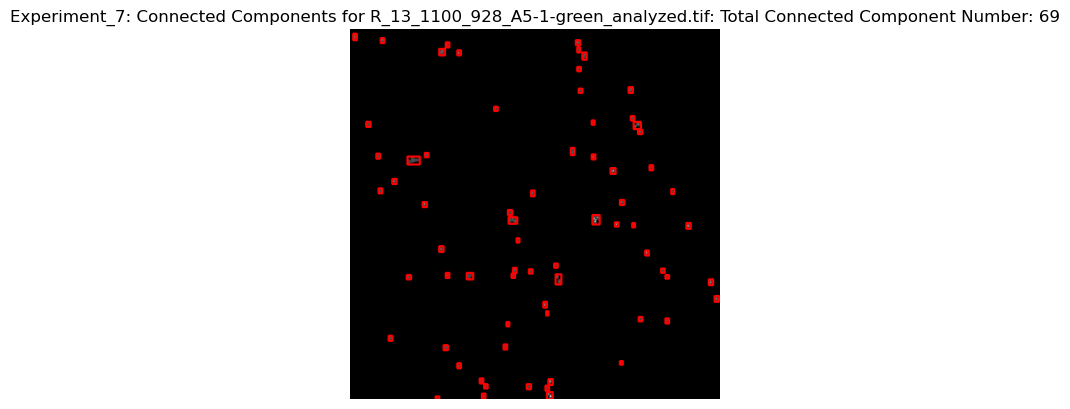

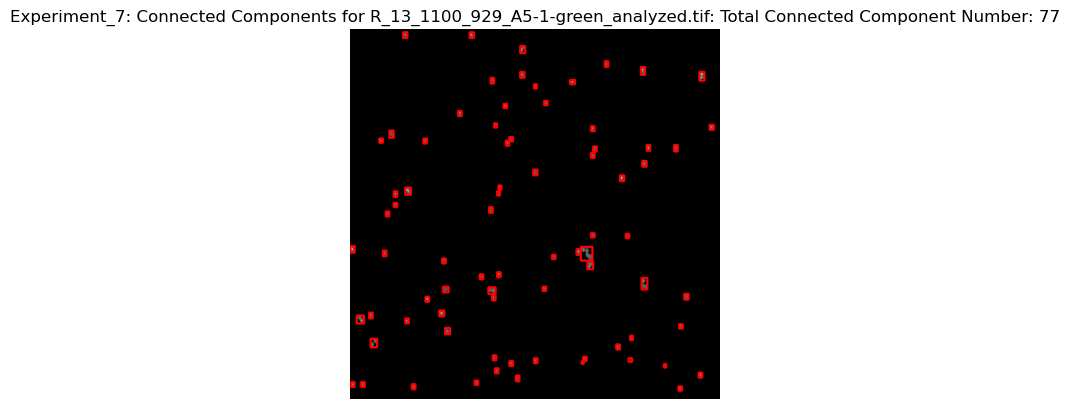

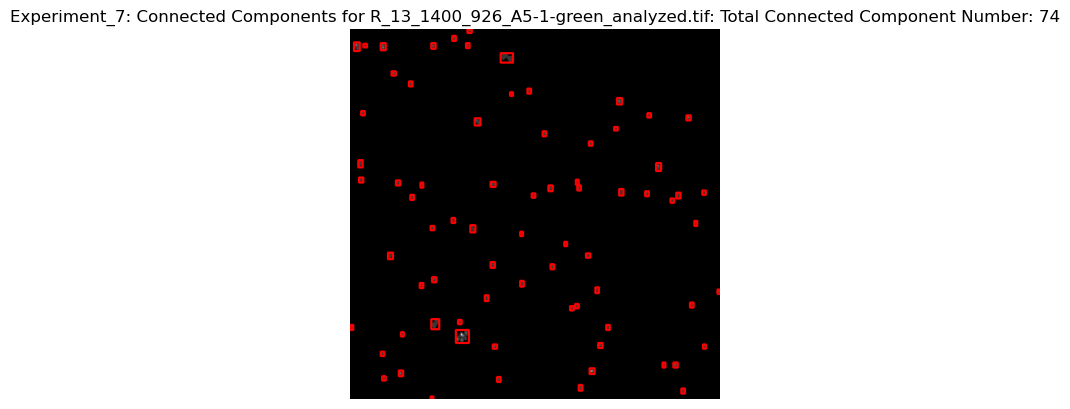

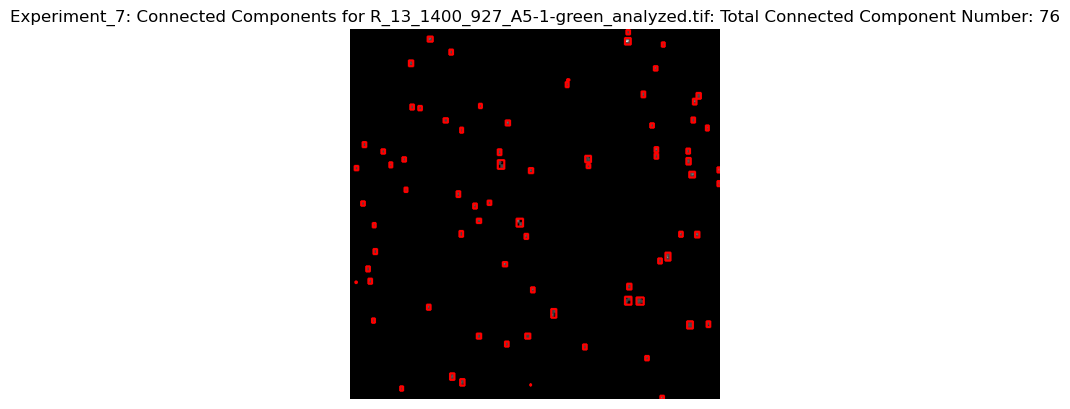

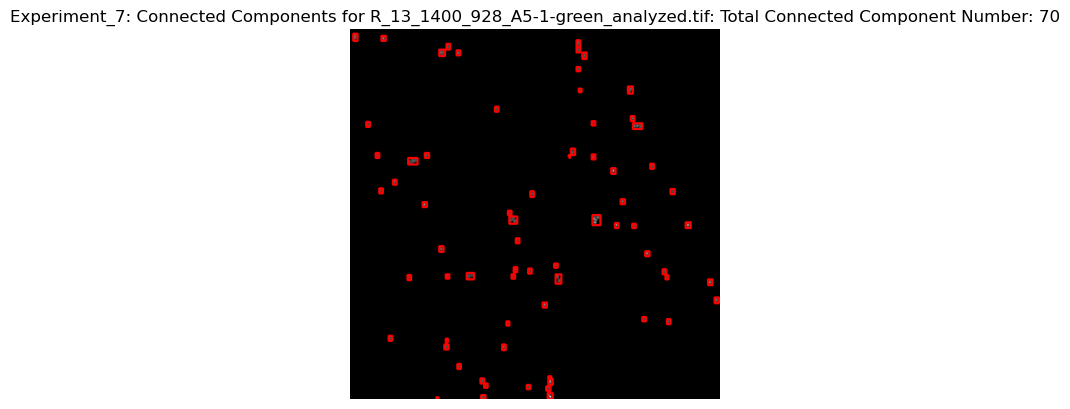

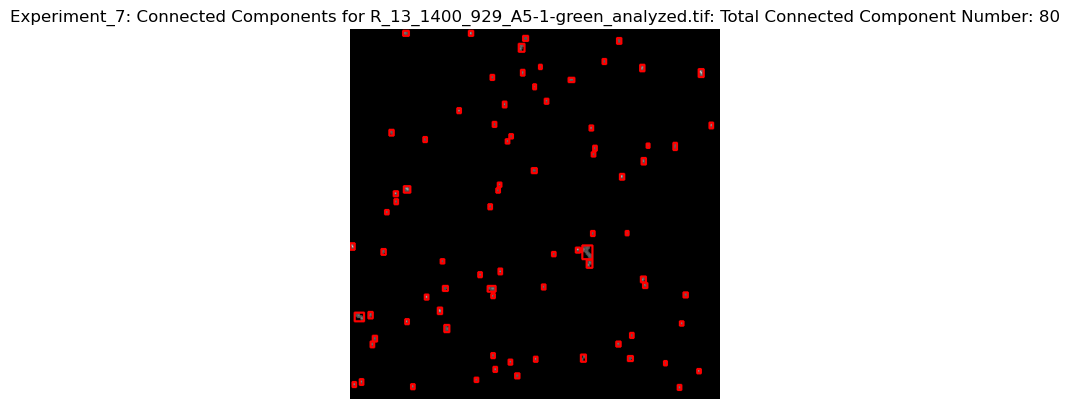

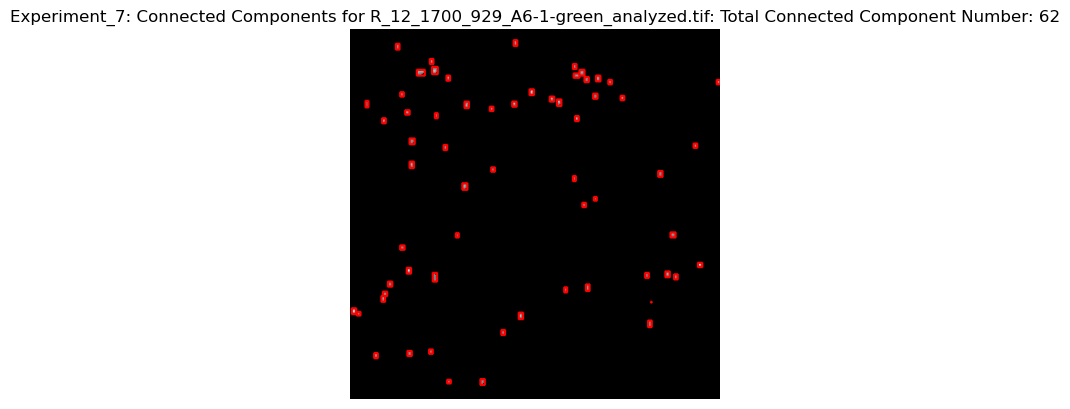

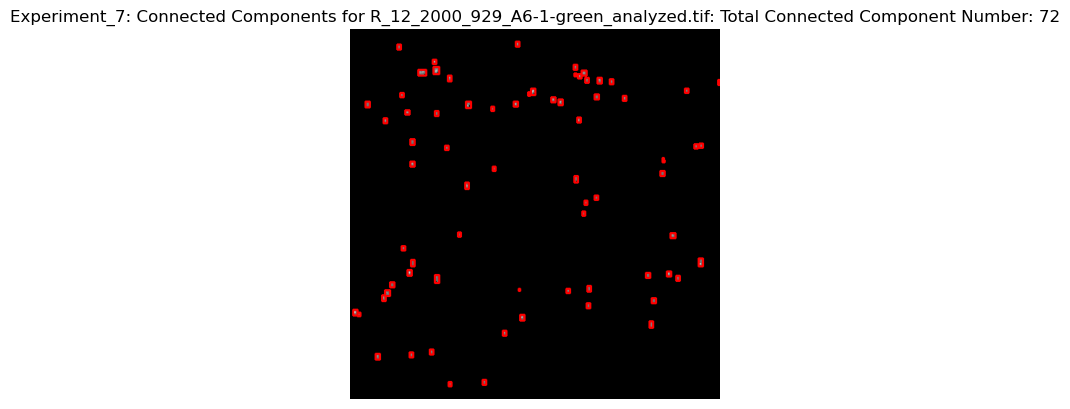

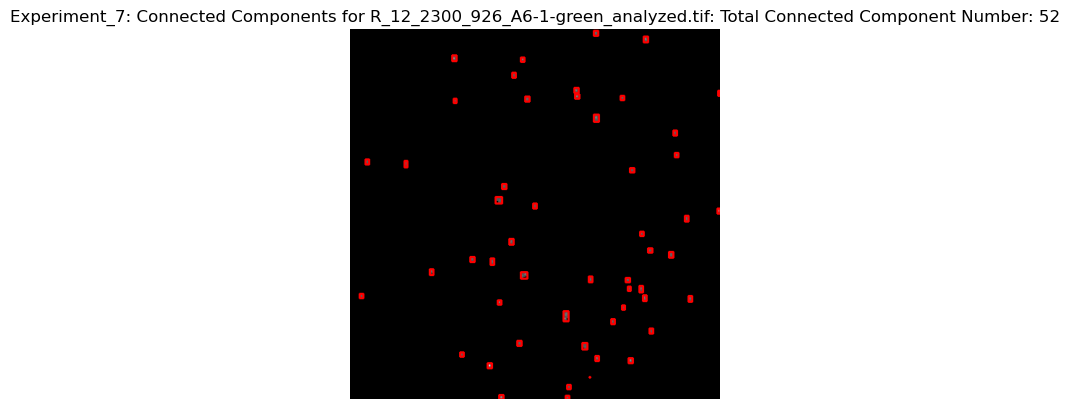

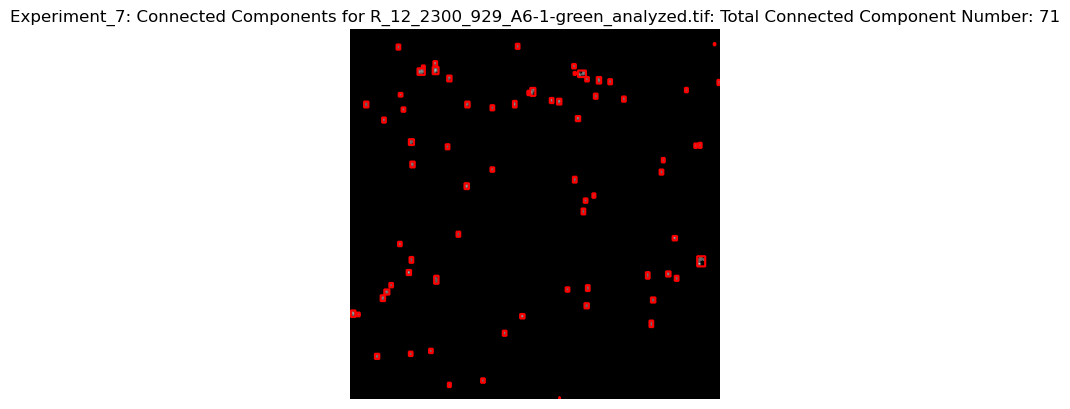

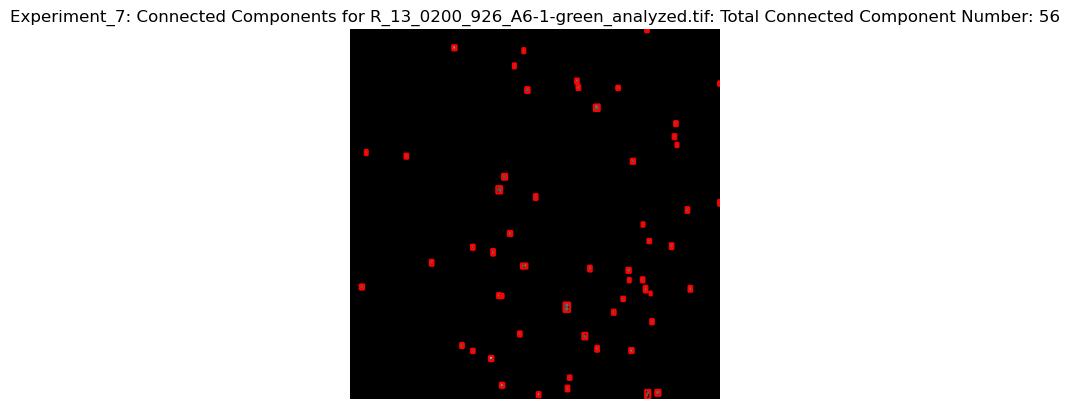

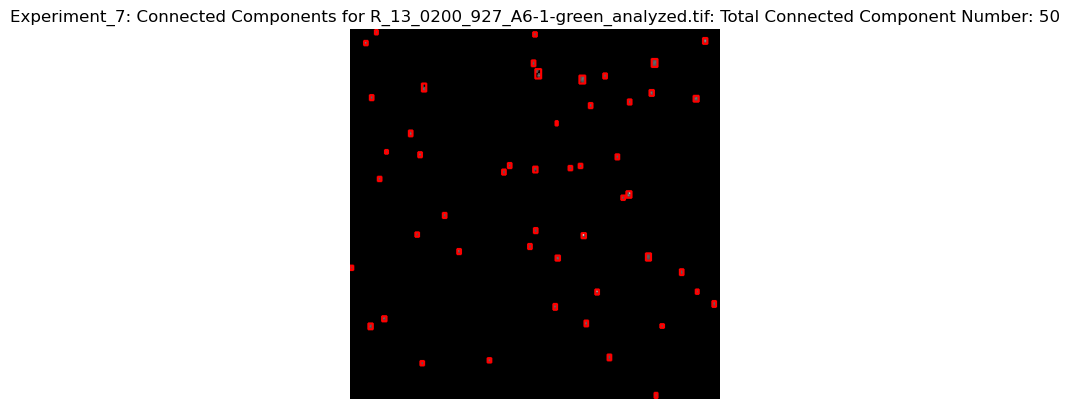

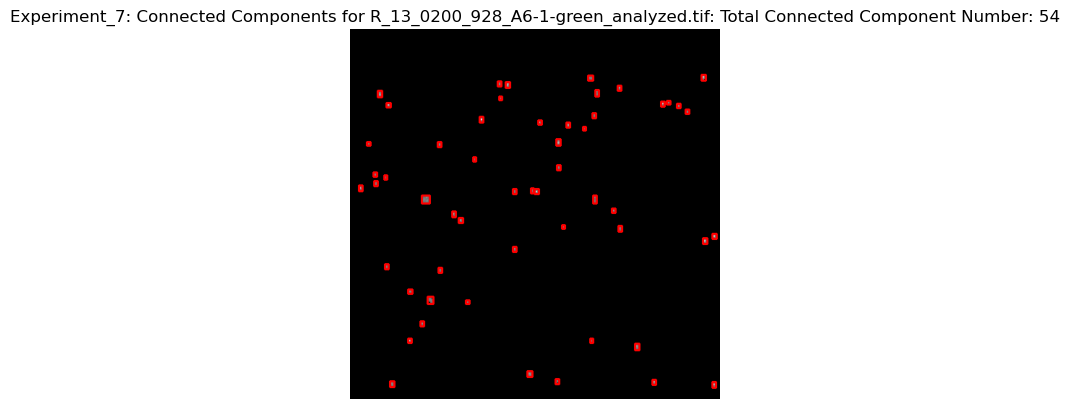

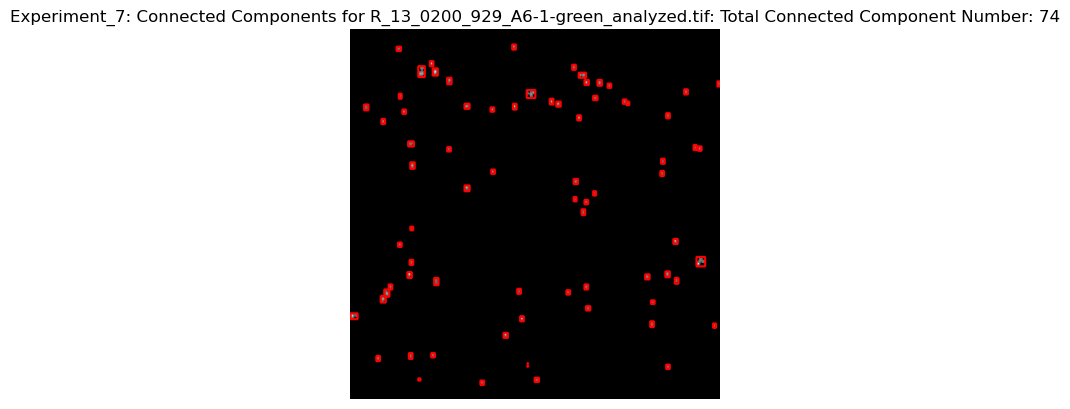

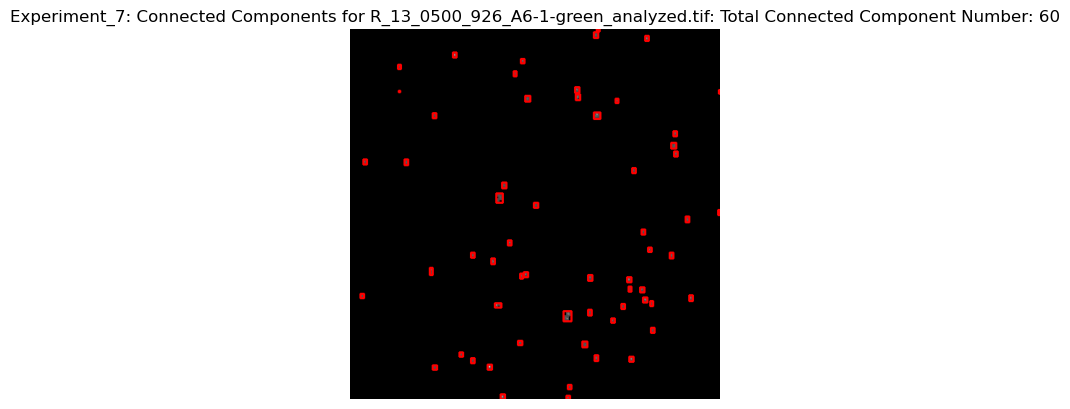

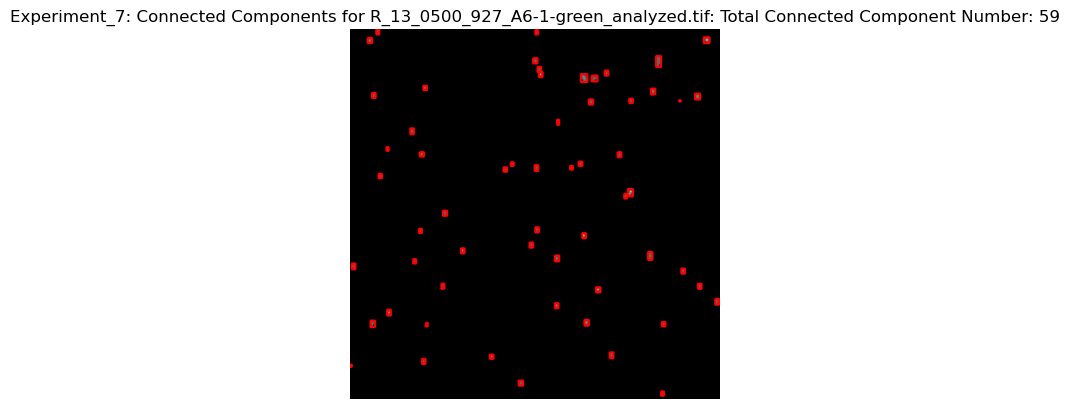

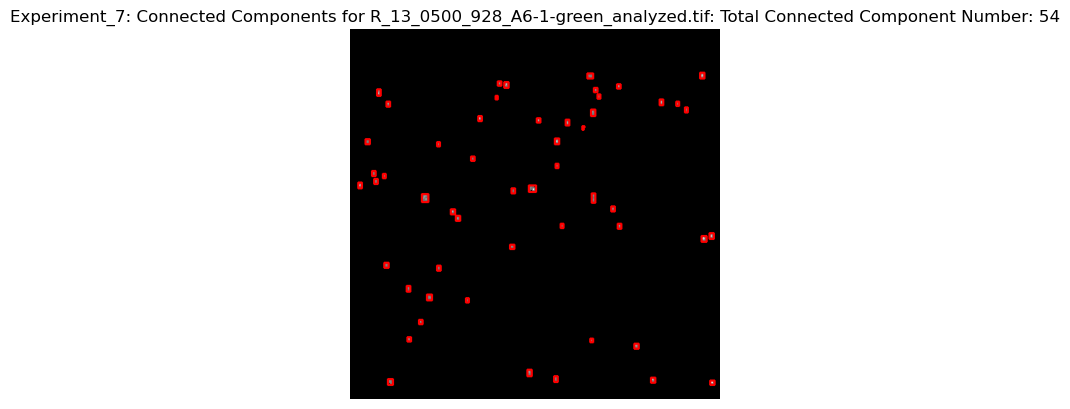

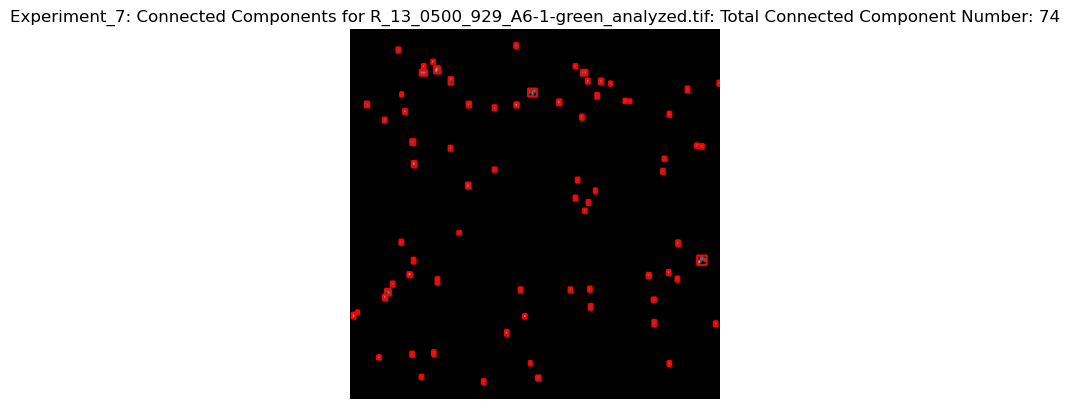

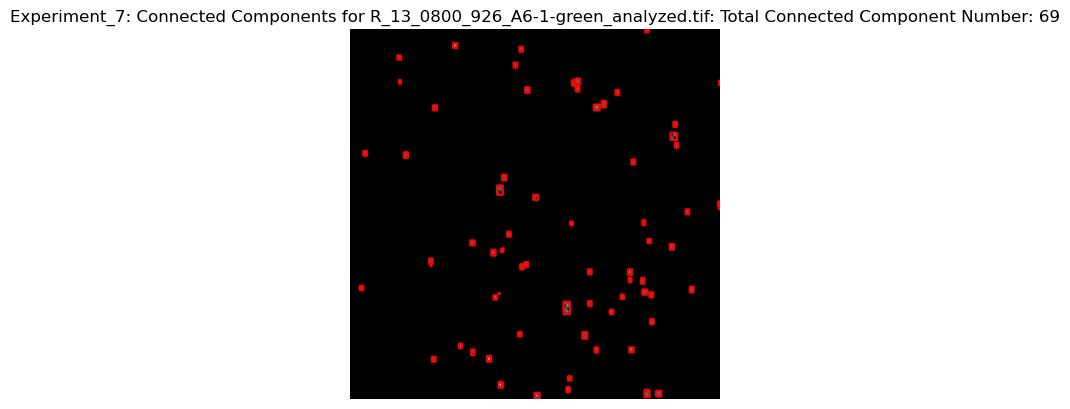

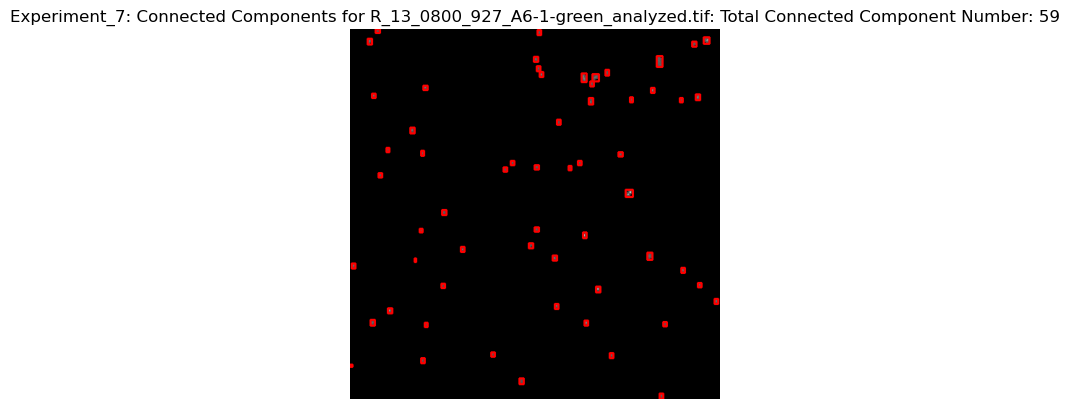

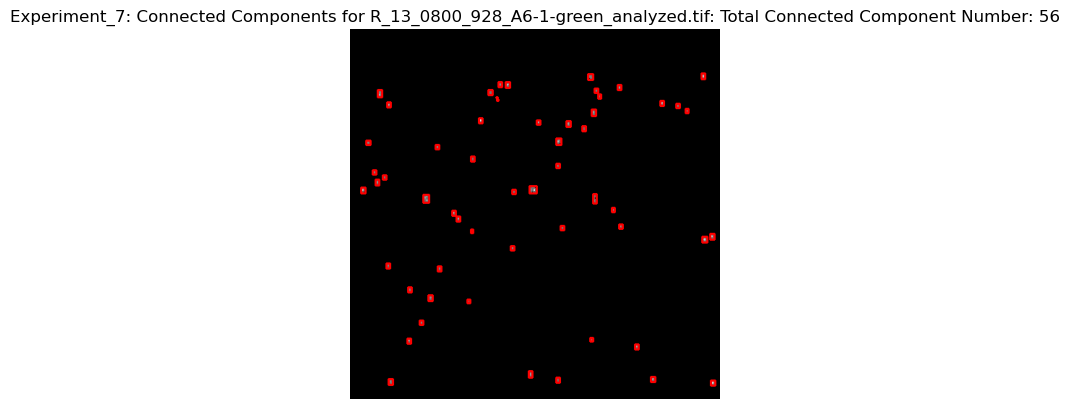

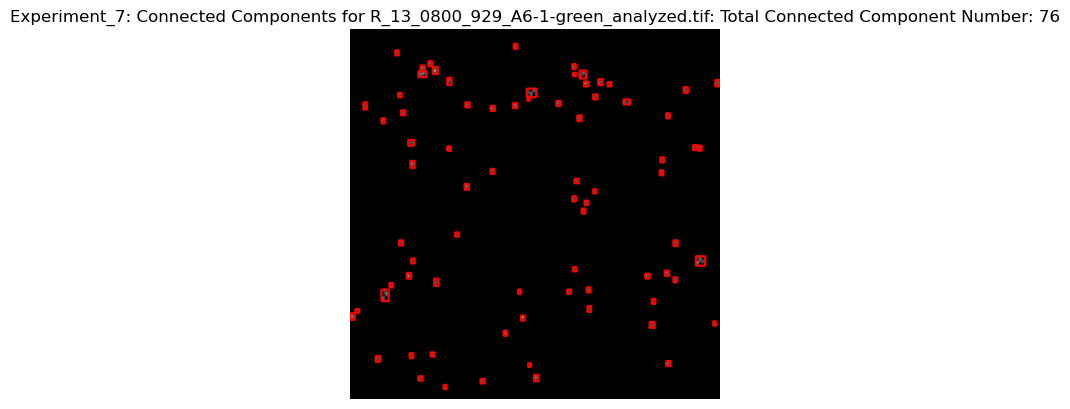

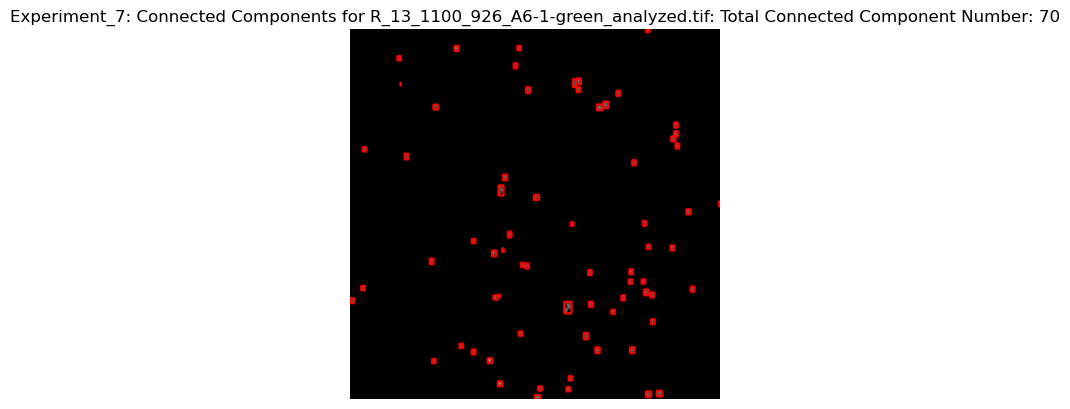

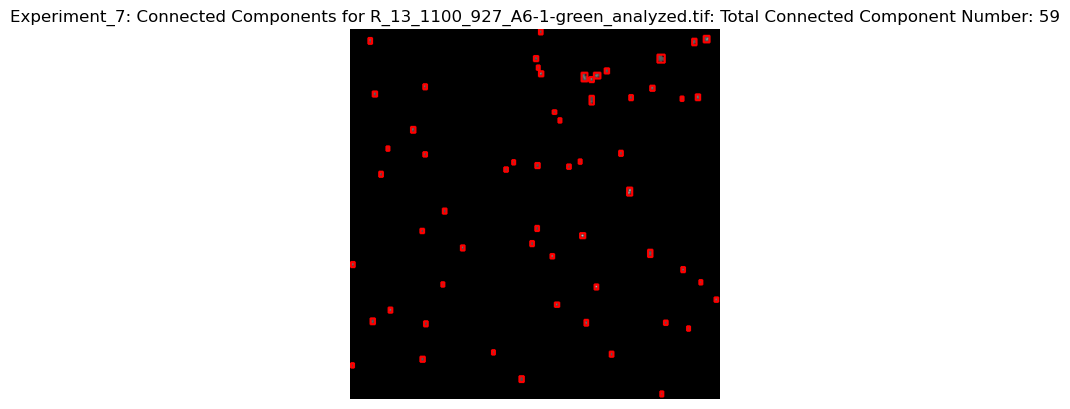

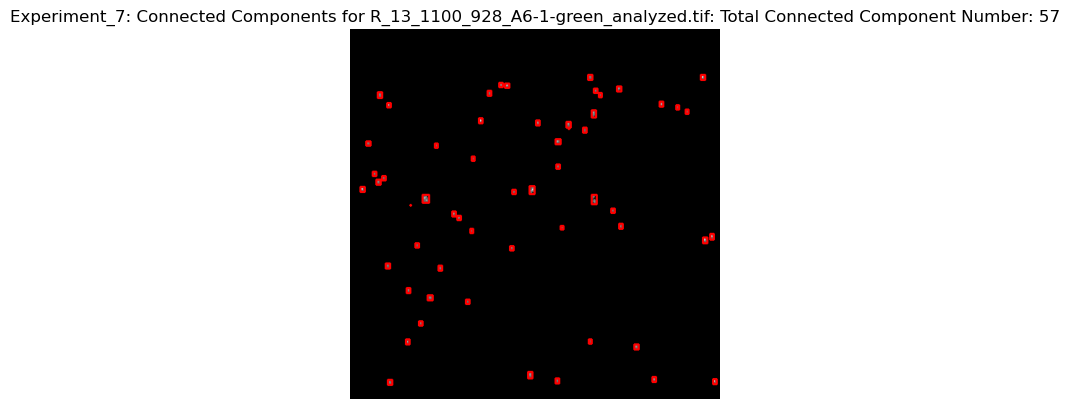

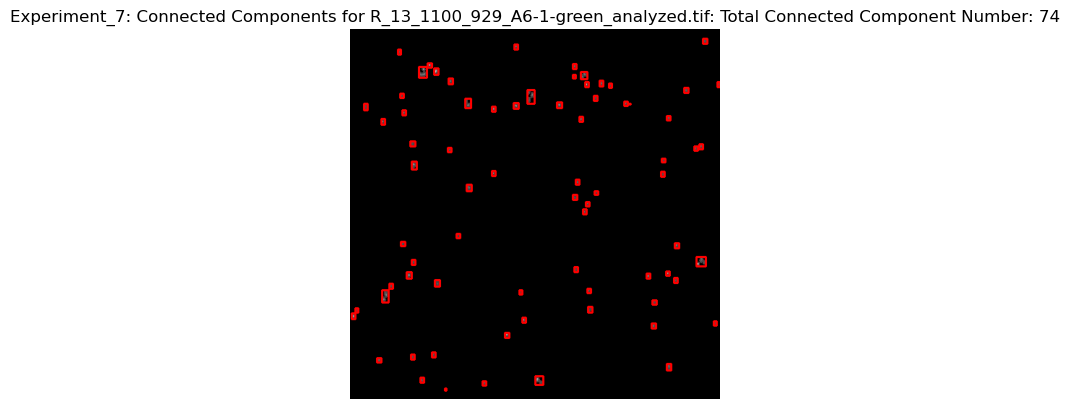

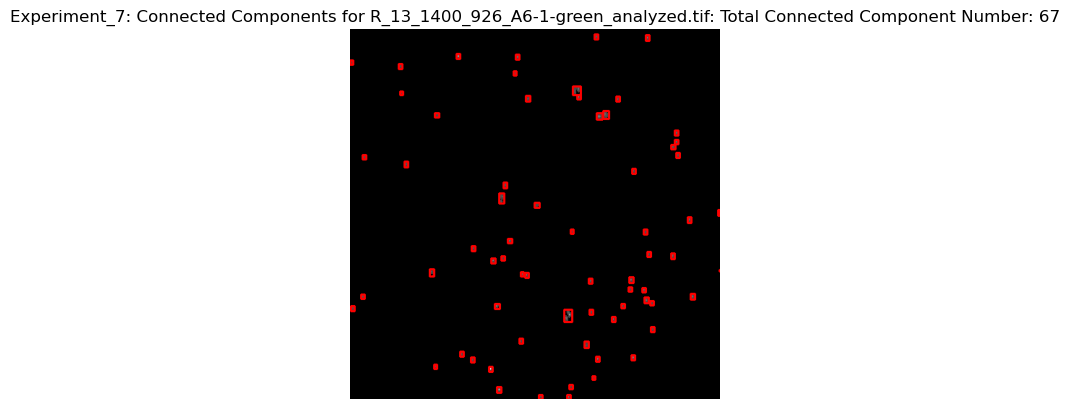

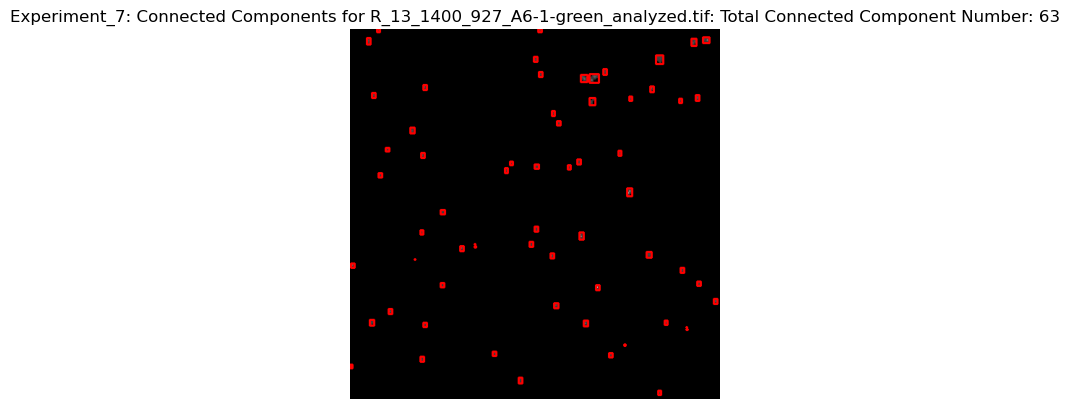

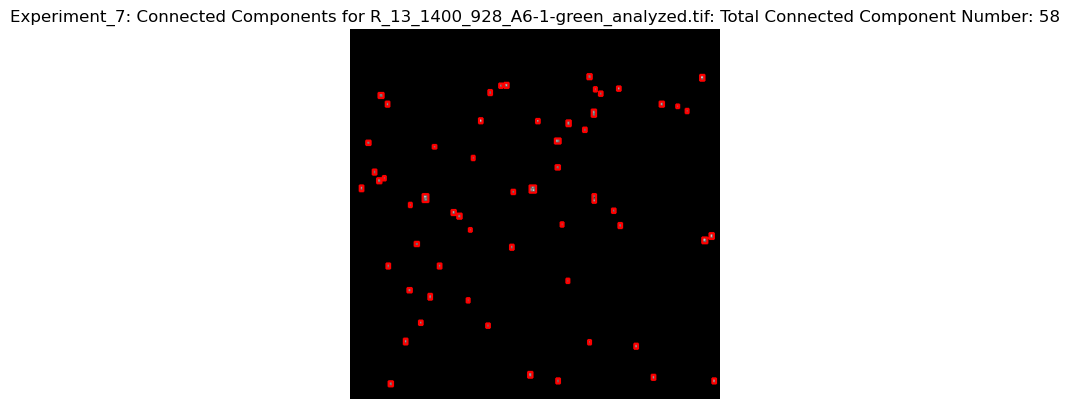

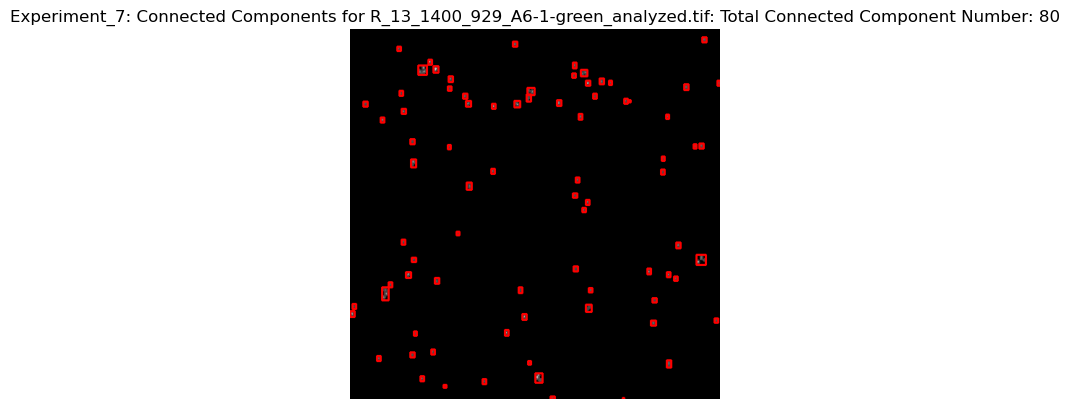

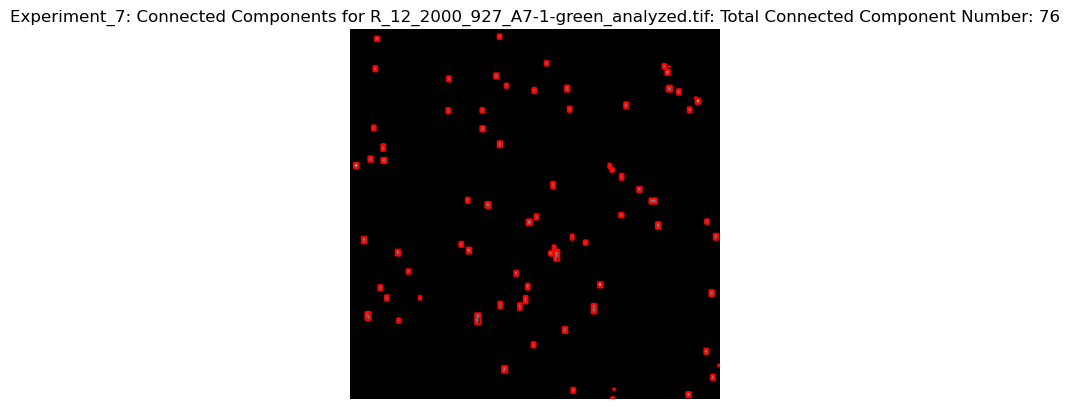

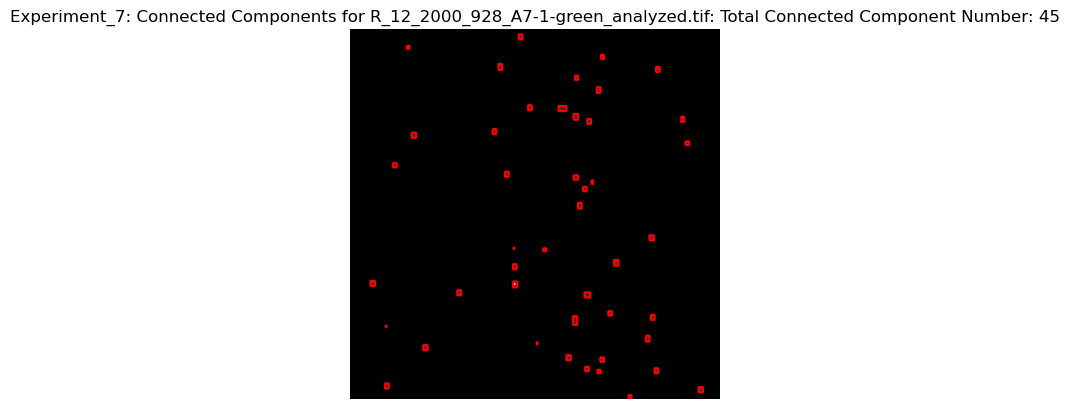

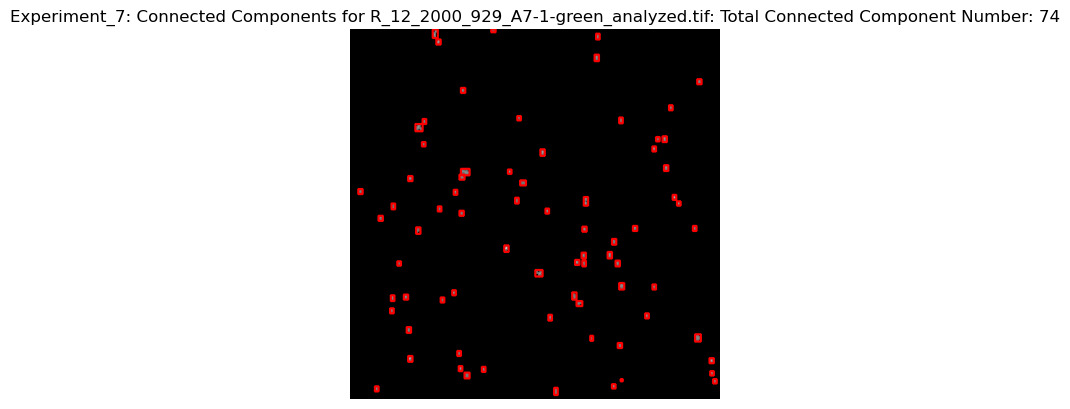

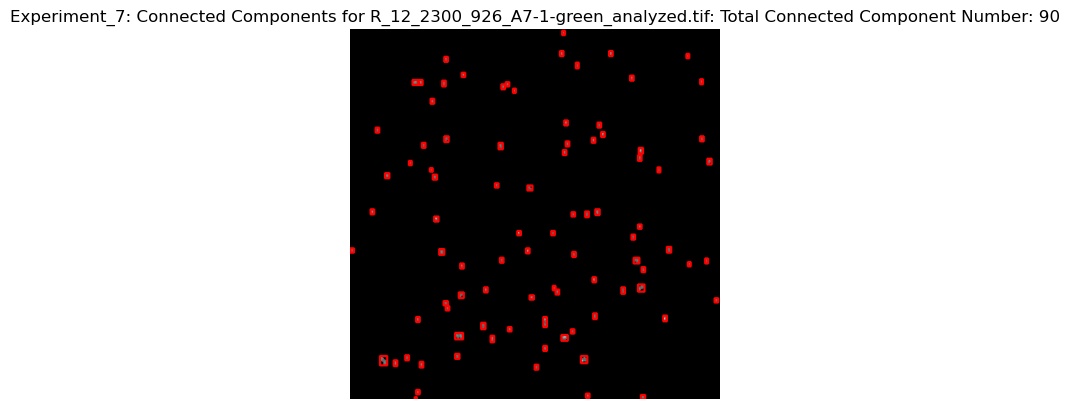

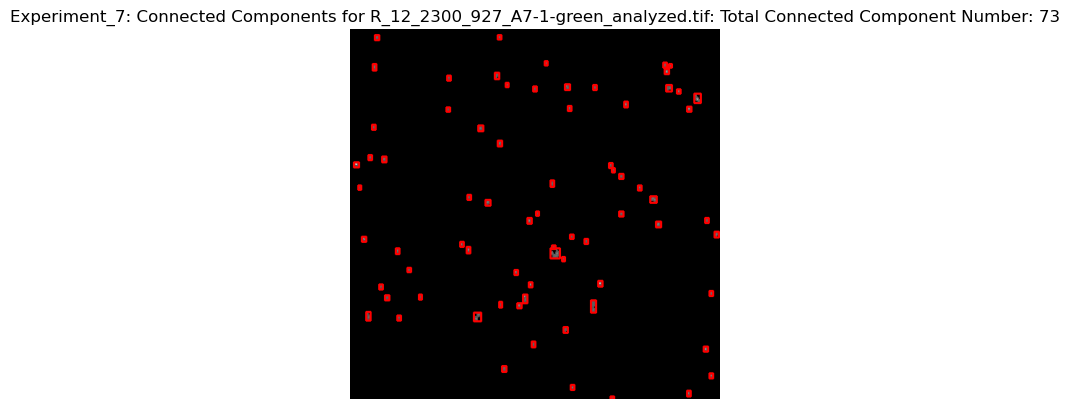

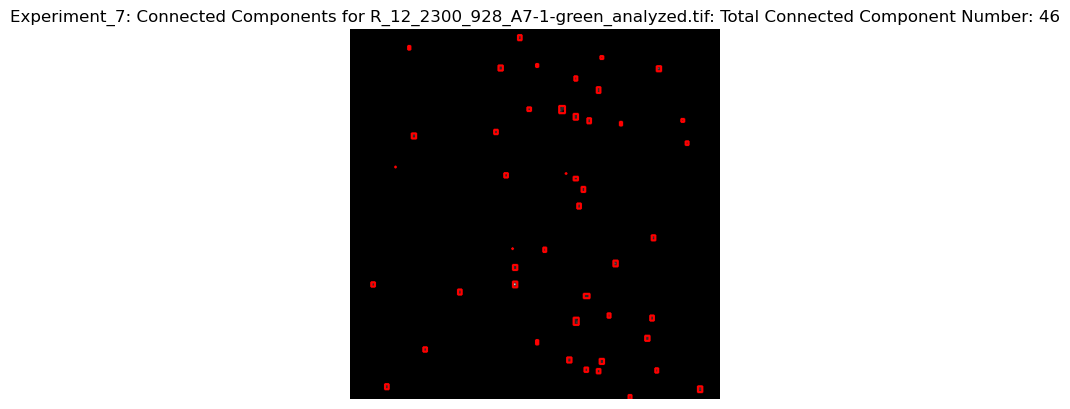

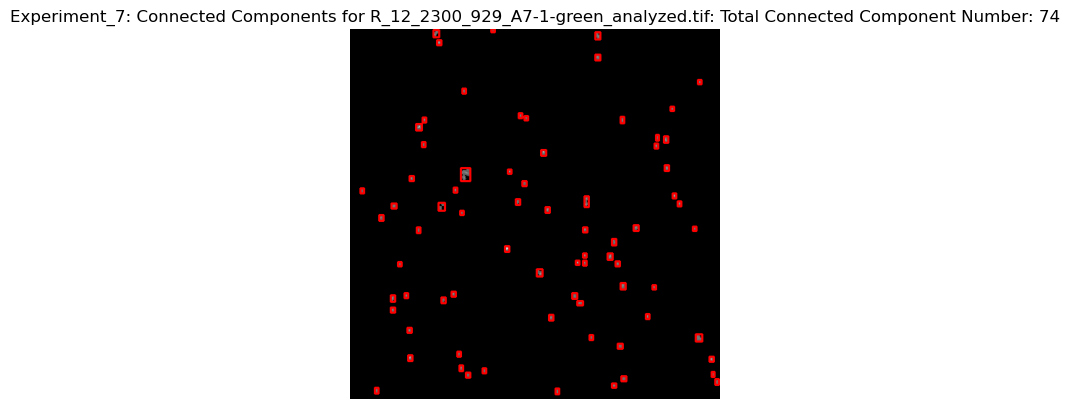

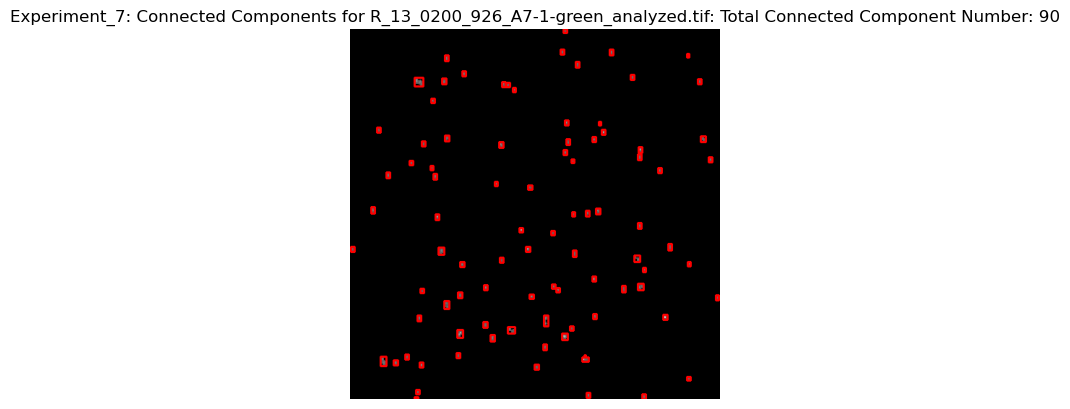

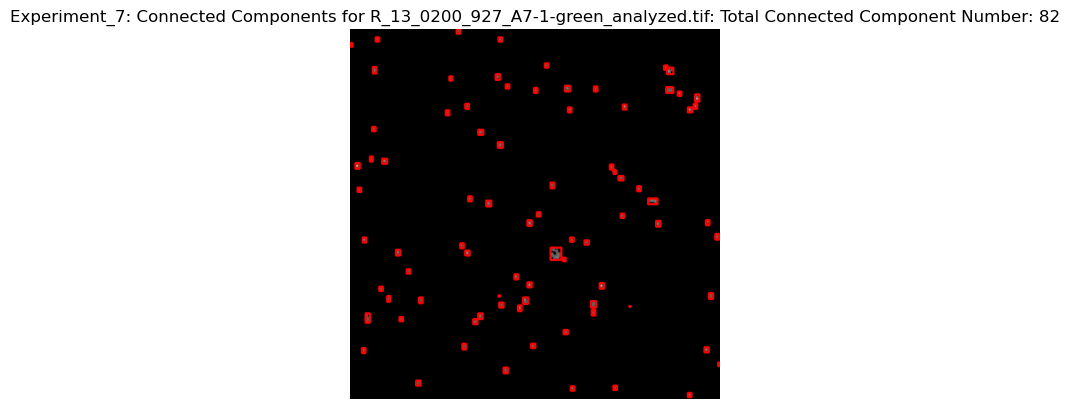

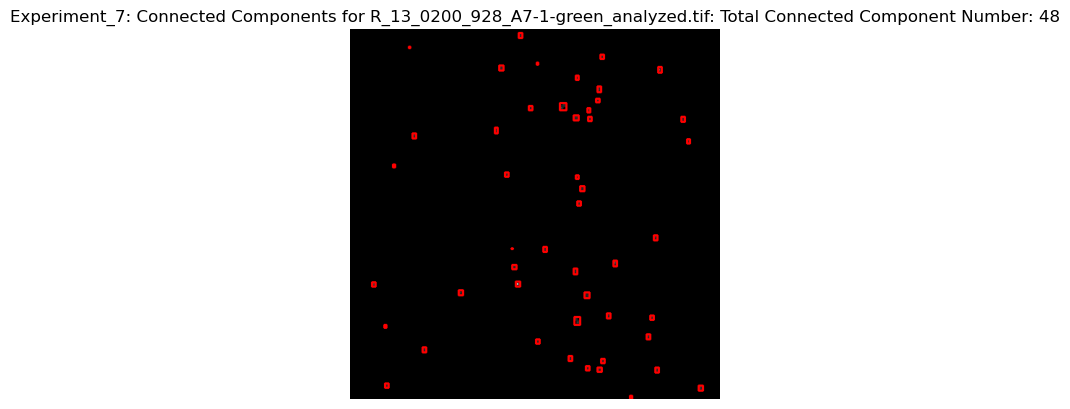

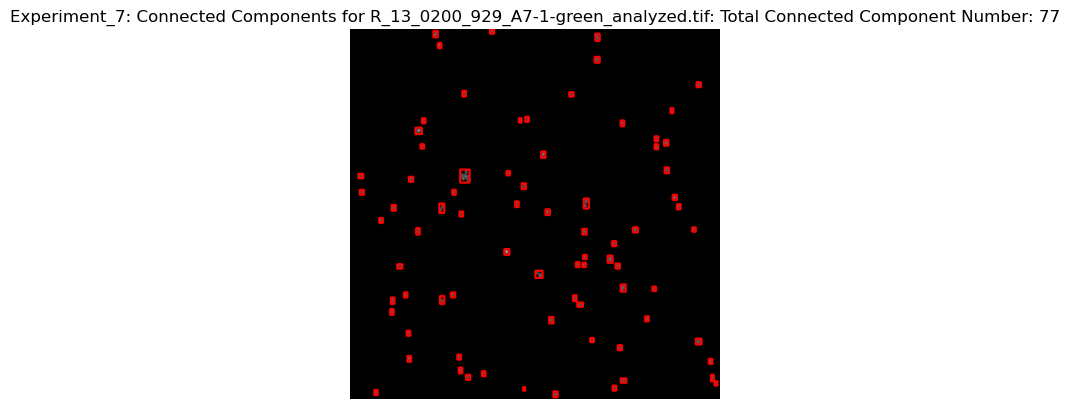

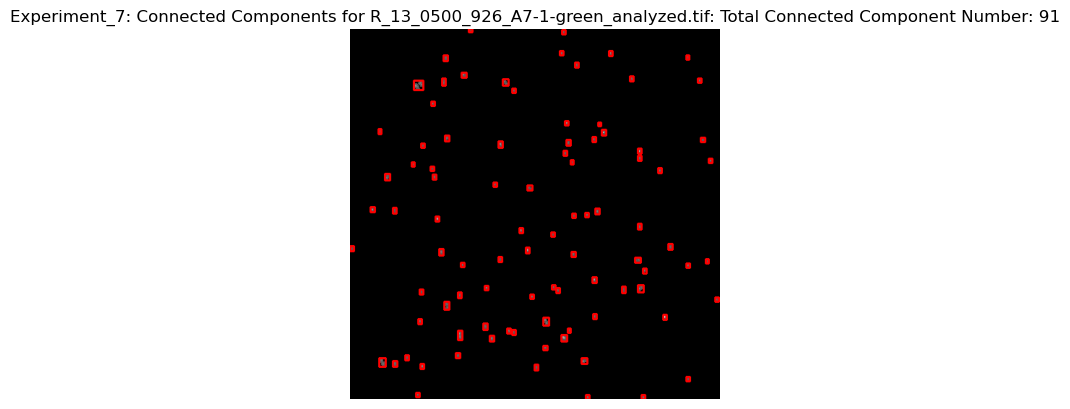

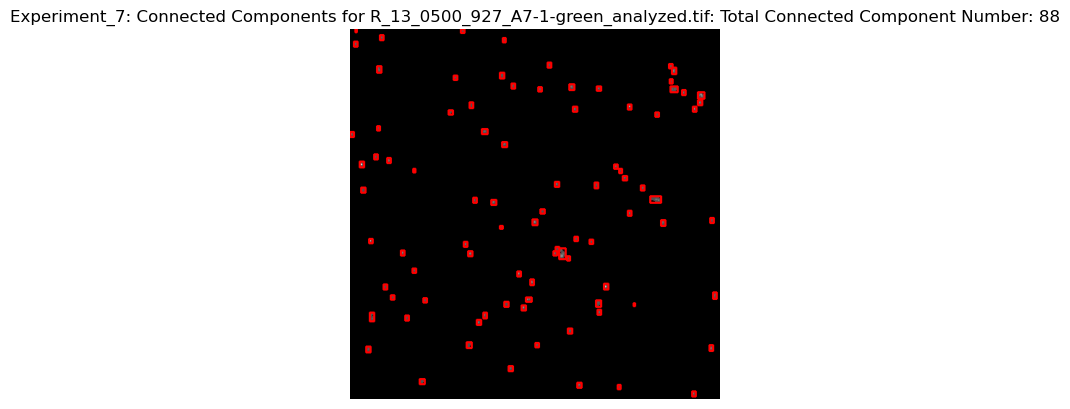

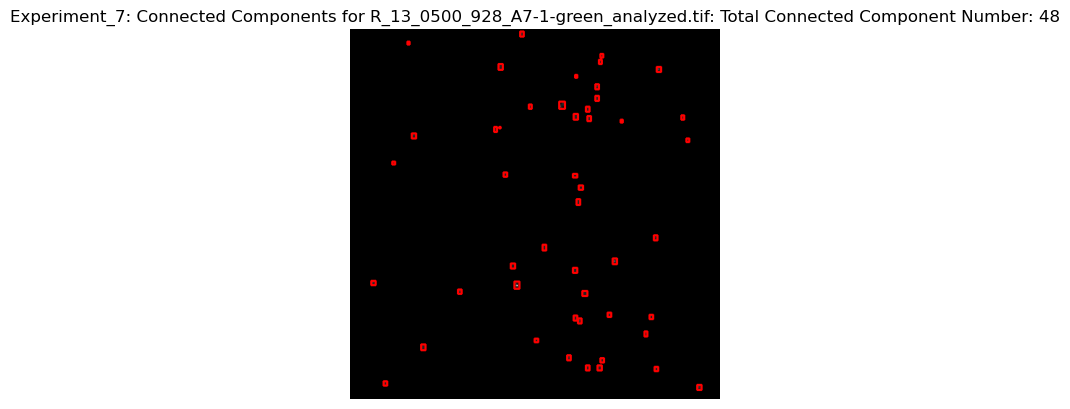

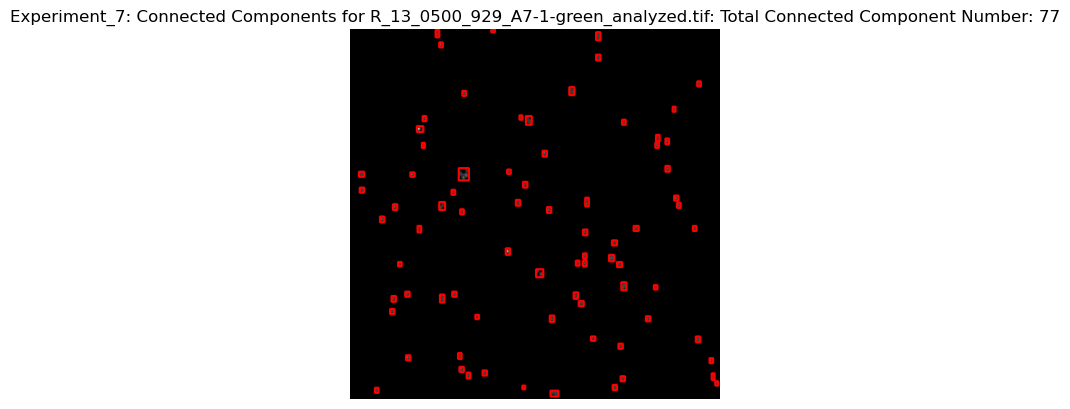

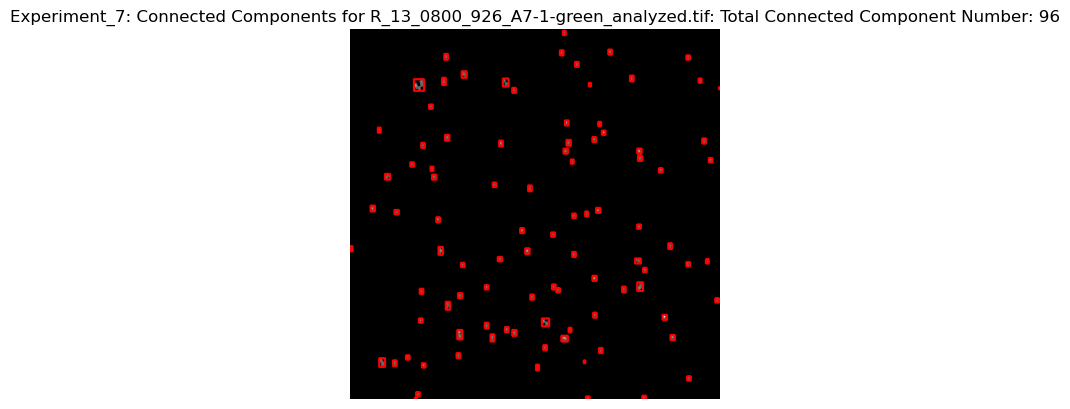

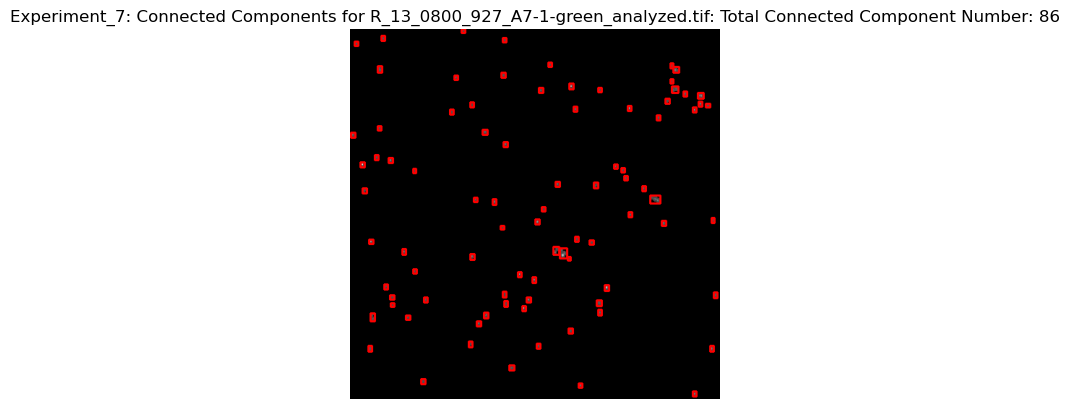

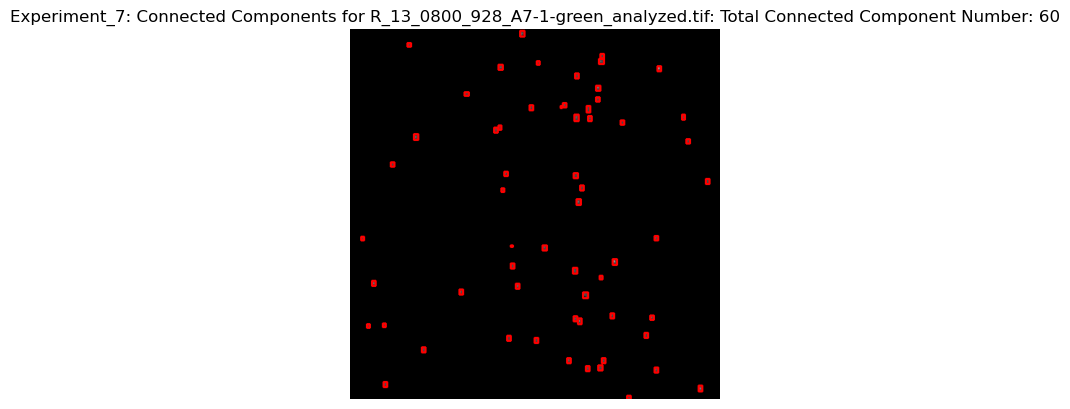

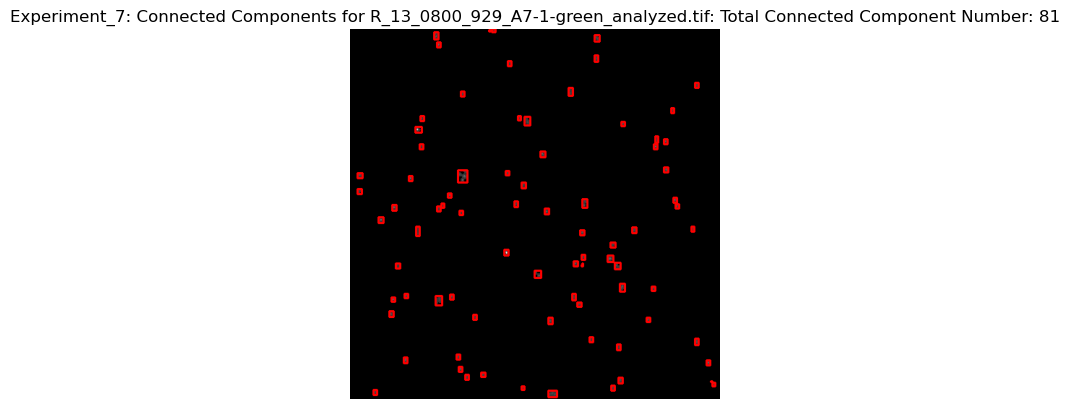

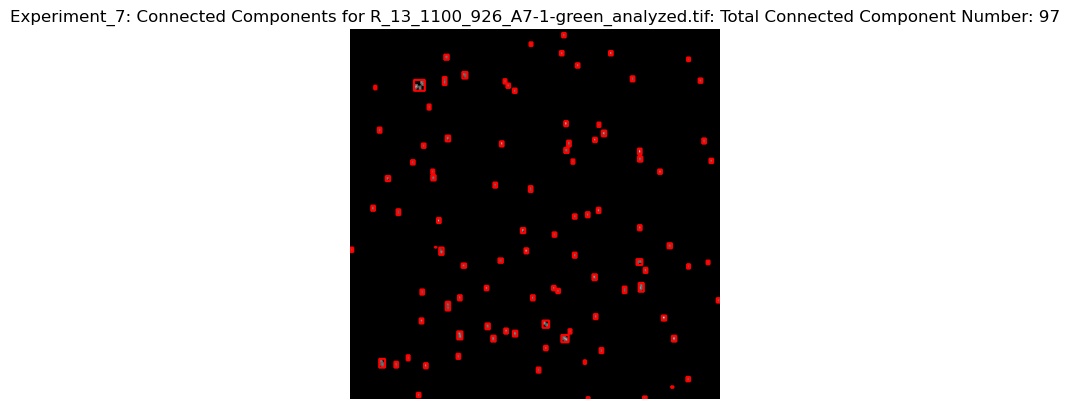

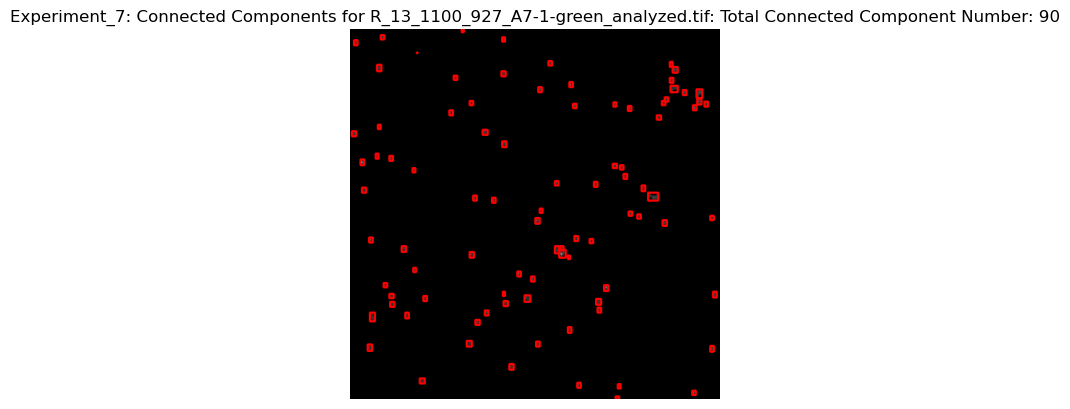

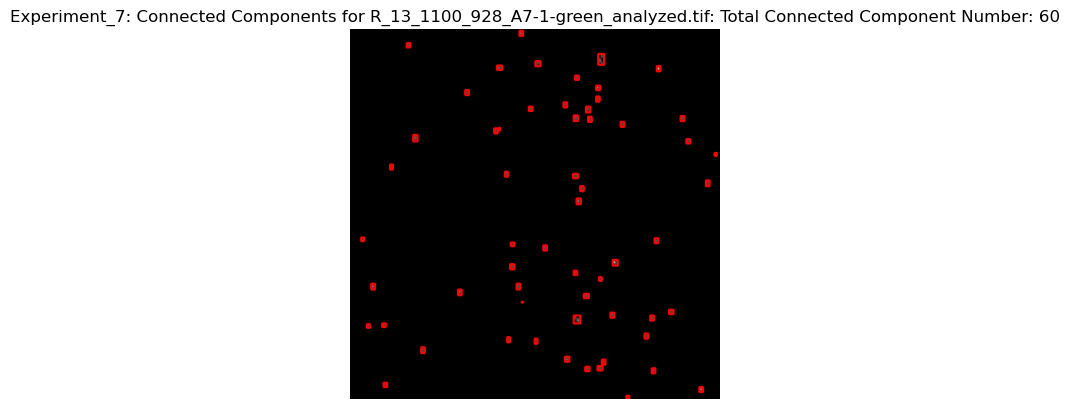

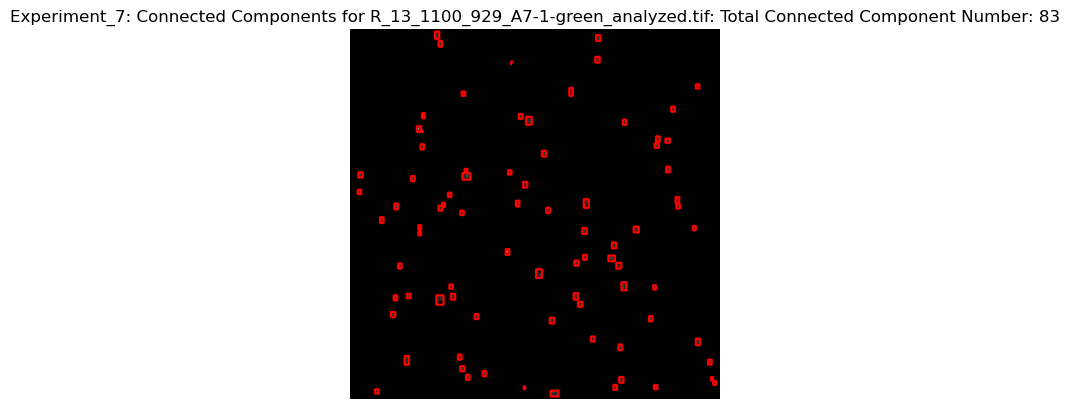

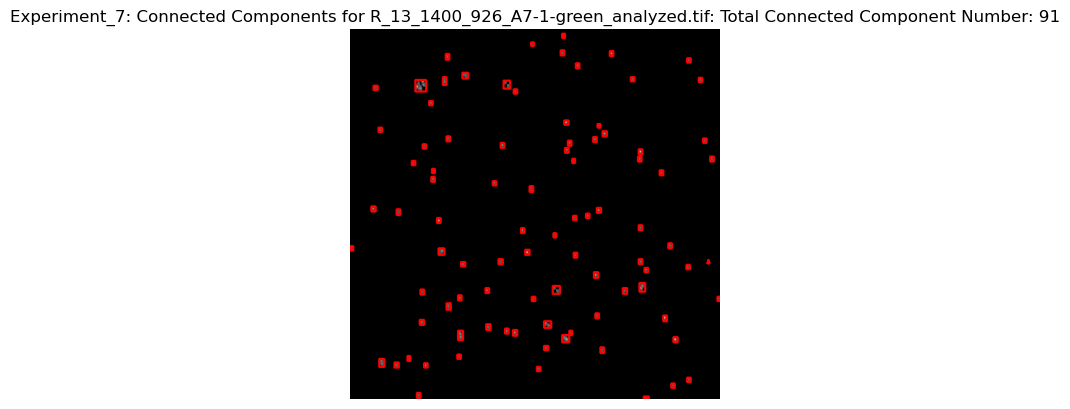

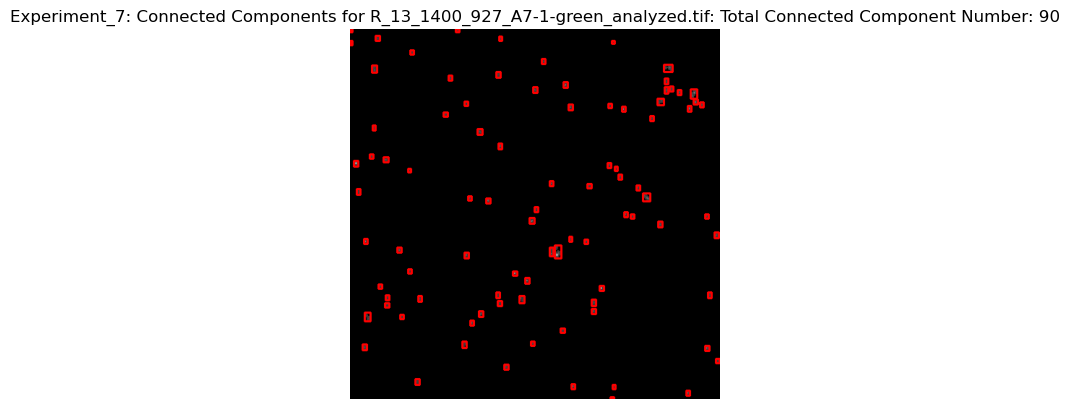

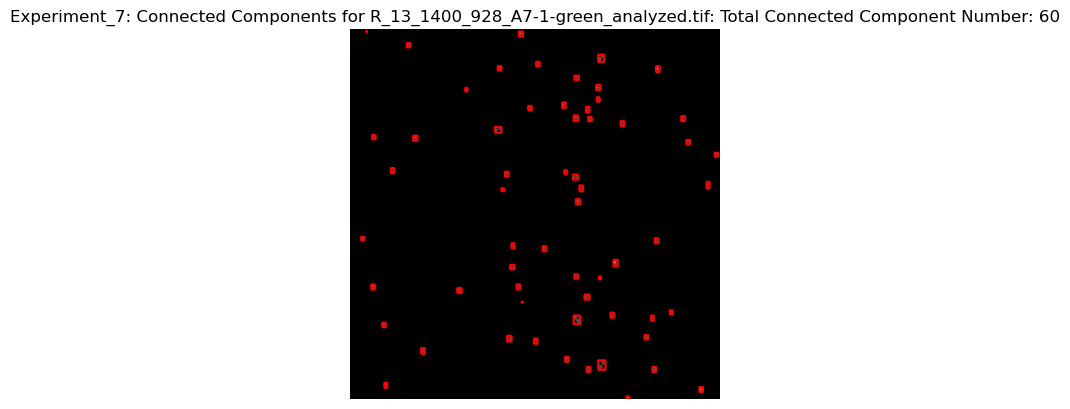

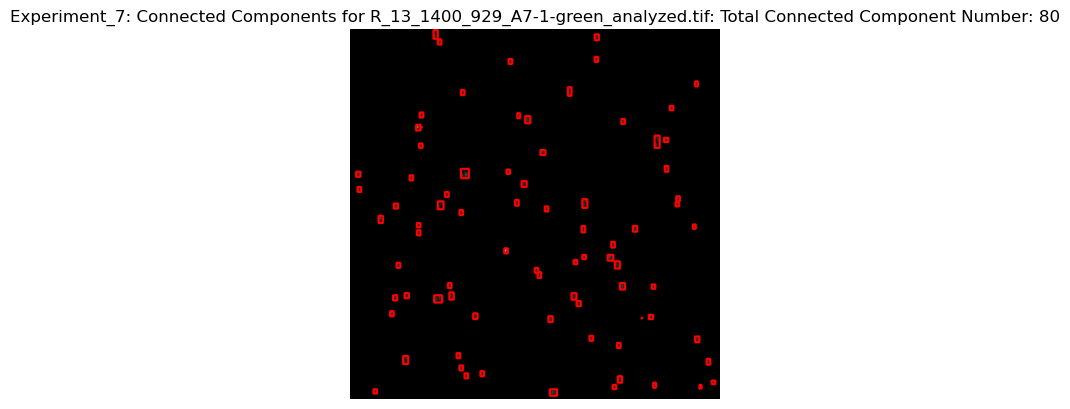

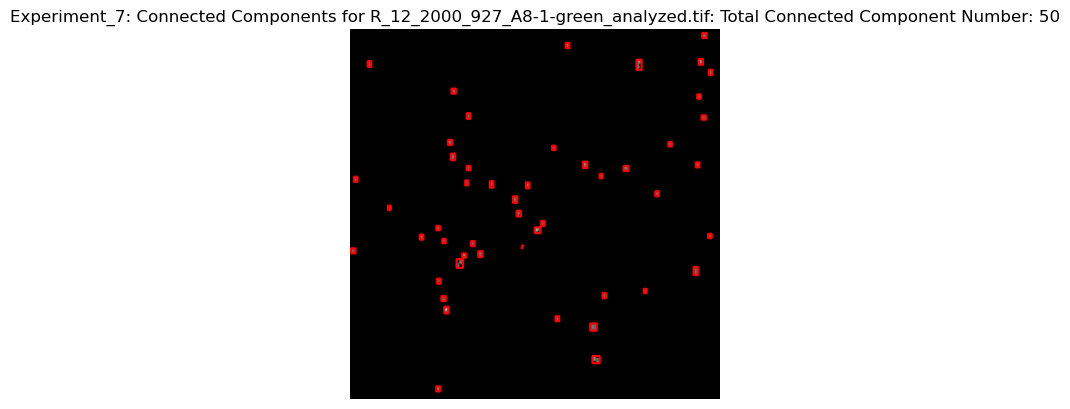

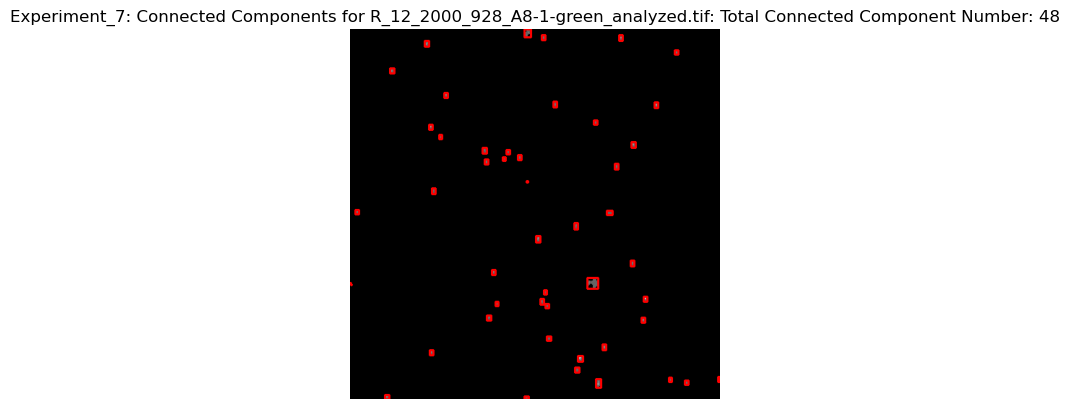

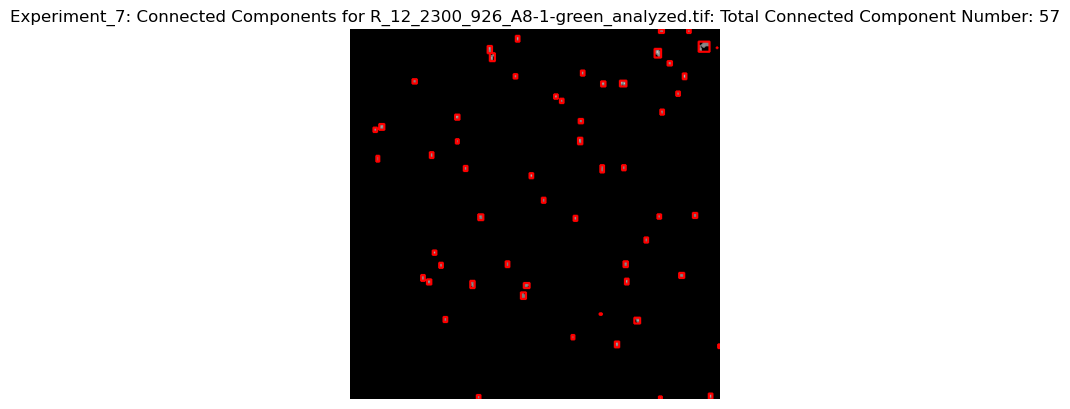

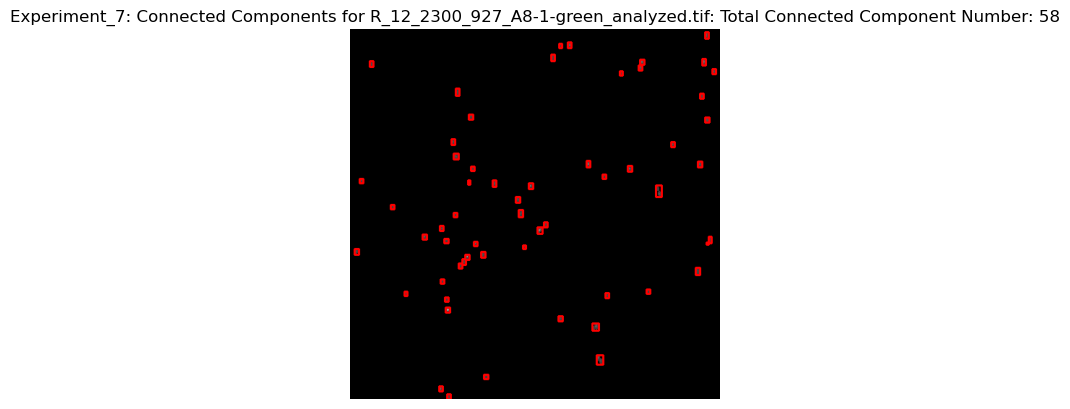

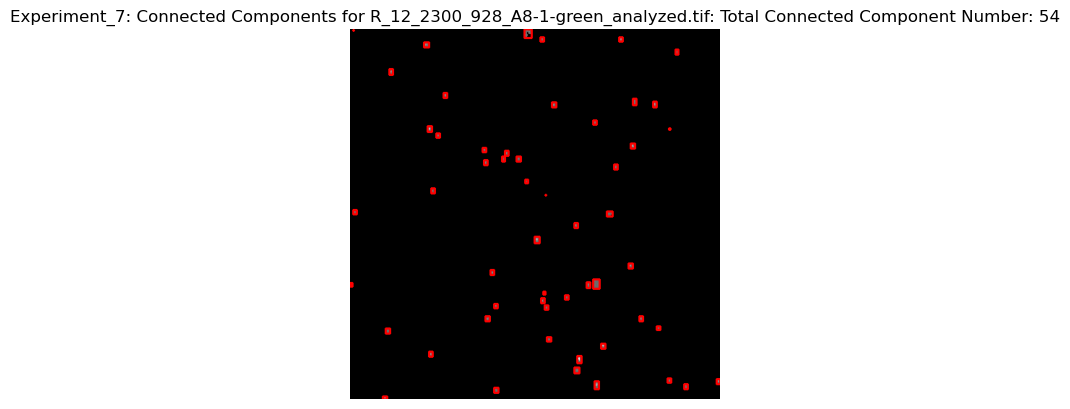

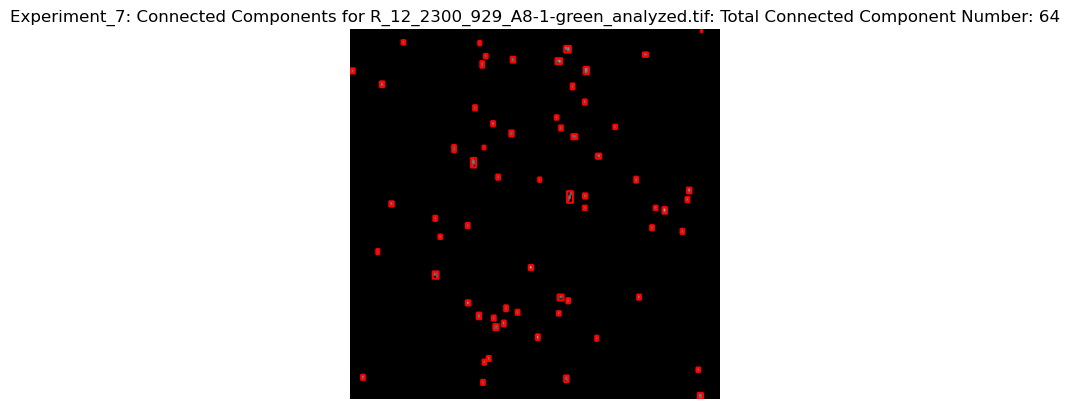

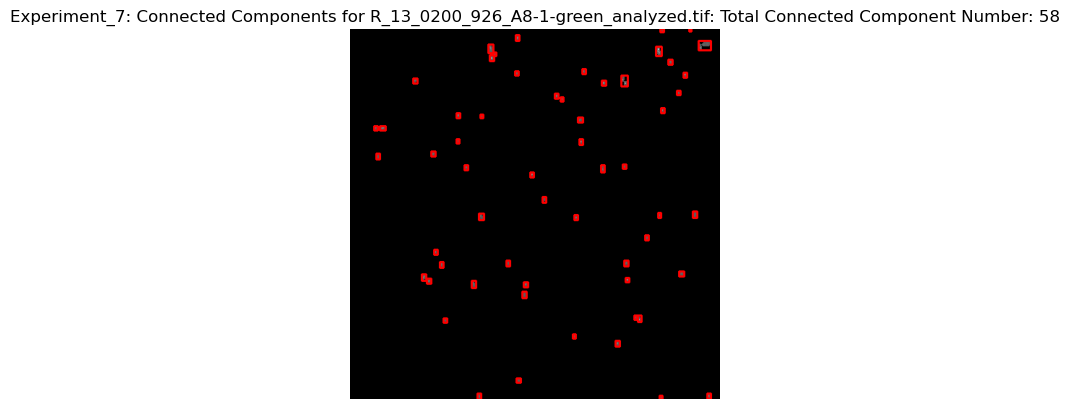

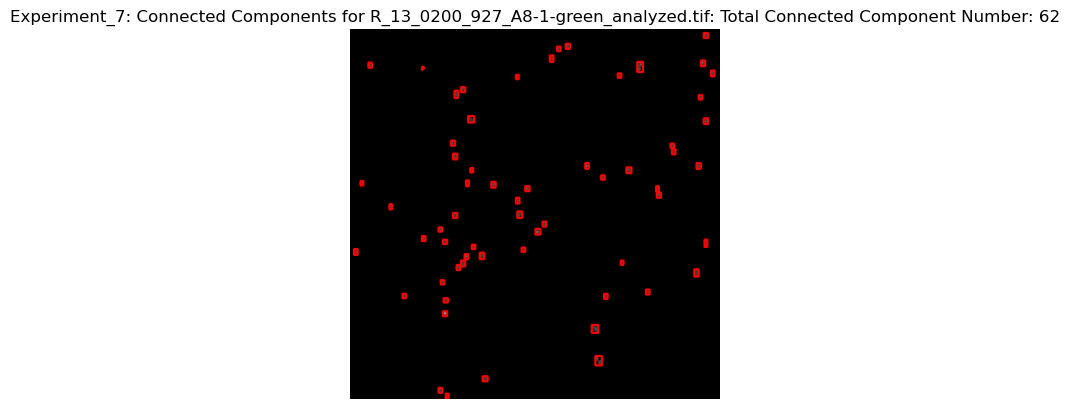

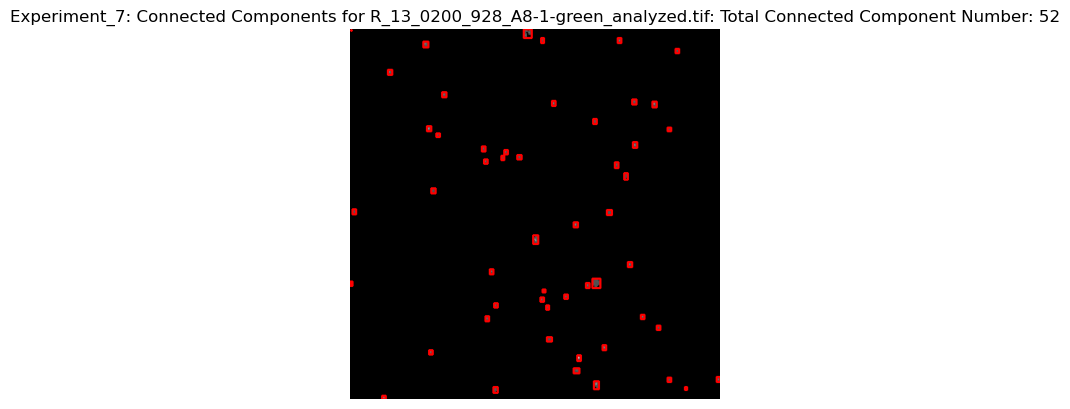

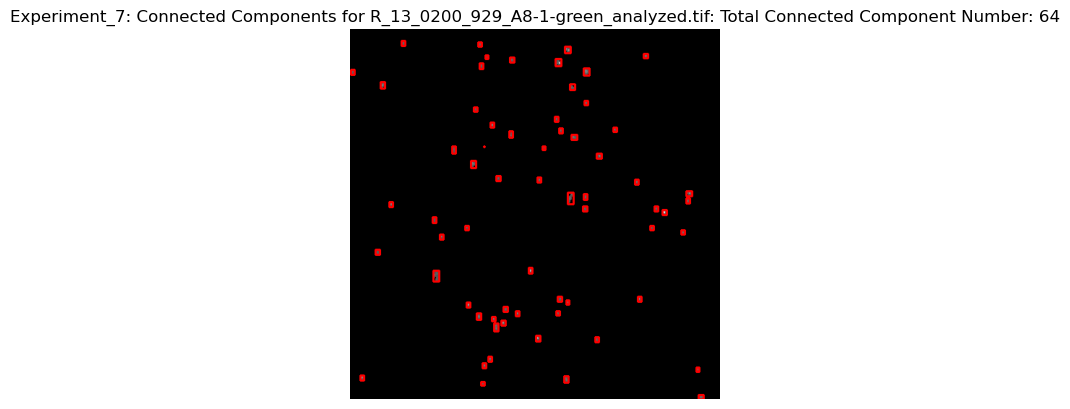

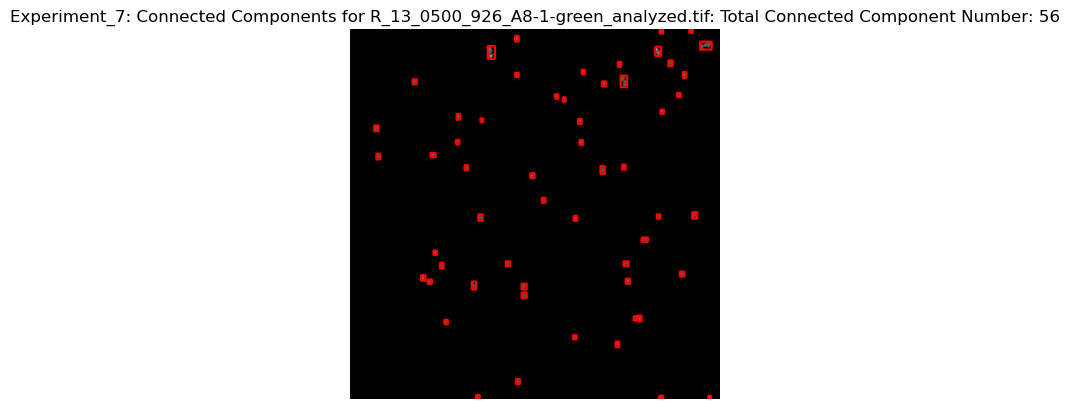

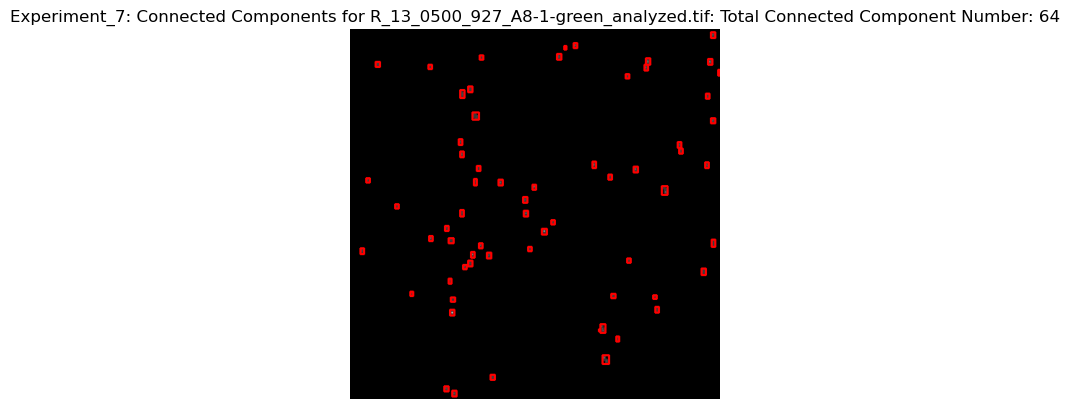

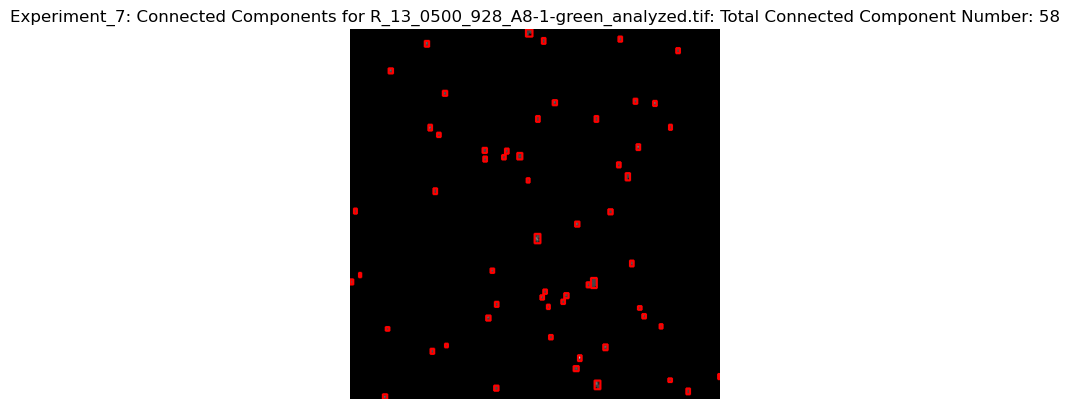

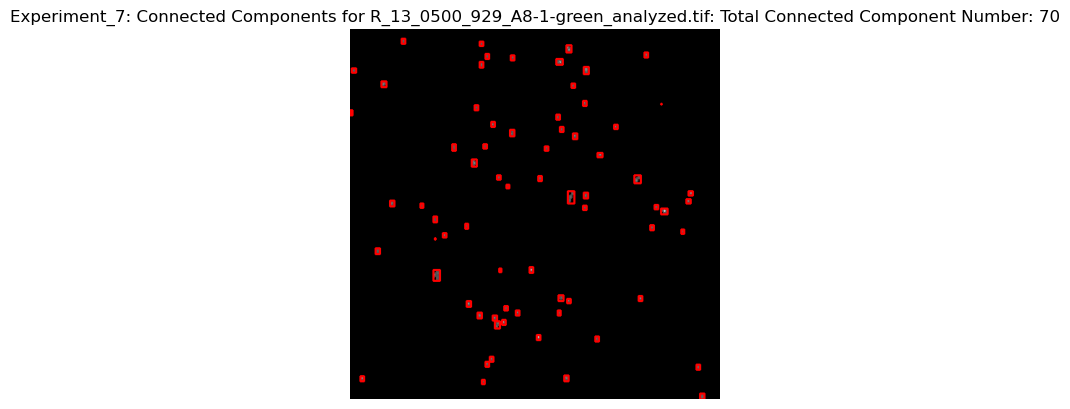

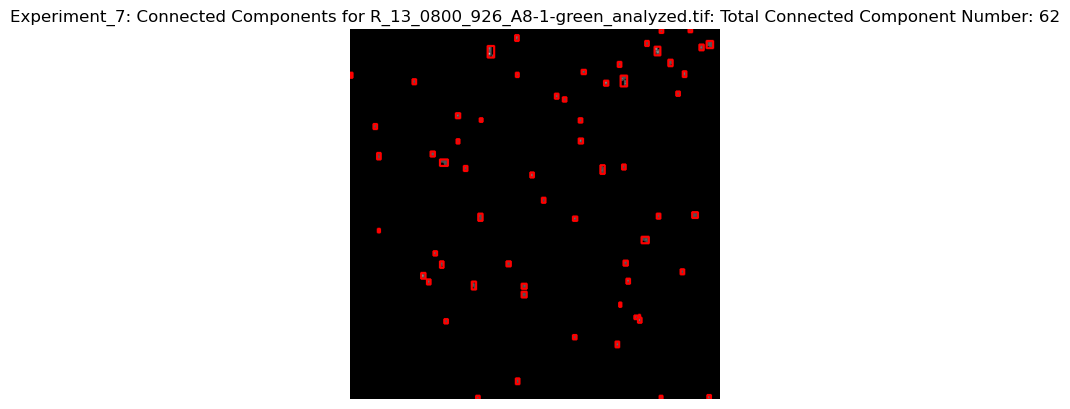

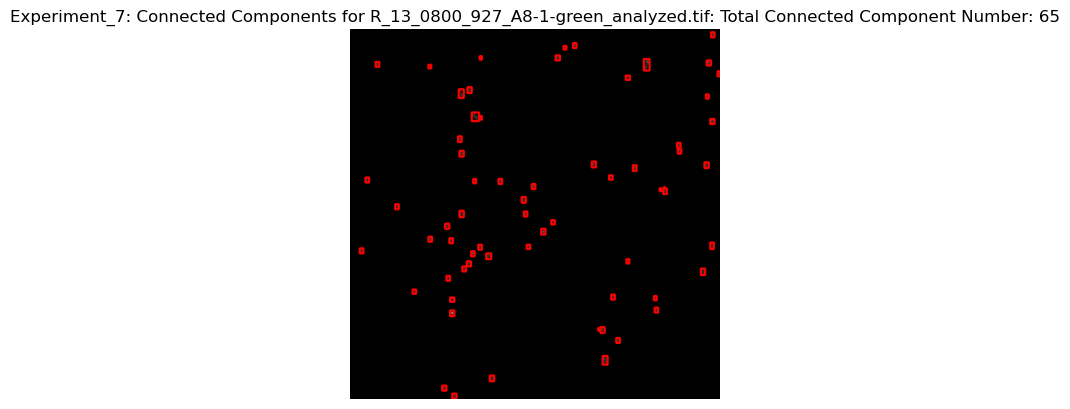

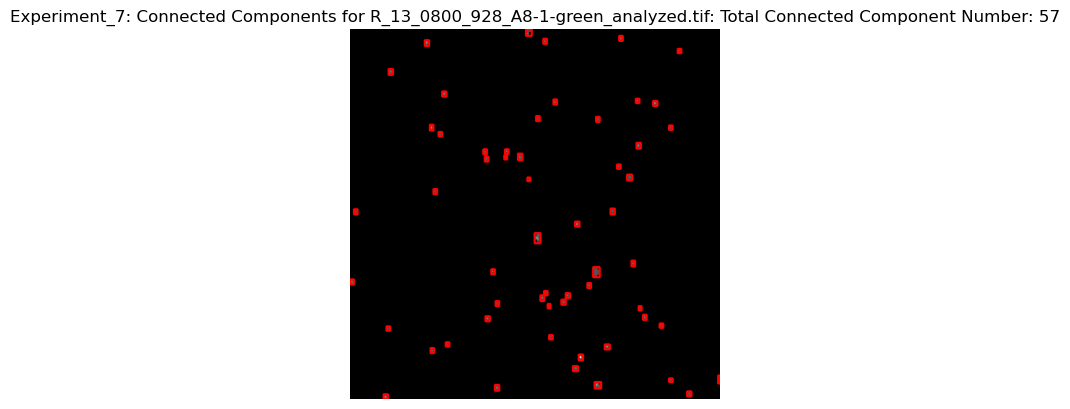

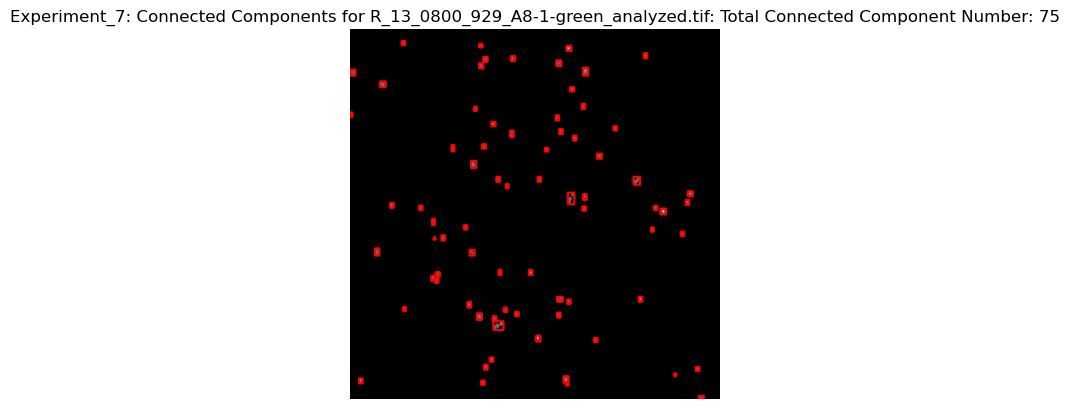

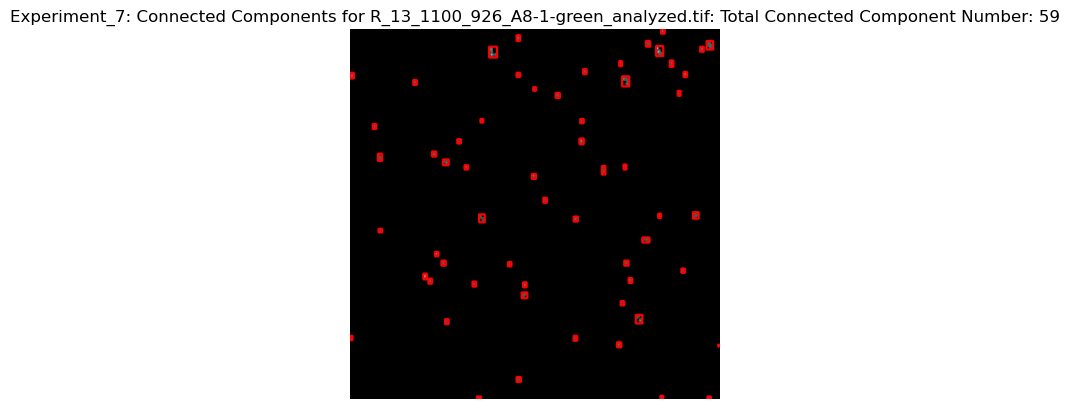

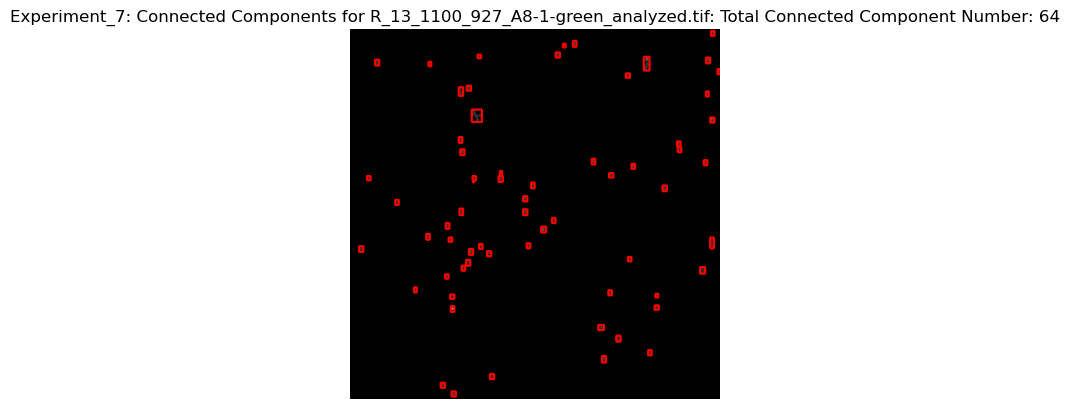

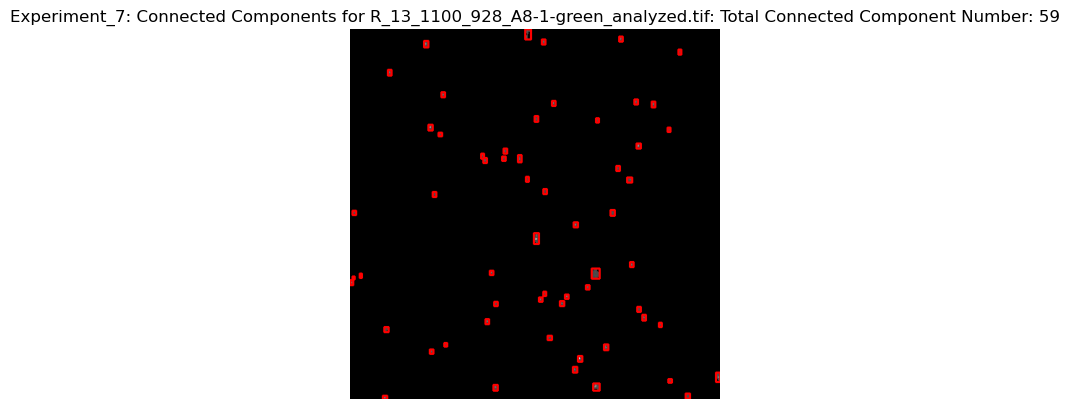

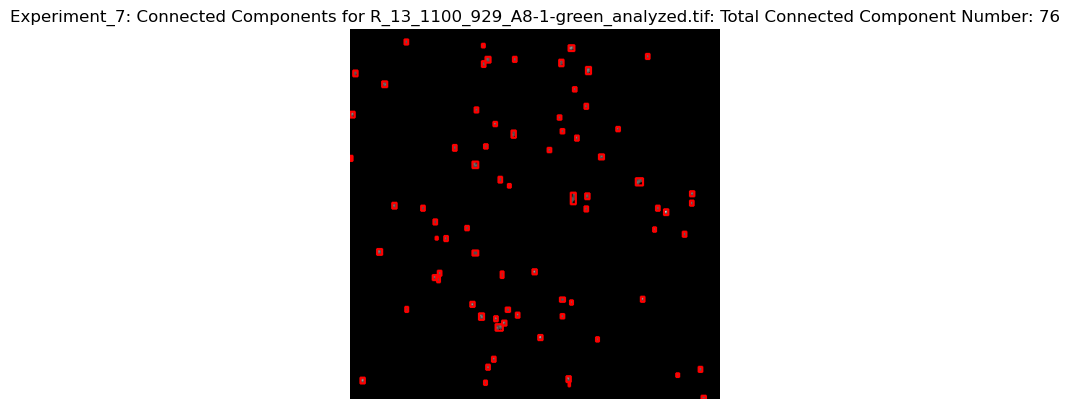

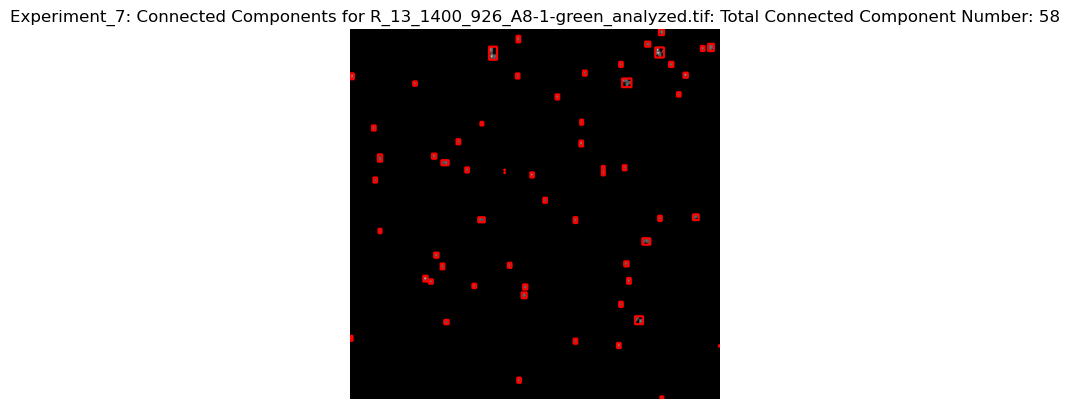

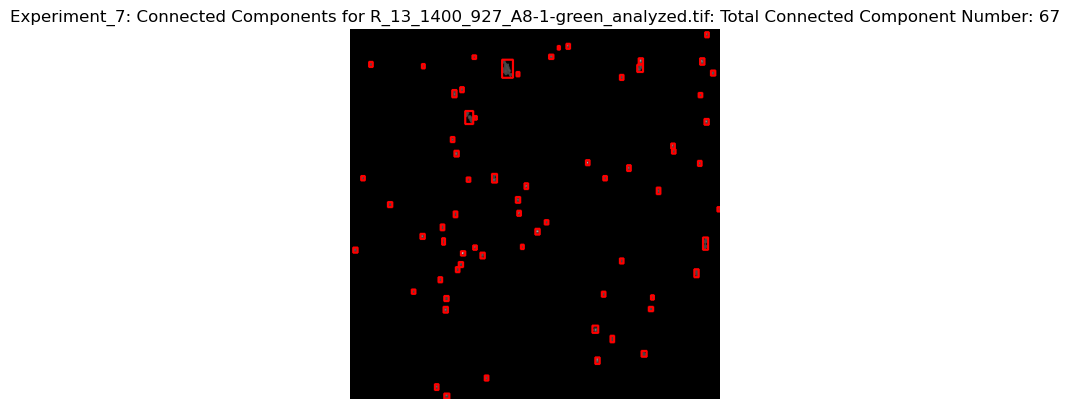

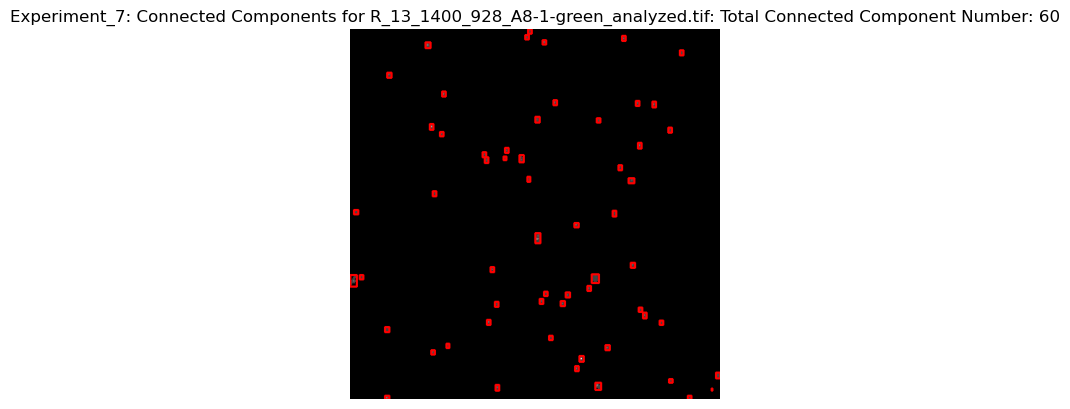

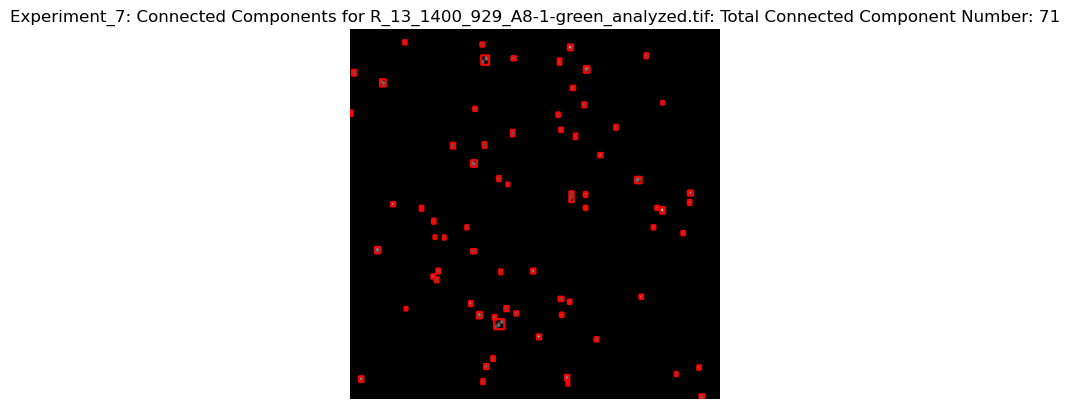

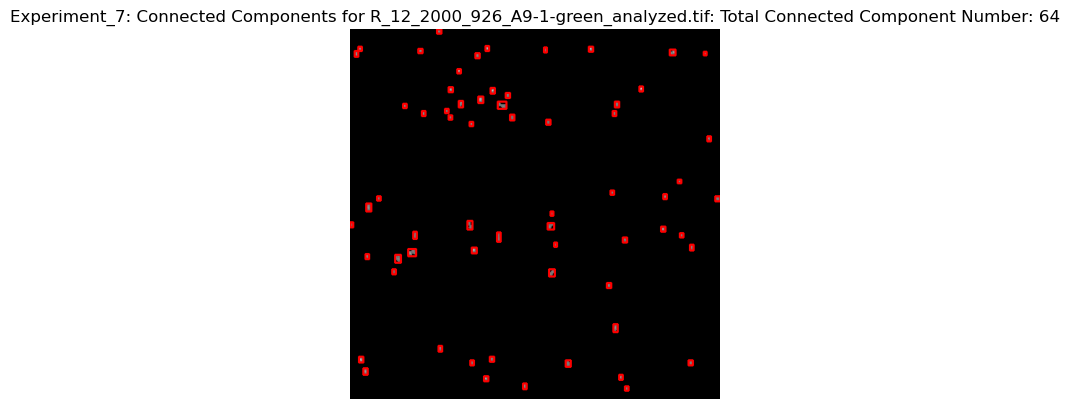

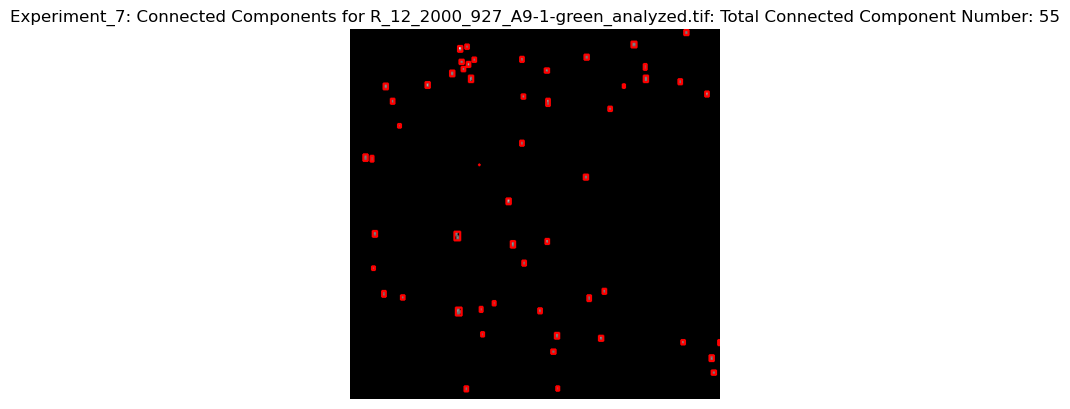

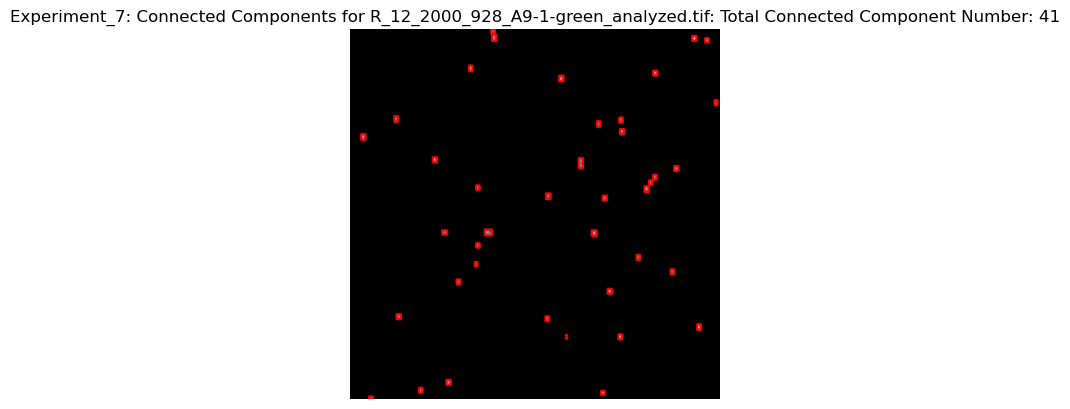

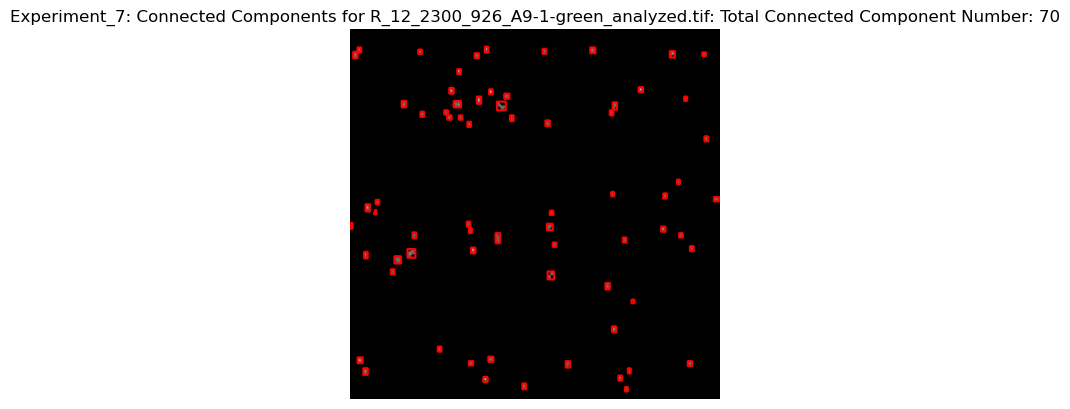

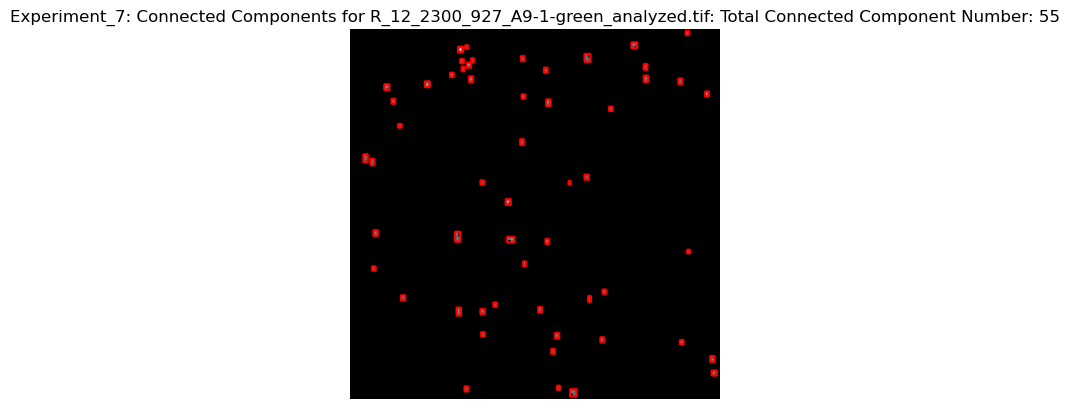

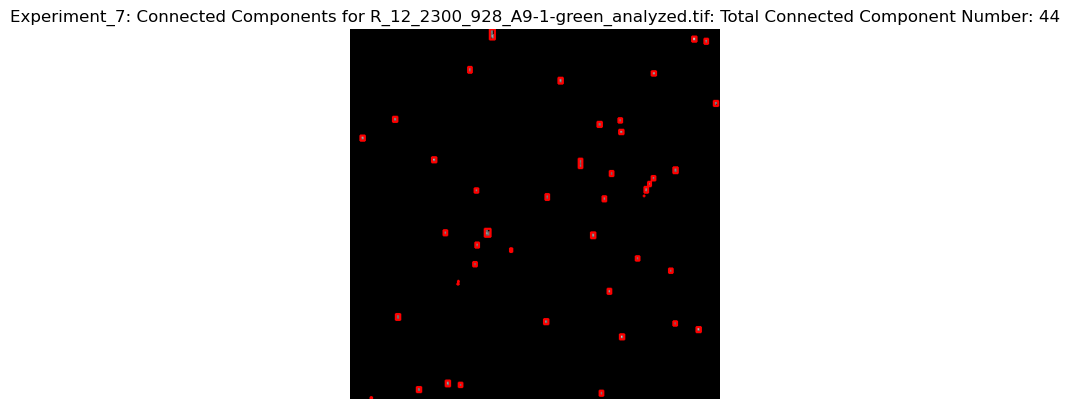

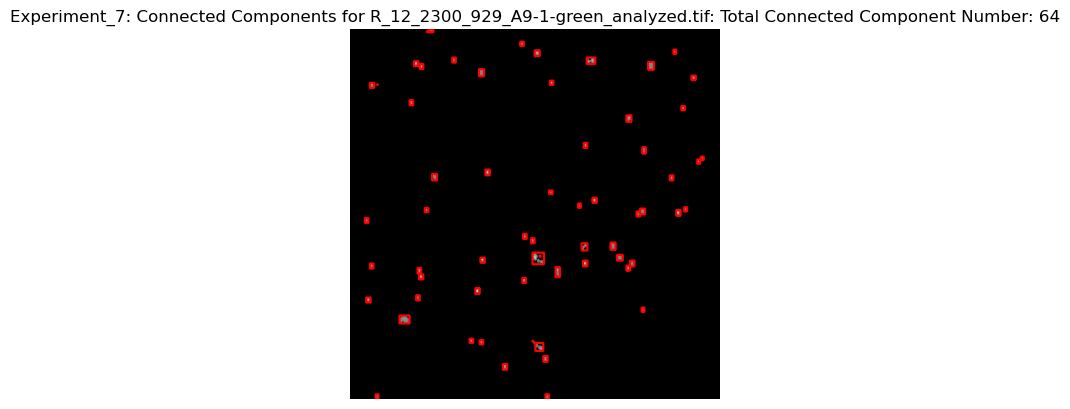

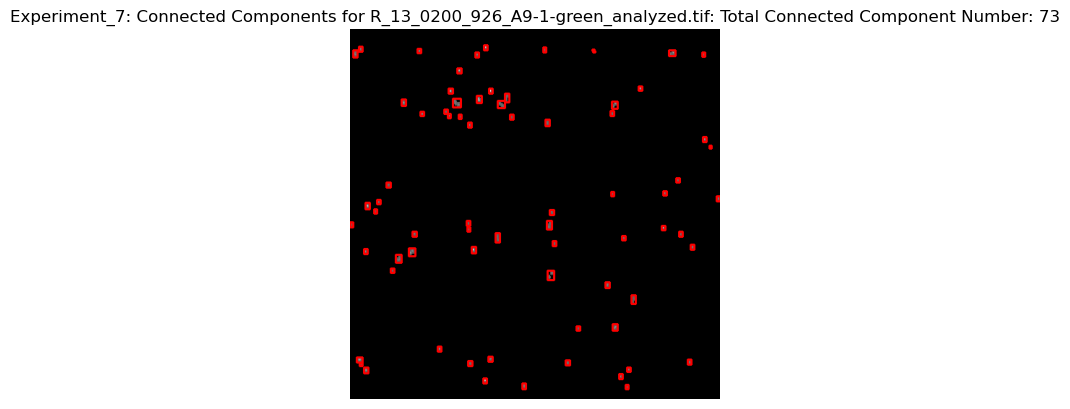

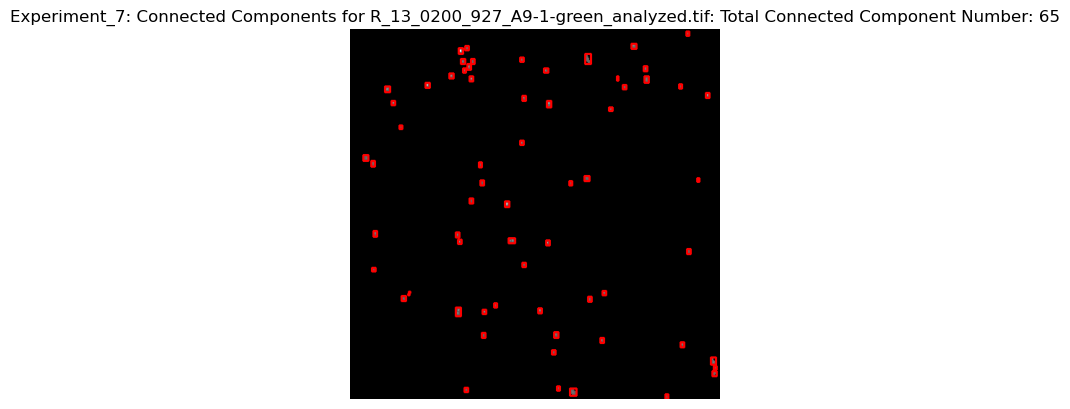

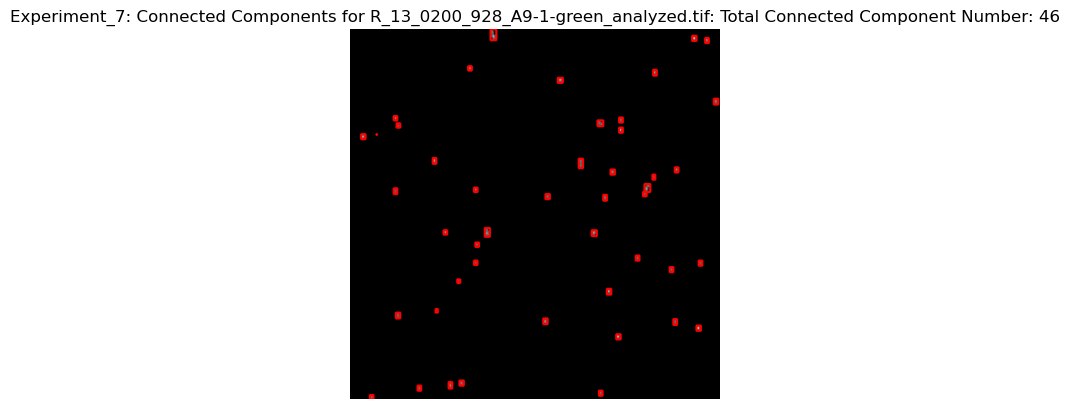

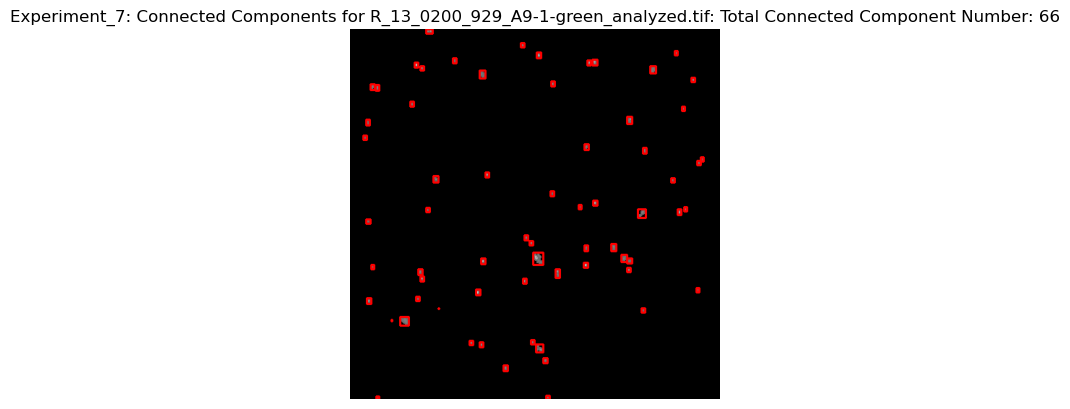

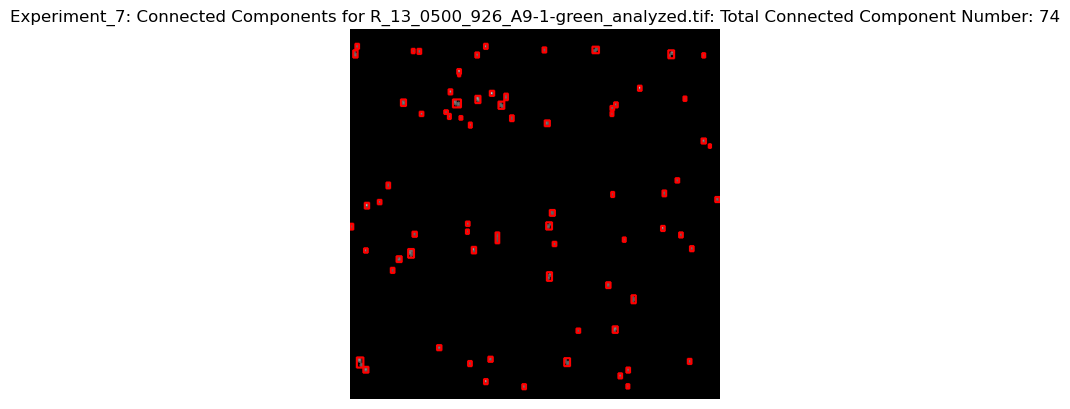

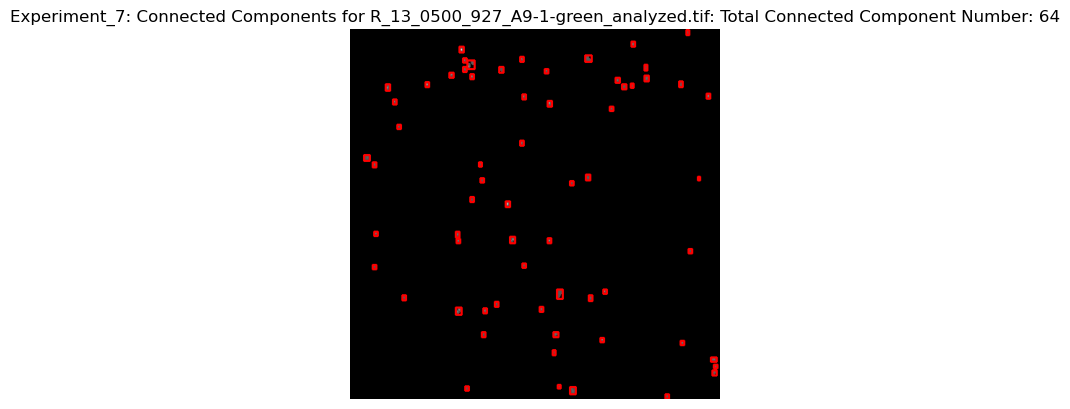

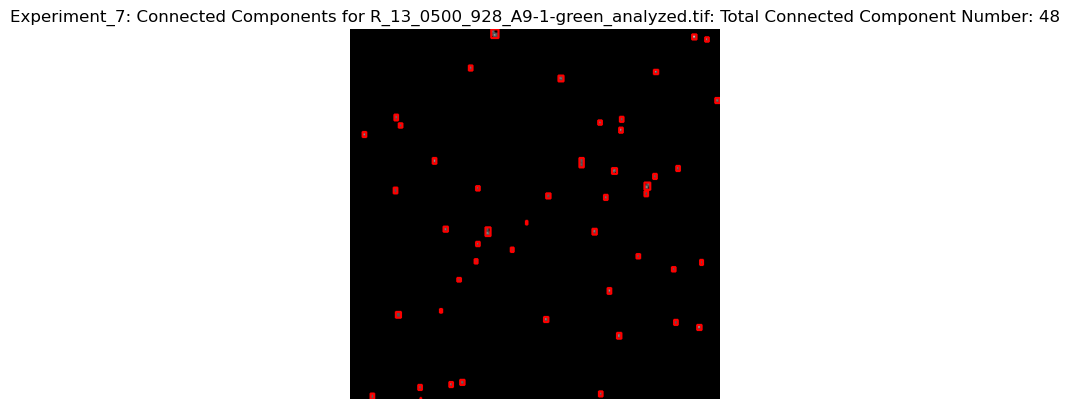

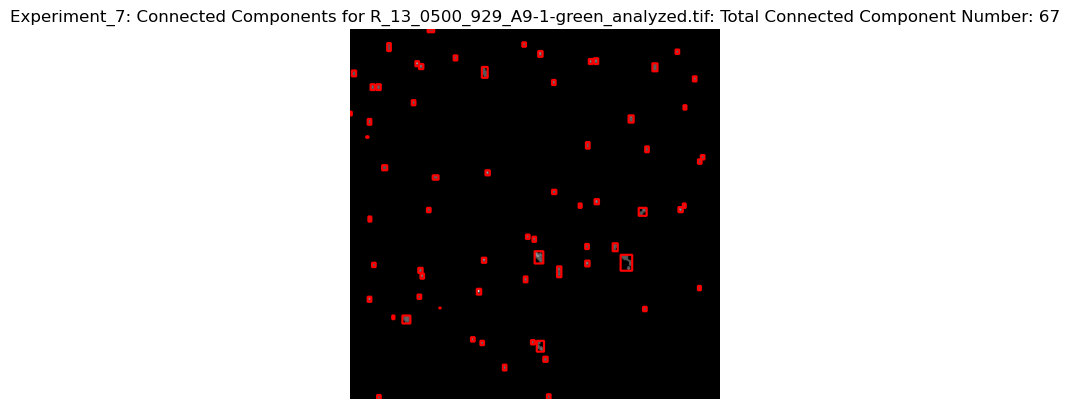

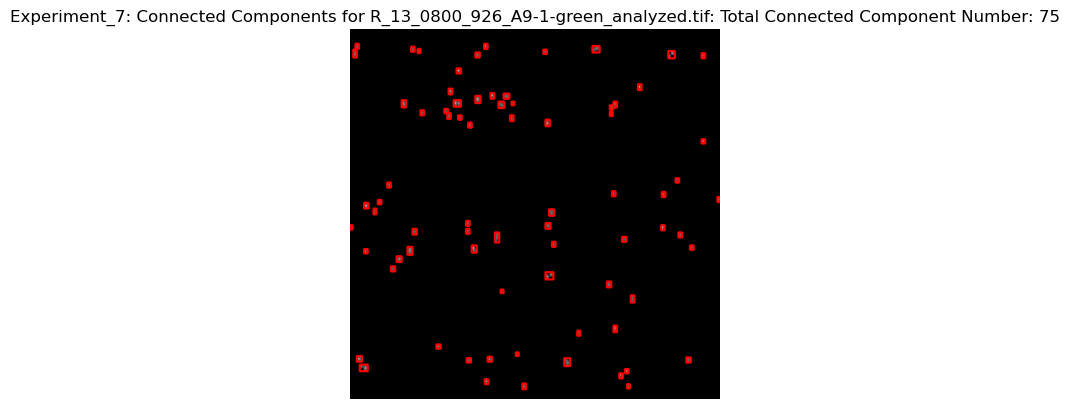

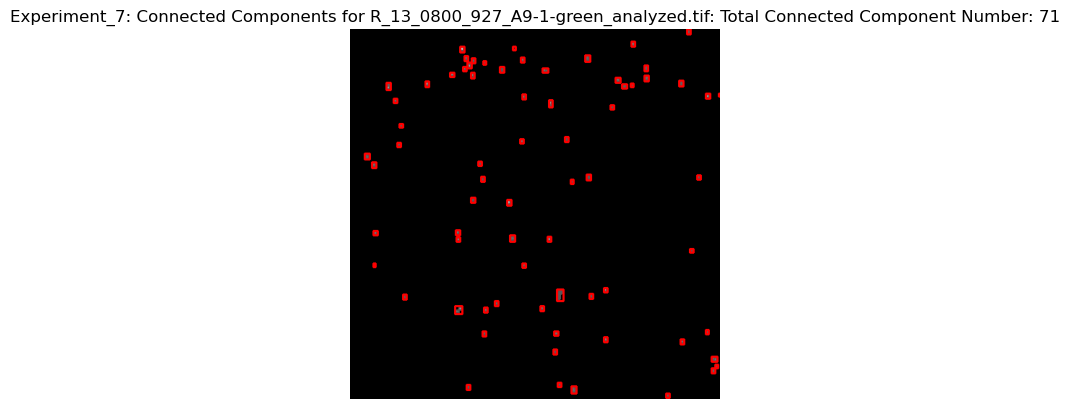

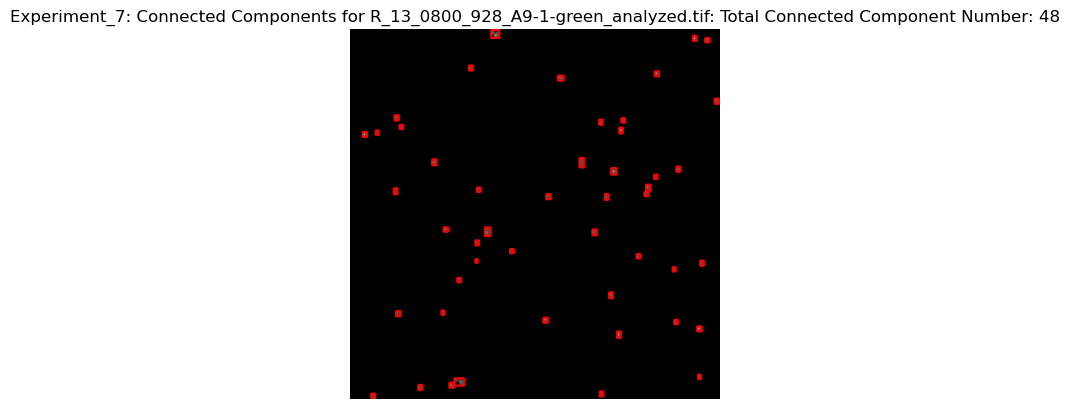

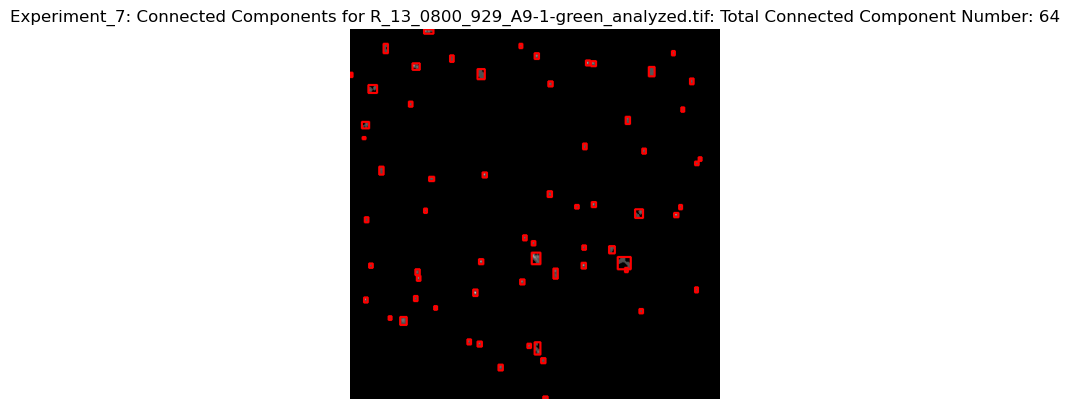

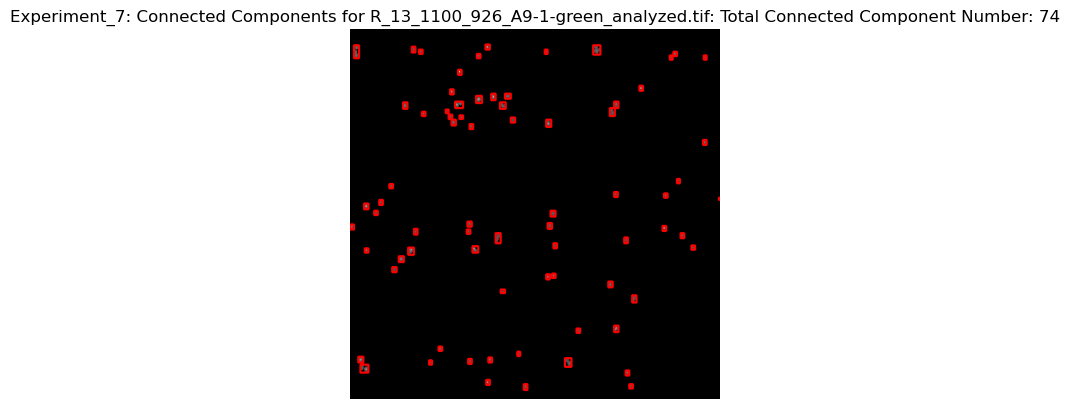

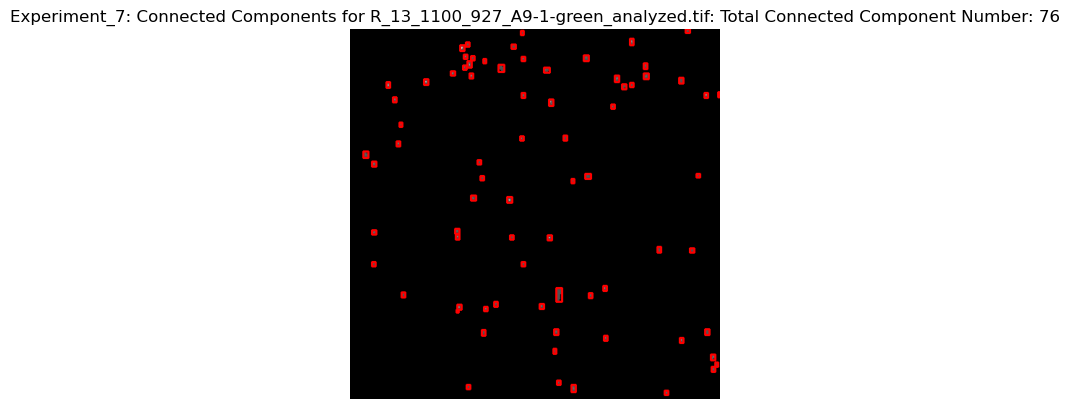

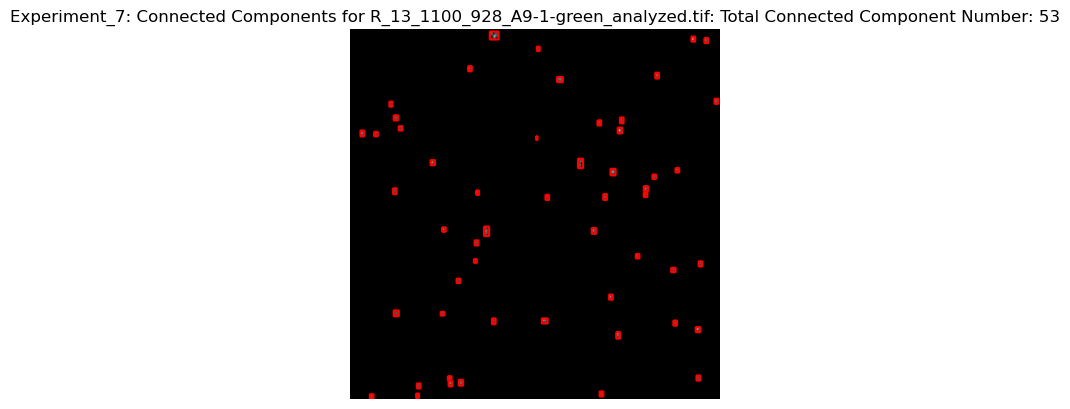

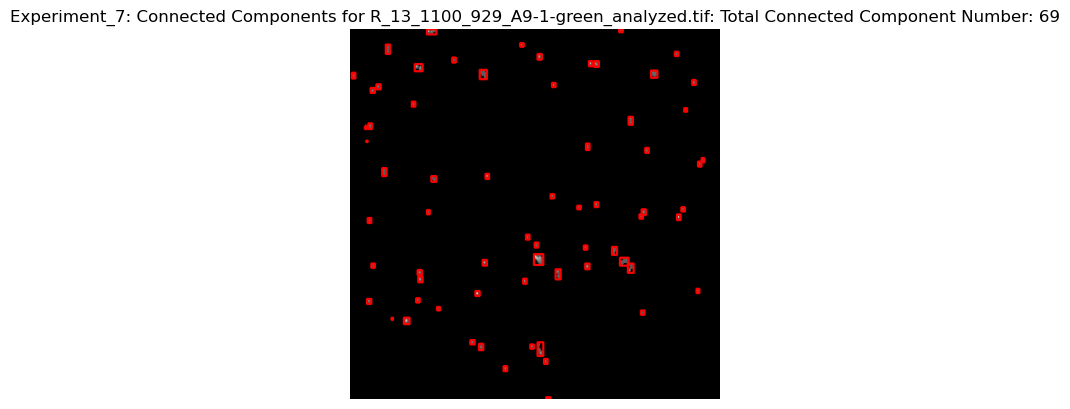

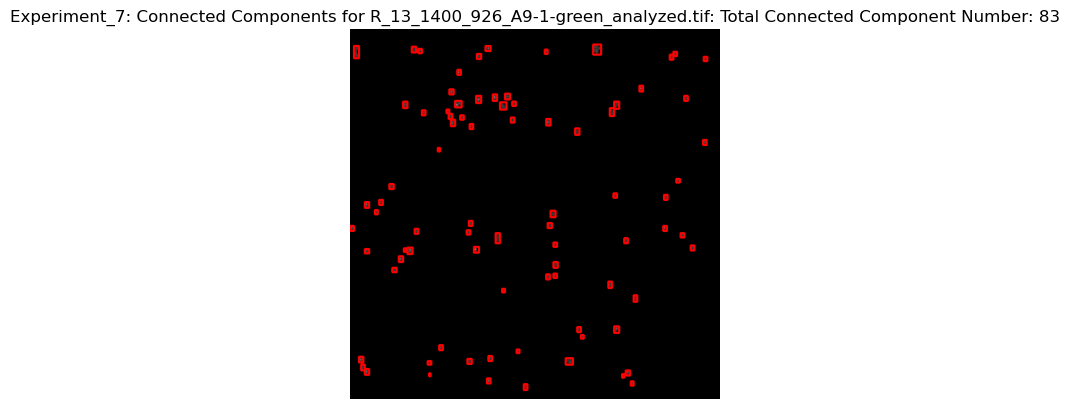

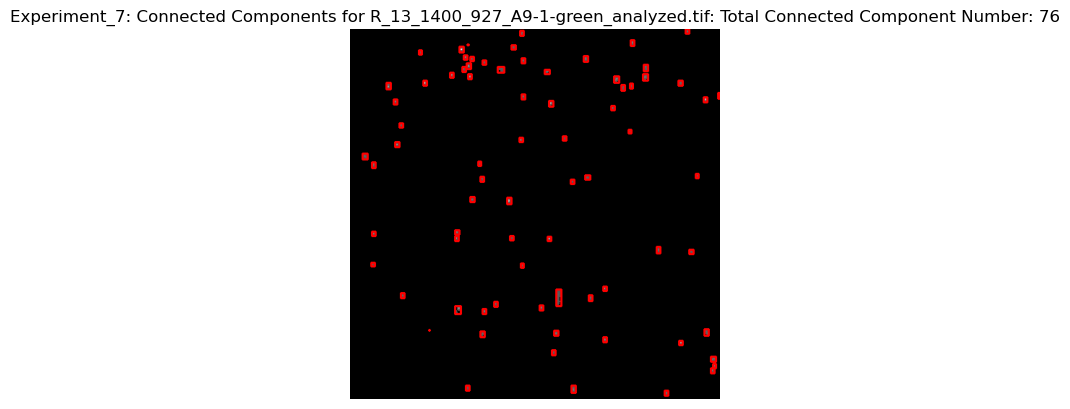

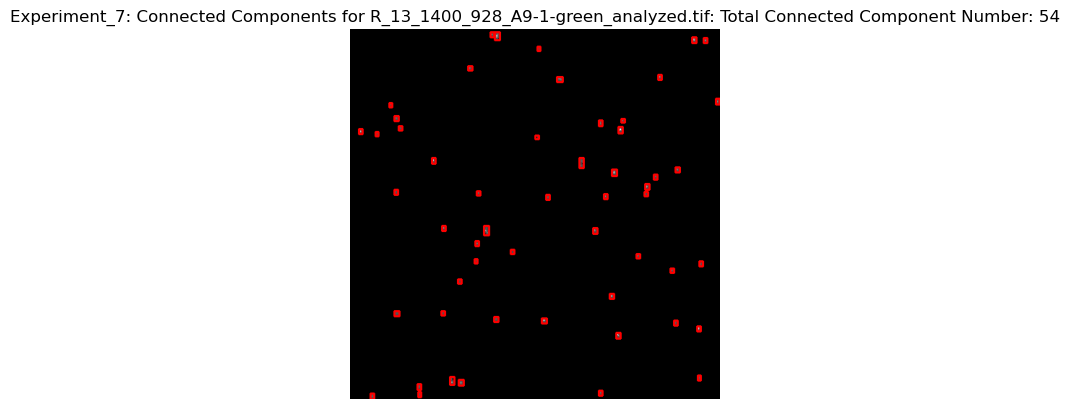

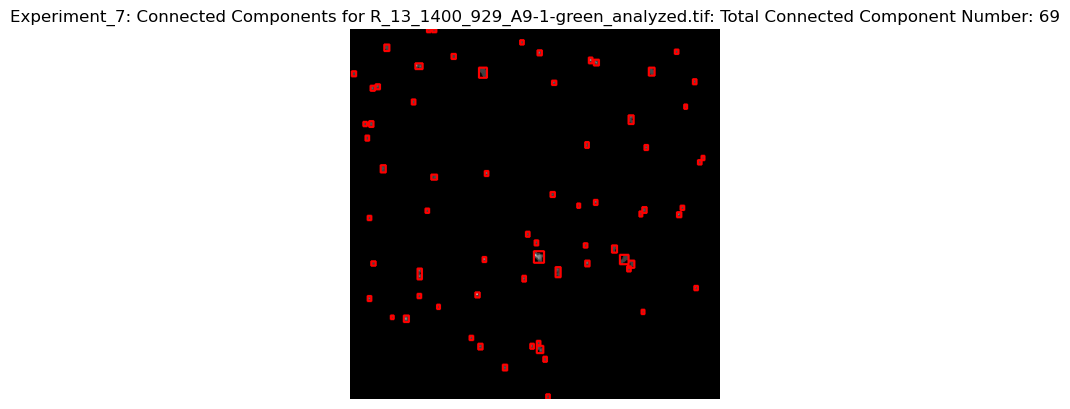

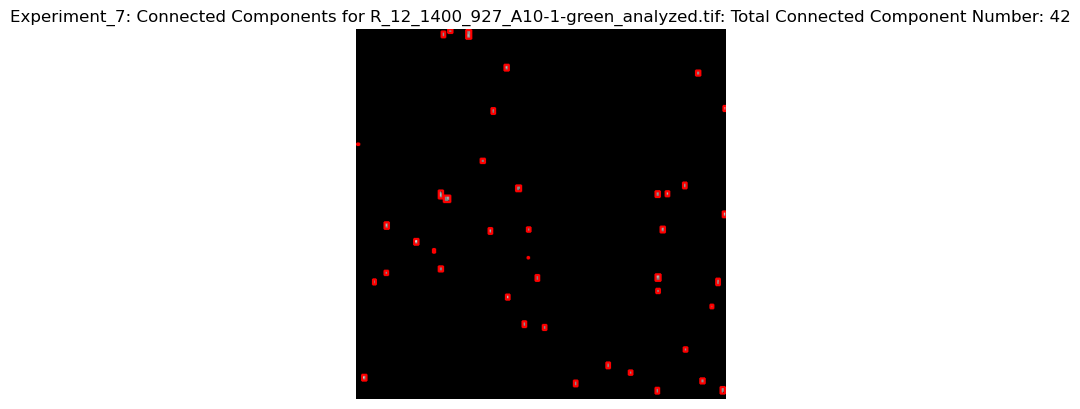

KeyboardInterrupt: 

In [8]:
import pickle
# Directory containing images
directory = r'E:\Aytekin\Data\AnalyzedBestModelGreen1'

# Get a list of all files in the directory
image_files = os.listdir(directory)


all_image_info = {}


prefixes = [f"{chr(65 + i)}{j}-" for i in range(8) for j in range(1, 13)]

for prefix in prefixes:
    image_info = {}
    # Process images that meet the specified criteria
    for image_name in image_files:
        if (image_name.startswith('R_12') or image_name.startswith('R_13')) and (prefix in image_name) and (any(num in image_name for num in ['929', '926', '927', '928'])):
            image_path = os.path.join(directory, image_name)

            # Read the image
            image = cv2.imread(image_path, cv2.IMREAD_ANYDEPTH)

            # Normalize the image data to the range 0-255
            normalized_image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
            
            normalized_image = np.uint8(normalized_image)

            # Threshold the normalized image
            _, thresh = cv2.threshold(normalized_image, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

            # Find connected components
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresh, connectivity=8)

            # Create a copy of the original image to draw rectangles on
            image_with_rectangles = cv2.cvtColor(normalized_image, cv2.COLOR_GRAY2BGR)

            # Create a dictionary to store component information
            component_info = {}

            # Iterate through connected components
            for i in range(1, num_labels):
                # Extract area and intensity for each component
                component_area = stats[i, cv2.CC_STAT_AREA]
                component_intensity = normalized_image[labels == i].mean()

                # Calculate min, max, and mean intensity
                component_min_intensity = normalized_image[labels == i].min()
                component_max_intensity = normalized_image[labels == i].max()

                # Get bounding box coordinates
                x, y, w, h = stats[i, cv2.CC_STAT_LEFT], stats[i, cv2.CC_STAT_TOP], stats[i, cv2.CC_STAT_WIDTH], stats[i, cv2.CC_STAT_HEIGHT]

                # Calculate centroid coordinates
                centroid_x, centroid_y = centroids[i]


                # Draw a red rectangle around the component on the copied image
                cv2.rectangle(image_with_rectangles, (x, y), (x + w, y + h), (0, 0, 255), 2)

                component_ioa = component_intensity/component_area

                # Store component information in the dictionary
                component_info[i] = {
                    'centroid': (centroid_x, centroid_y),
                    'bounding_box': (x, y, w, h),
                    'area': component_area,
                    'min_intensity': component_min_intensity,
                    'max_intensity': component_max_intensity,
                    'mean_intensity': component_intensity,
                    'intensity_area_ratio': component_ioa,
                    'total_components': num_labels - 1
                }



                # Print area and intensity for each component
                #print(f"Component {i}: Area - {component_area}, Intensity - {component_intensity:.3f}, Intensity/Area - {component_ioa:.3f}")


            # Save the image name as key and the component dictionary as value
            image_info[image_name] = component_info
            # Plot the image with rectangles around components
            plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
            plt.title(f'Experiment_7: Connected Components for {image_name}: Total Connected Component Number: {num_labels-1}')
            plt.axis('off')
            plt.show()
            #print(image_info)
            # Plot the image with rectangles around components
            #plt.imshow(cv2.cvtColor(image_with_rectangles, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for Matplotlib
            #plt.title(f'Experiment_4: Connected Components for {image_name}: Total Connected Component Number: {num_labels-1}')
            #plt.axis('off')
            #plt.show()
        all_image_info[prefix] = image_info
                
            
            
            
#print(all_image_info['A1-'])
            